## Homework 6: Working with OLS

## Exercises

## 1. Use the np.log() function to log the values of RGDP per capita. Create a lag for this new variable and rerun the regression using these new logged values as well as untransformed Economic Freedom Index Values (don't log these variables!). (hint: you may reimport the csv file).

In [24]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [25]:
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = [0,1], 
                   parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          10342.0  
         2015-01-01          10032.0  
         2014-01-01           9808.0  
         2013-01-01           9660.0  
...                              ...  
ZWE      2000-01-01           2249.0  
         1995-01-01           2156.0  
         1990-01-01           2232.0  
         1985-01-01           2198.0  
         1980-01-01           2133.0  

[3030 rows x 7 columns]

In [26]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product(
    [countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)

data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  
         2015-01-01           1560.0  

[7452 rows x 7 columns]

In [33]:
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

#calculate natural logarithm on RGDP per Capita

data["Ln RGDP Per Capita"] = np.log(data["RGDP Per Capita"])

data #show the dataframe


<ipython-input-33-98cada077e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()
<ipython-input-33-98cada077e4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Ln RGDP Per Capita"] = np.log(data["RGDP Per Capita"])


EFW  Size of Government  \
ISO_Code Year                                       
AGO      2006-01-01  4.883132            5.342913   
         2007-01-01  4.980365            5.239228   
         2008-01-01  4.980803            5.307379   
         2009-01-01  5.357889            7.104953   
         2010-01-01  5.372788            5.738678   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita      logr  Ln RGDP Per Capita Lag  \
ISO_Code Year                                                            
AGO      2006-01-01           6024.0  8.703507                8.544030   
         2007-01-01           7173.0  8.878079                8.703507   
         2008-01-01           7936.0  8.979165                8.878079   
         2009-01-01           7900.0  8.974618                8.979165   
         2010-01-01           7940.0  8.979669                8.974618   
...                              ...       ...                     ...   
ZWE      2011-01-01           1515.0  7.323171                7.247081   
         2012-01-01           1604.0  7.380256                7.323171   
         2013-01-01           1604.0  7.380256                7.380256   
         2014-01-01           1594.0  7.374002                7.380256   
         2015-01-01           1560.0  7.352441                7.374002   

                     RGDP Per Capita Lag  Ln RGDP Per Capita  
ISO_Code Year                                                 
AGO      2006-01-01                  NaN            8.703507  
         2007-01-01               6024.0            8.878079  
         2008-01-01               7173.0            8.979165  
         2009-01-01               7936.0            8.974618  
         2010-01-01               7900.0            8.979669  
...                                  ...                 ...  
ZWE      2011-01-01               1404.0            7.323171  
         2012-01-01    

In [34]:
data["Ln RGDP Per Capita Lag"] = data.groupby("ISO_Code")["logr"].shift()

<ipython-input-34-ee7adb0703ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Ln RGDP Per Capita Lag"] = data.groupby("ISO_Code")["logr"].shift()


In [35]:
data = data.dropna(axis=0)
data.loc["GBR"]

EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
2002-01-01  8.490705            7.139978                        8.144261   
2003-01-01  8.499127            7.039513                        8.245855   
2004-01-01  8.382597            6.920611                        8.069173   
2005-01-01  8.393285            6.922756                        8.265496   
2006-01-01  8.302836            6.914460                        7.982602   
2007-01-01  8.192020            6.929650                        7.644268   
2008-01-01  8.025975            6.161823                        7.807282   
2009-01-01  8.010150            6.282977                        7.979651   
2010-01-01  8.028130            6.002021                        7.971147   
2011-01-01  7.991630            6.026605                        7.966475   
2012-01-01  8.023953            6.123371                        7.825436   
2013-01-01  8.003675            6.479671                        7.812331   
2014-01-01  7.973524            6.118760                        7.829461   
2015-01-01  8.075913            6.161316                        7.921505   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
2002-01-01     9.484984                          9.161324    8.522978   
2003-01-01     9.414910                          9.236219    8.559139   
2004-01-01     9.426507                          8.908917    8.587775   
2005-01-01     9.449126                          8.786506    8.542543   
2006-01-01     9.395209                          8.748802    8.473108   
2007-01-01     9.435705                          8.686429    8.264048   
2008-01-01     9.406692                          8.600234    8.153843   
2009-01-01     9.499708                          8.744129    7.544287   
2010-01-01     9.584280                          8.782008    7.801191   
2011-01-01     9.556971                          8.682056    7.726041   
2012-01-01     9.756184                          8.554477    7.860295   
2013-01-01     9.724509                          8.273205    7.728658   
2014-01-01     9.751757                          8.460951    7.706689   
2015-01-01     9.841927                          8.418714    8.036102   

            RGDP Per Capita       logr  Ln RGDP Per Capita Lag  \
Year                                                             
2002-01-01          32992.0  10.404020               10.384555   
2003-01-01          33977.0  10.433439               10.404020   
2004-01-01          34638.0  10.452707               10.433439   
2005-01-01          35424.0  10.475145               10.452707   
2006-01-01          36045.0  10.492523               10.475145   
2007-01-01          36679.0  10.509960               10.492523   
2008-01-01          36163.0  10.495792               10.509960   
2009-01-01          34338.0  10.444008               10.495792   
2010-01-01          34722.0  10.455129               10.444008   
2011-01-01          34971.0  10.462274               10.455129   
2012-01-01          35185.0  10.468375               10.462274   
2013-01-01          35618.0  10.480606               10.468375   
2014-01-01          36436.0  10.503313               10.480606   
2015-01-01          36941.0  10.517077               10.503313   

            RGDP Per Capita Lag  Ln RGDP Per Capita  
Year                                                 
2002-01-01              32356.0           10.404020  
2003-01-01              32992.0           10.433439  
2004-01-01              33977.0           10.452707  
2005-01-01              34638.0           10.475145  
2006-01-01              35424.0           10.492523  
2007-01-01              36045.0           10.509960  
2008-01-01              36679.0           10.495792  
2009-01-01              36163.0           10.444008  
2010-01-01              34338.0   

## Rerun the regression using these new logged values as well as untransformed Economic Freedom Index Values.

## Running a Regression

In [37]:
y_var = ["Ln RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
         "RGDP Per Capita Lag"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

Ln RGDP Per Capita  Size of Government  \
Ln RGDP Per Capita                              1.00               -0.20   
Size of Government                             -0.20                1.00   
Legal System & Property Rights                  0.75               -0.17   
Sound Money                                     0.56                0.11   
Freedom to trade internationally                0.63                0.15   
Regulation                                      0.54                0.08   
RGDP Per Capita Lag                             0.82               -0.24   

                                  Legal System & Property Rights  Sound Money  \
Ln RGDP Per Capita                                          0.75         0.56   
Size of Government                                         -0.17         0.11   
Legal System & Property Rights                              1.00         0.59   
Sound Money                                                 0.59         1.00   
Freedom to trade internationally                            0.67         0.75   
Regulation                                                  0.66         0.57   
RGDP Per Capita Lag                                         0.67         0.44   

                                  Freedom to trade internationally  \
Ln RGDP Per Capita                                            0.63   
Size of Government                                            0.15   
Legal System & Property Rights                                0.67   
Sound Money                                                   0.75   
Freedom to trade internationally                              1.00   
Regulation                                                    0.67   
RGDP Per Capita Lag                                           0.50   

                                  Regulation  RGDP Per Capita Lag  
Ln RGDP Per Capita                      0.54                 0.82  
Size of Government                      0.08                -0.24  
Legal System & Property Rights          0.66                 0.67  
Sound Money                             0.57                 0.44  
Freedom to trade internationally        0.67                 0.50  
Regulation                              1.00                 0.51  
RGDP Per Capita Lag                     0.51                 1.00

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        RGDP Per Capita   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              1121.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                        04:07:55   Log-Likelihood:                         -25955.
No. Observations:                2386   AIC:                                  5.192e+04
Df Residuals:                    2380   BIC:                                  5.196e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -3963.0113    209.065    -18.956      0.000   -4372.980   -3553.043
Legal System & Property Rights    4817.0423    231.028     20.850      0.000    4364.006    5270.079
Sound Money                        615.9818    213.724      2.882      0.004     196.877    1035.087
Freedom to trade internationally   816.6022    305.825      2.670      0.008     216.891    1416.313
Regulation                        1179.7692    311.038      3.793      0.000     569.835    1789.703
RGDP Per Capita Lag              -3.215e+05   4.54e+04     -7.084      0.000    -4.1e+05   -2.33e+05
==============================================================================
Omnibus:                     1862.319   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59686.307
Skew:                           3.414   Prob(JB):                         0.00
Kurtosis:                      26.532   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

<ipython-input-39-30872b99f69b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()


In [40]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor

<ipython-input-40-395d7fcd9f91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


In [41]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y_hat.sub(y_mean))
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

<ipython-input-41-ac1f82b73c40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = (y_hat.sub(y_mean))


Ln RGDP Per Capita  Size of Government  \
ISO_Code Year                                                 
AGO      2007-01-01            8.878079            5.239228   
         2008-01-01            8.979165            5.307379   
         2009-01-01            8.974618            7.104953   
         2010-01-01            8.979669            5.738678   
         2011-01-01            8.989195            5.835361   
...                                 ...                 ...   
ZWE      2011-01-01            7.323171            6.424630   
         2012-01-01            7.380256            6.670469   
         2013-01-01            7.380256            6.325105   
         2014-01-01            7.374002            6.433165   
         2015-01-01            7.352441            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
         2010-01-01                        3.672884     5.570226   
         2011-01-01                        3.585591     5.671752   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
         2010-01-01                          6.189831    5.692320   
         2011-01-01                          6.210597    4.990853   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Lag  Predictor  \
ISO_Code Year                                         
AGO      2007-01-01               6024.0   8.258672   
         2008-01-01               7173.0   8.275107   
         2009-01-01               7936.0   8.227512   
         2010-01-01               7900.0   8.374318   
         2011-01-01               7940.0   8.415971   
...                                  ...        ...   
ZWE      2011-01-01               1404.0   7.986933   
         2012-01-01               1515.0   8.059874   
         2013-01-01               1604.0   8.177032   
         2014-01-01               1604.0   8.291879   
         2015-01-01               1594.0   8.096680   

                     Ln RGDP Per Capita Predictor  Residuals  \
ISO_Code Year                                                  
AGO      2007-01-01                      8.258672  -0.935733   
         2008-01-01                      8.275107  -0.919298   
         2009-01-01                      8.227512  -0.966893   
         2010-01-01                      8.374318  -0.820088   
         2011-01-01                      8.415971  -0.778435   
...                                           ...        ...   
ZWE      2011-01-01                      7.986933  -1.207473   
         2012-01-01                      8.059874  -1.134532   
         2013-01-01                      8.177032  -1.017374  

In [42]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

<ipython-input-42-2b7dcc90ced0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [43]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Ln RGDP Per Capita   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1034.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:08:50   Log-Likelihood:                -1643.6
No. Observations:                1850   AIC:                             3301.
Df Residuals:                    1843   BIC:                             3340.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.0680      0.014     -4.859      0.000      -0.095      -0.041
Legal System & Property Rights       0.1704      0.014     12.133      0.000       0.143       0.198
Sound Money                          0.0552      0.014      3.905      0.000       0.028       0.083
Freedom to trade internationally     0.2079      0.021      9.797      0.000       0.166       0.250
Regulation                          -0.0738      0.020     -3.764      0.000      -0.112      -0.035
RGDP Per Capita Lag               3.578e-05   1.01e-06     35.310      0.000    3.38e-05    3.78e-05
Constant                             6.6812      0.123     54.471      0.000       6.441       6.922
==============================================================================
Omnibus:                      109.996   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.268
Skew:                          -0.562   Prob(JB):                     5.73e-31
Kurtosis:                       3.737   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Plot the residuals in a bar chart. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

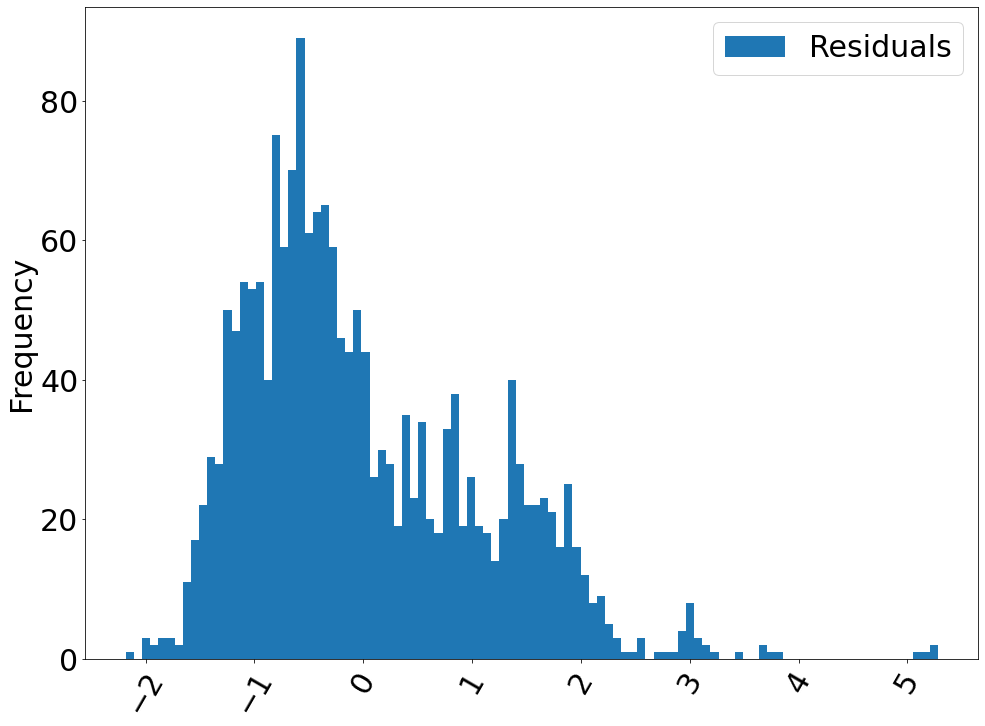

In [46]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":30})
fig, ax = plt.subplots(figsize = (16,12))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

## Explanation: 

The log value of a variable decreases the skewness due to large values; i.e., cases in which one or a few points are much larger than the bulk of the data. The log shows percentage changes rather than actual value which were used in the first regression from the lesson. Hence, the the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.

<AxesSubplot:ylabel='Frequency'>

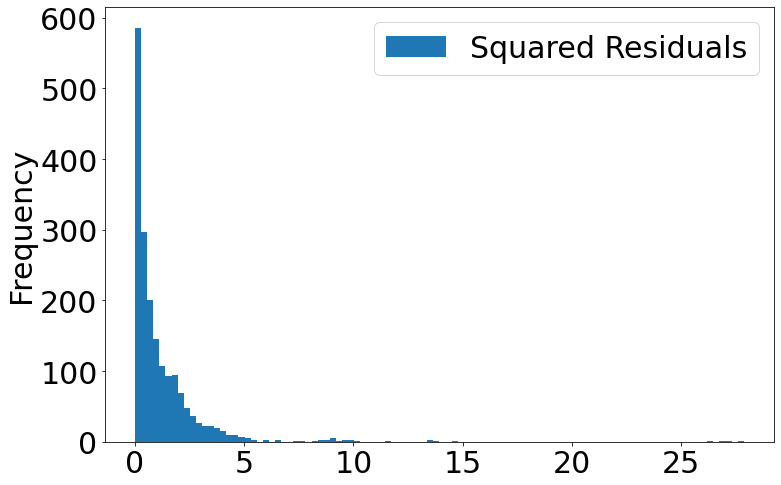

In [47]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

## 3. Plot a scatter plot with RGDP Per Capita on the horizontal axis and the predictor on the vertical axis. Then plot a scatter plot with RGDP Per Capita on the horizontal axis and the residual on the vertical axis. Are the residuals normally distributed? Why or why not? Why does this matter?

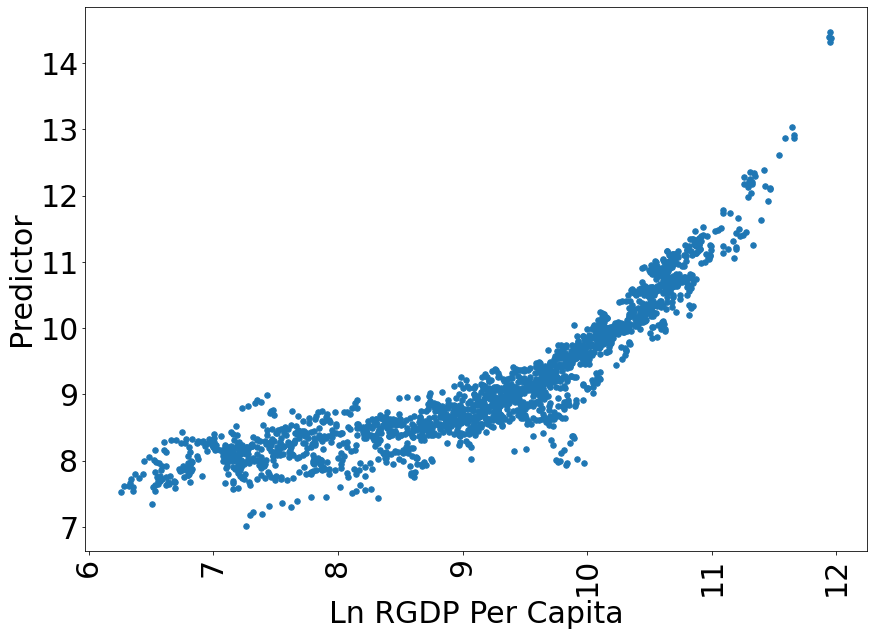

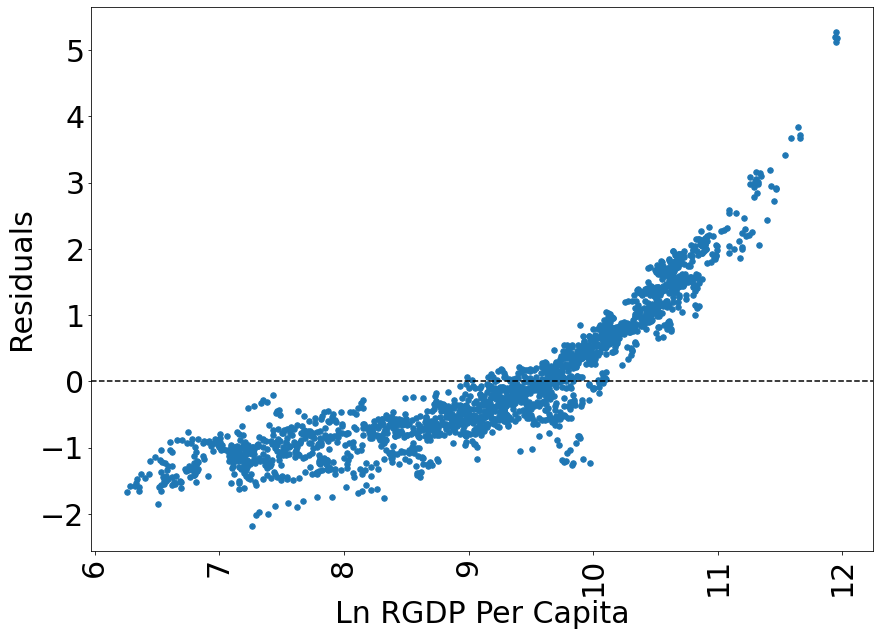

In [48]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

## Explanation:
The distribution is fairly normally distibuted with concerntration around negative one. The distribution helps to show the variation or deviation from the mean. One of the assumptions for regression analysis is that the residuals are normally distributed. Being normally distributed matter because otherwise it vilates one of the basic assumptions of the model and the parameter might be biased. 

## 4. Plot the observed and predicted logged values of RGDP Per Capita for each individual country.

<ipython-input-50-f1ea30541986>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (16,12))
C:\Users\faria\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1167: UserWarning: Attempting to set identical left == right == 45.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\faria\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1167: UserWarning: Attempting to set identical left == right == 45.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\faria\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1167: UserWarning: Attempting to set identical left == right == 45.0 results in singular transforma

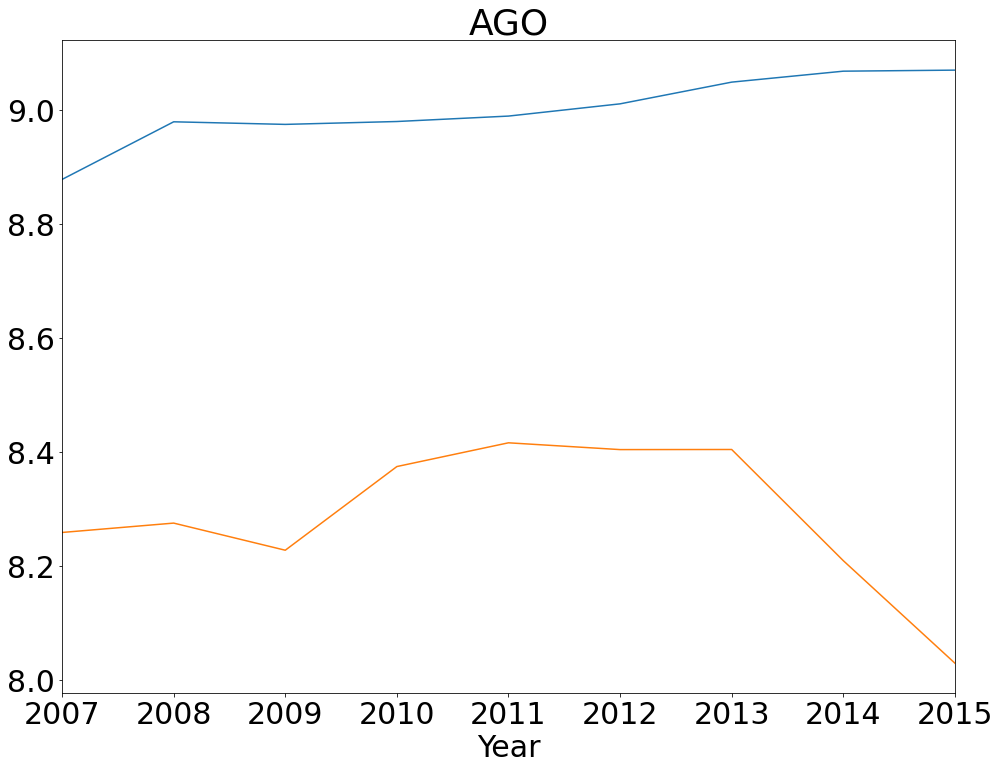

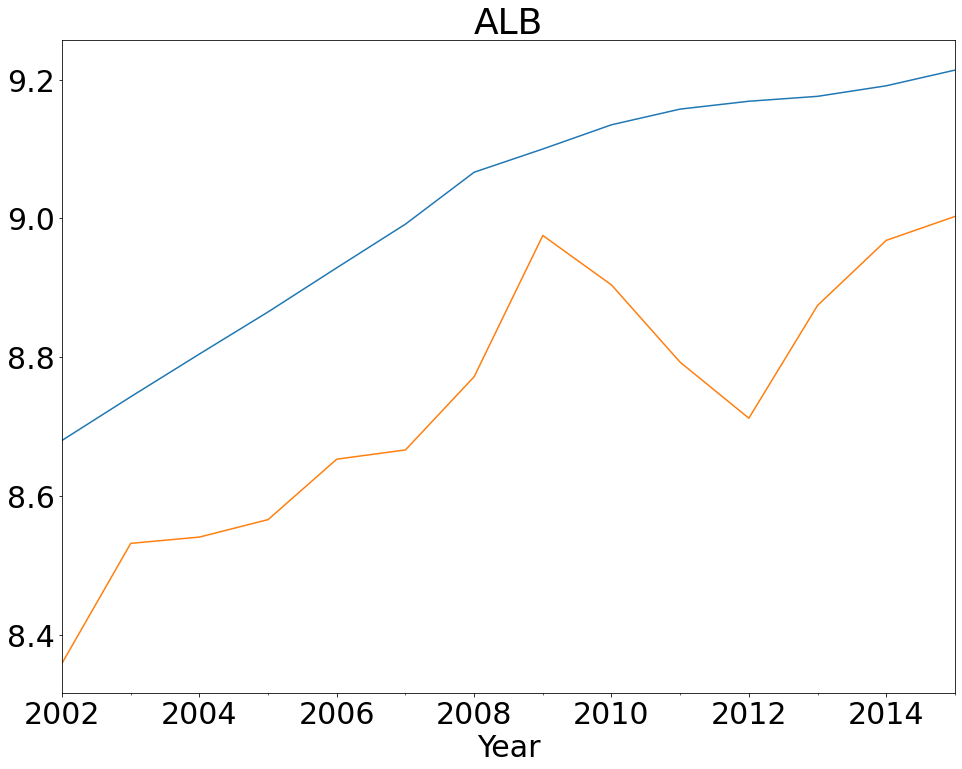

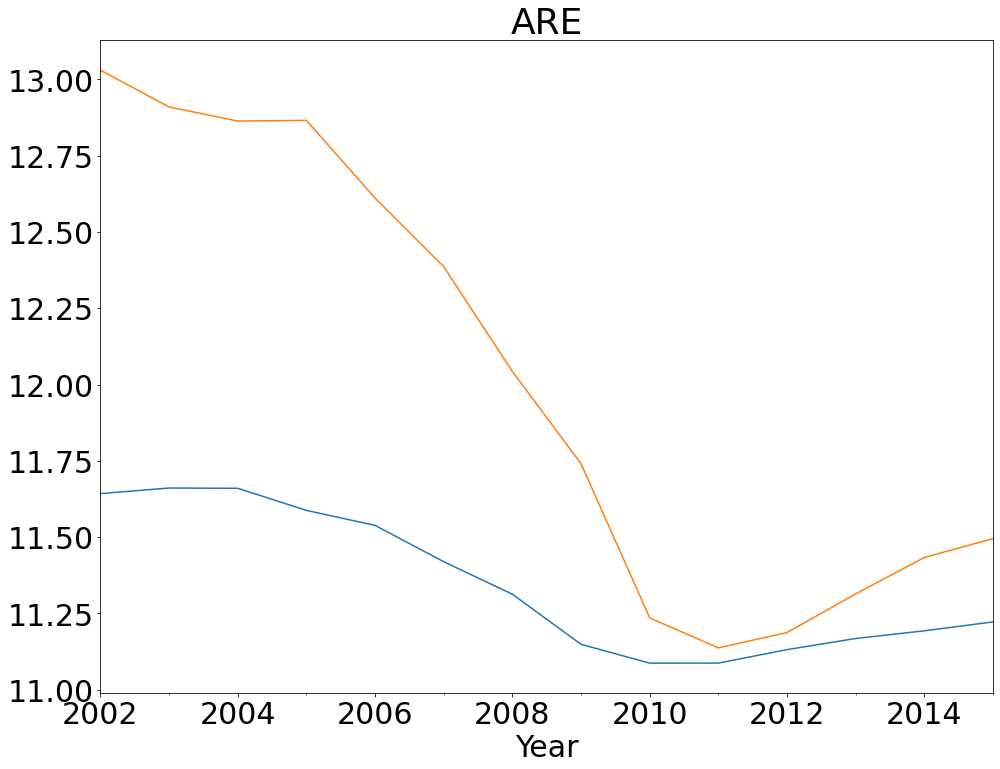

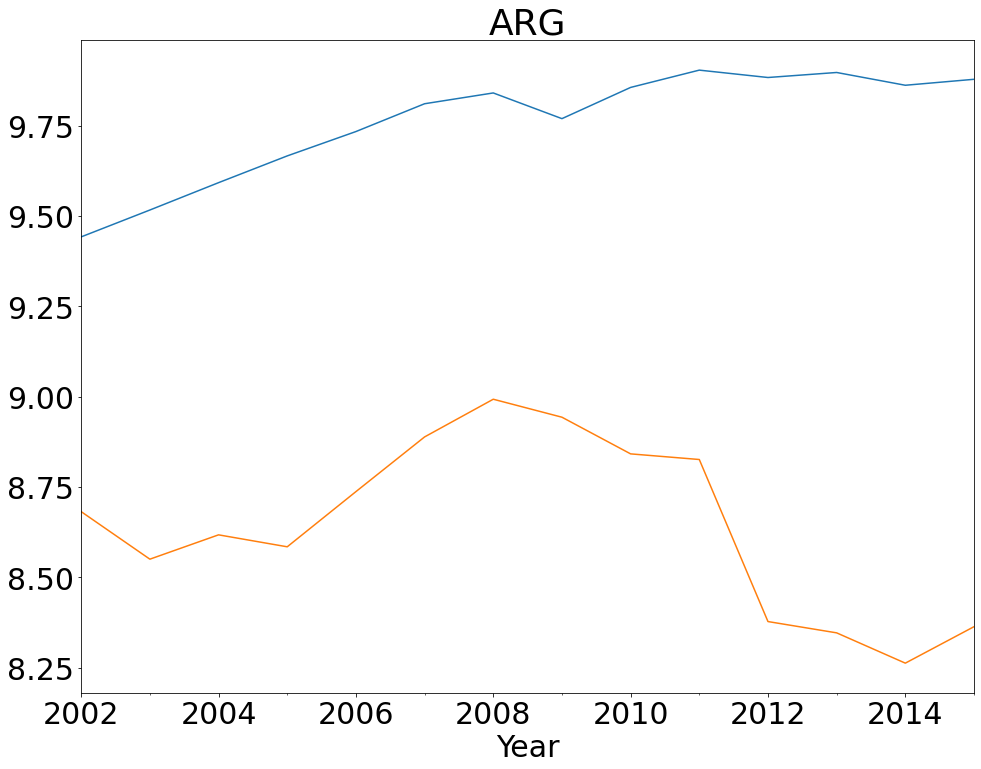

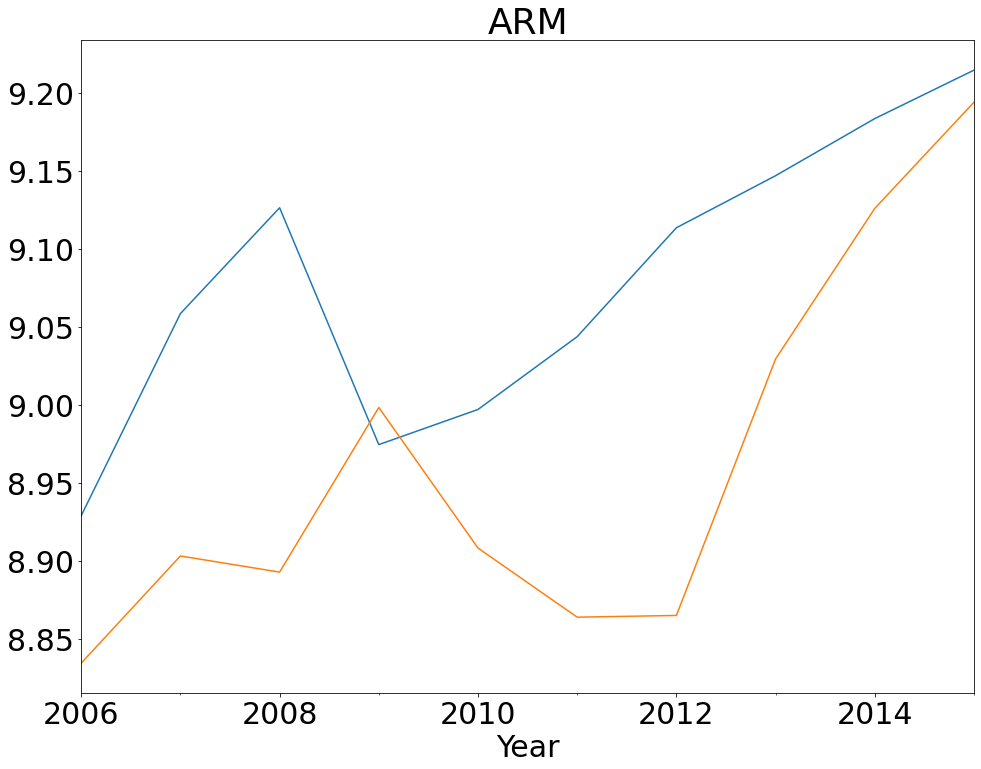

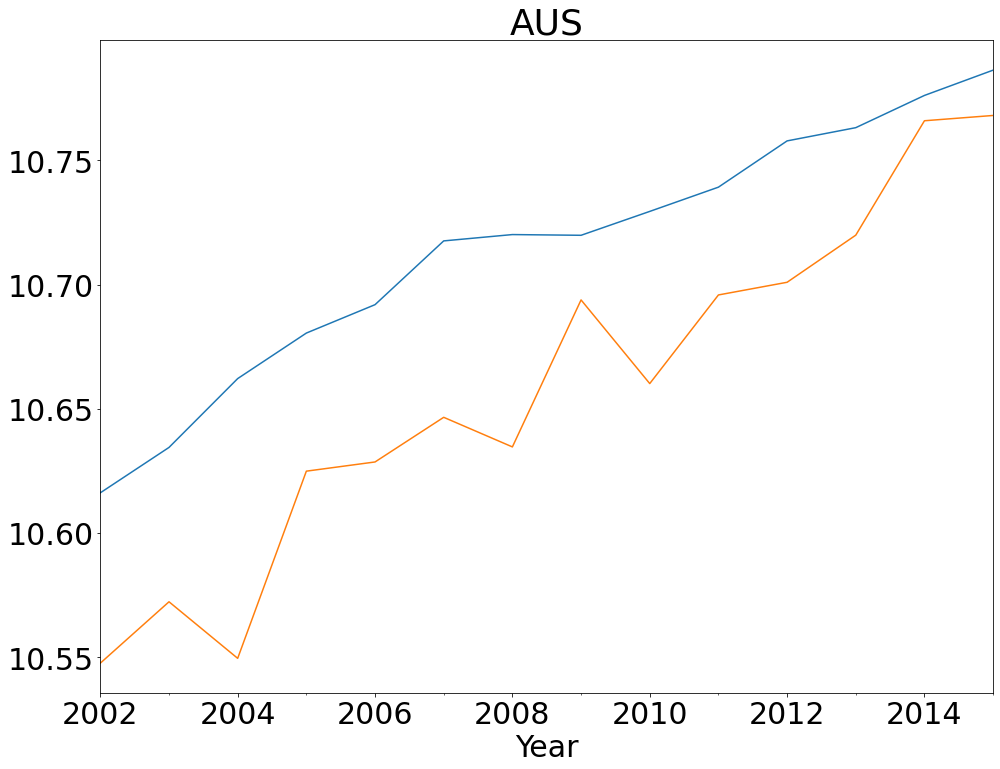

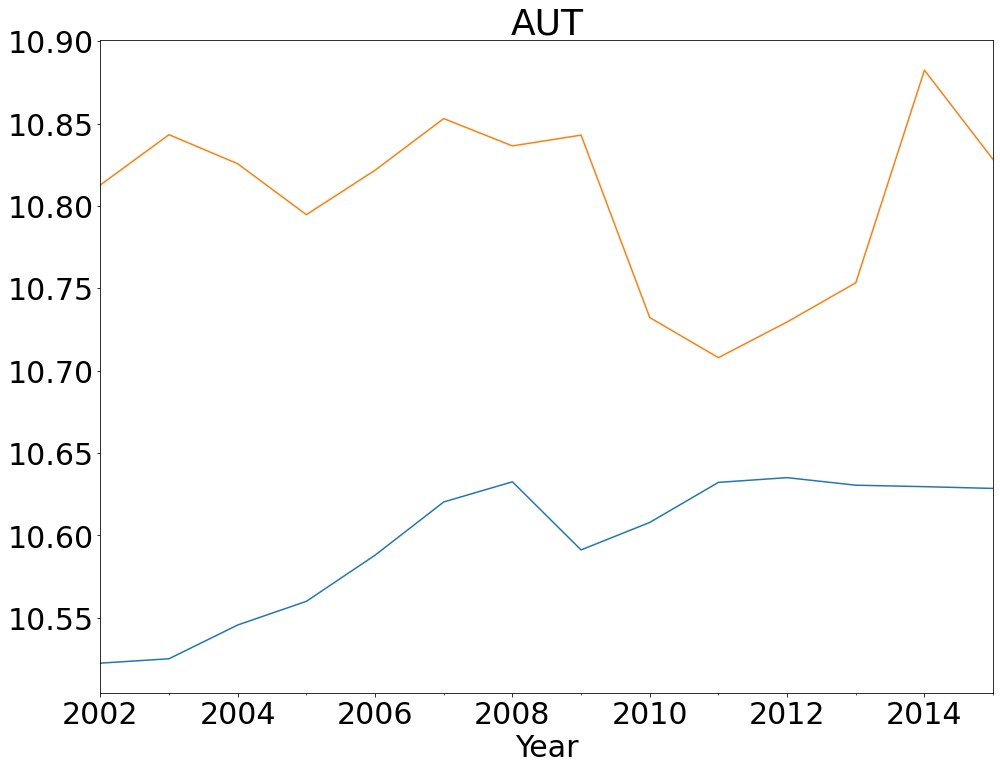

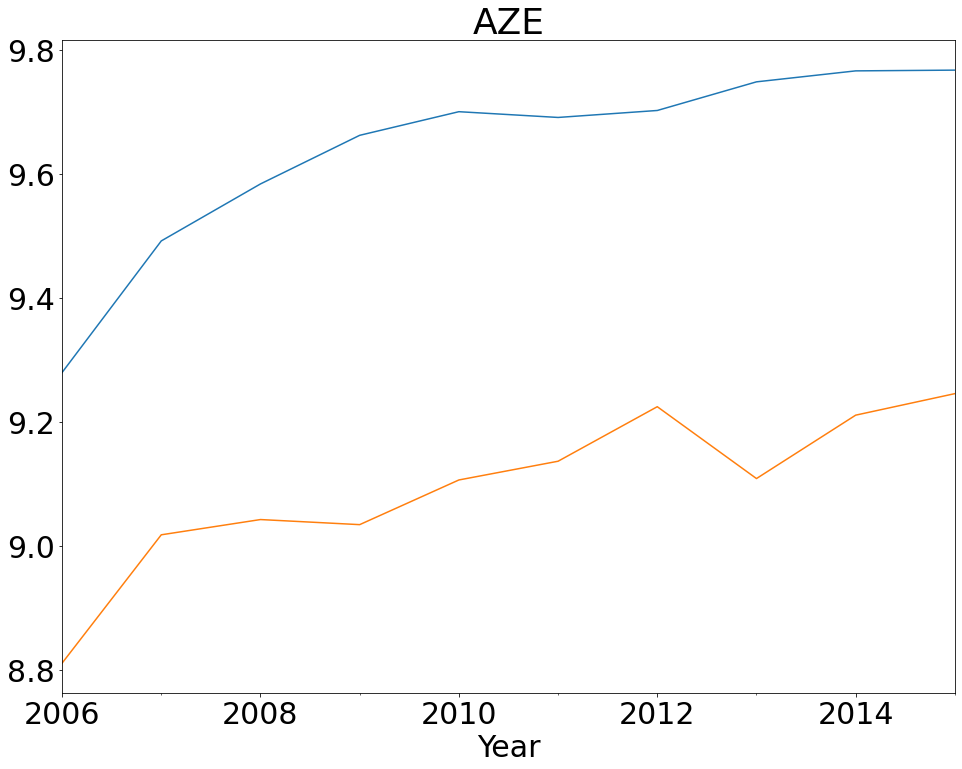

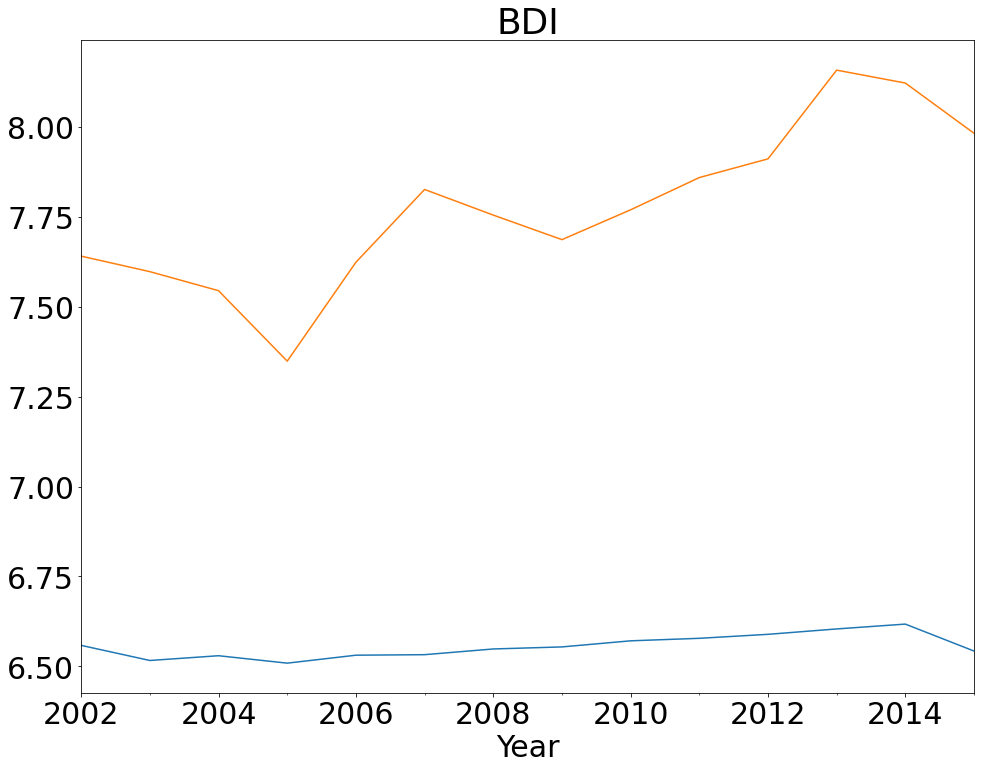

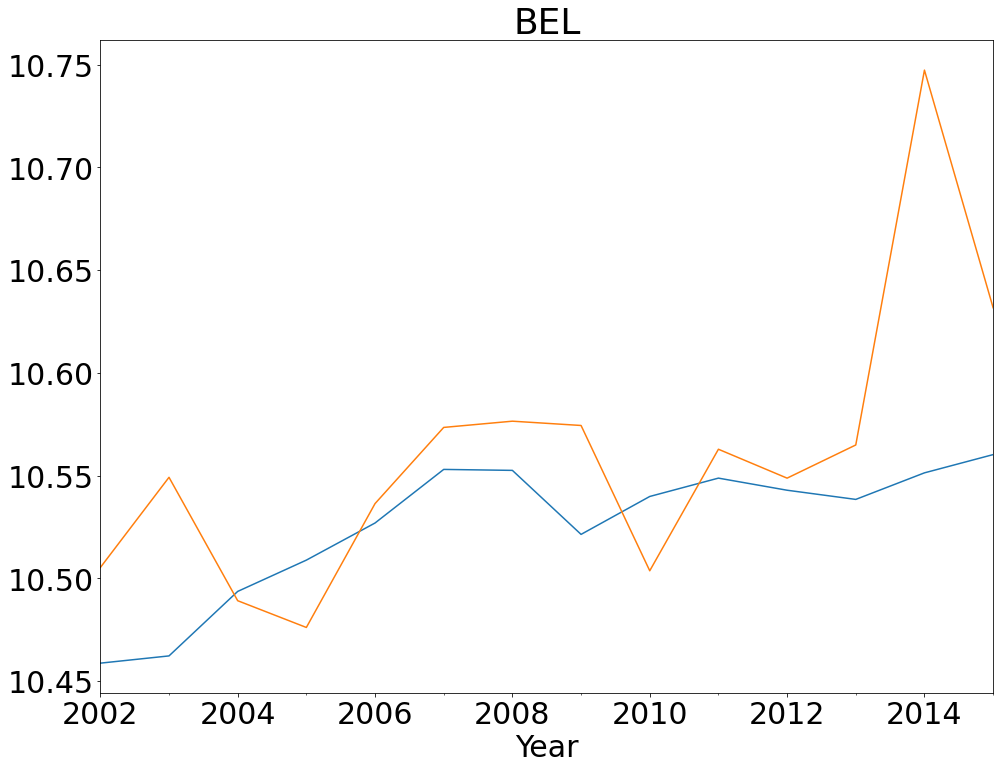

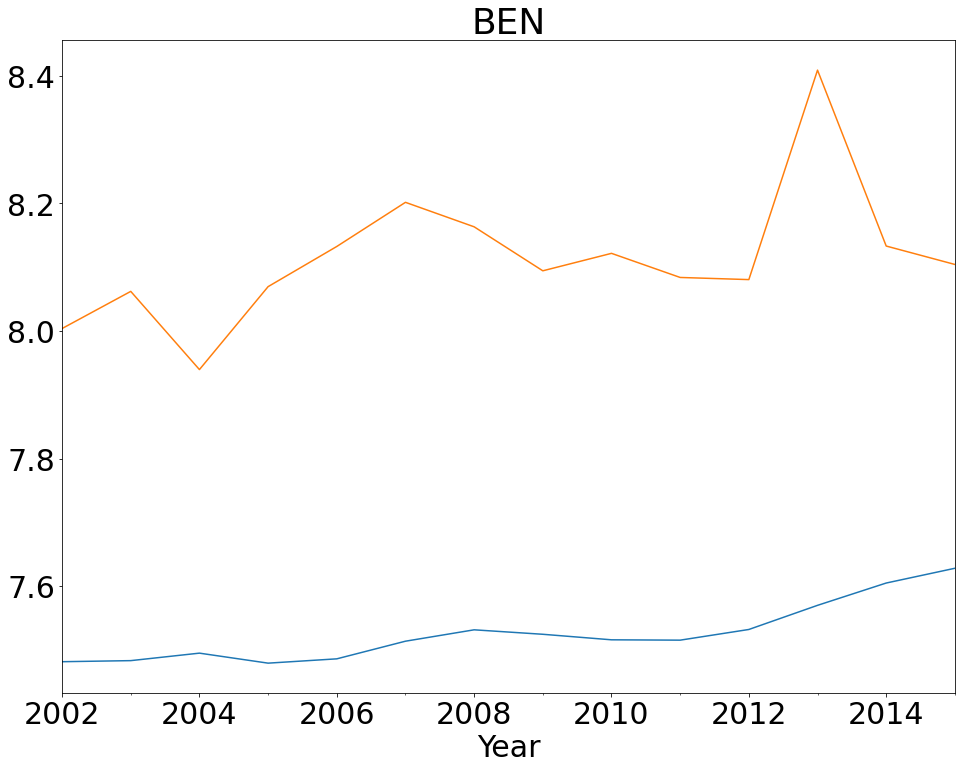

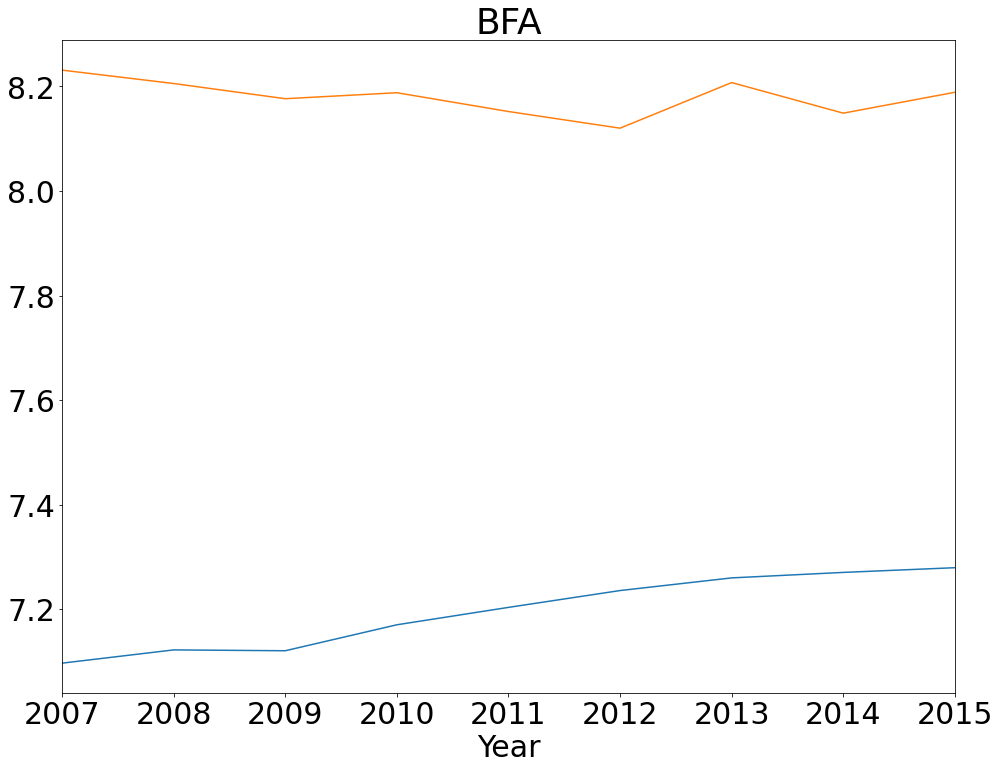

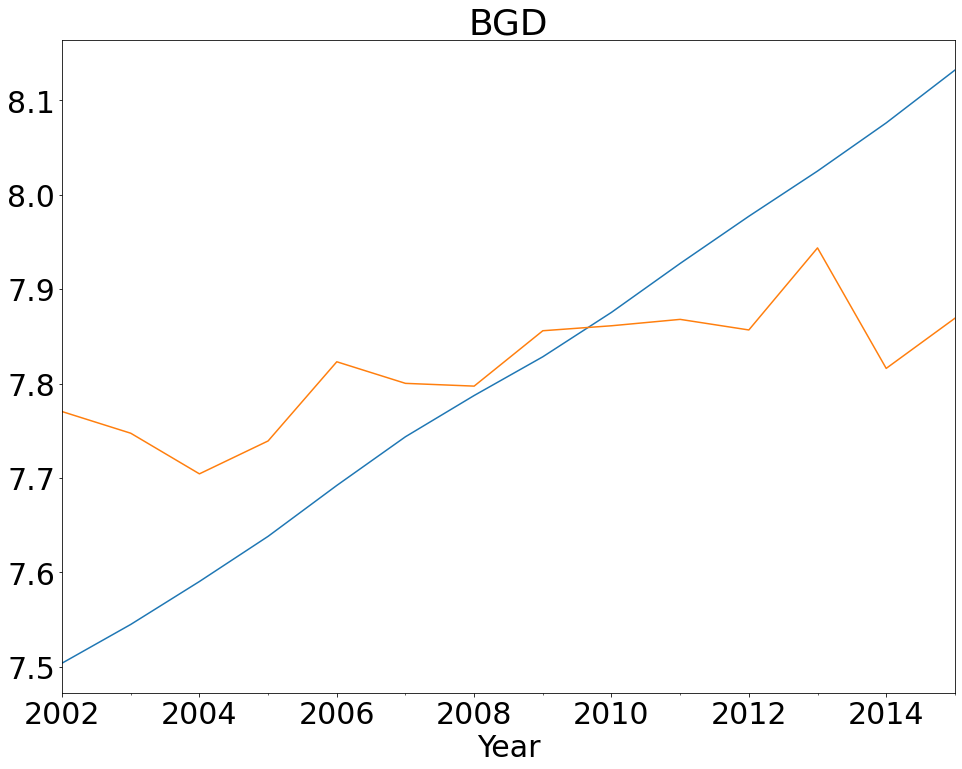

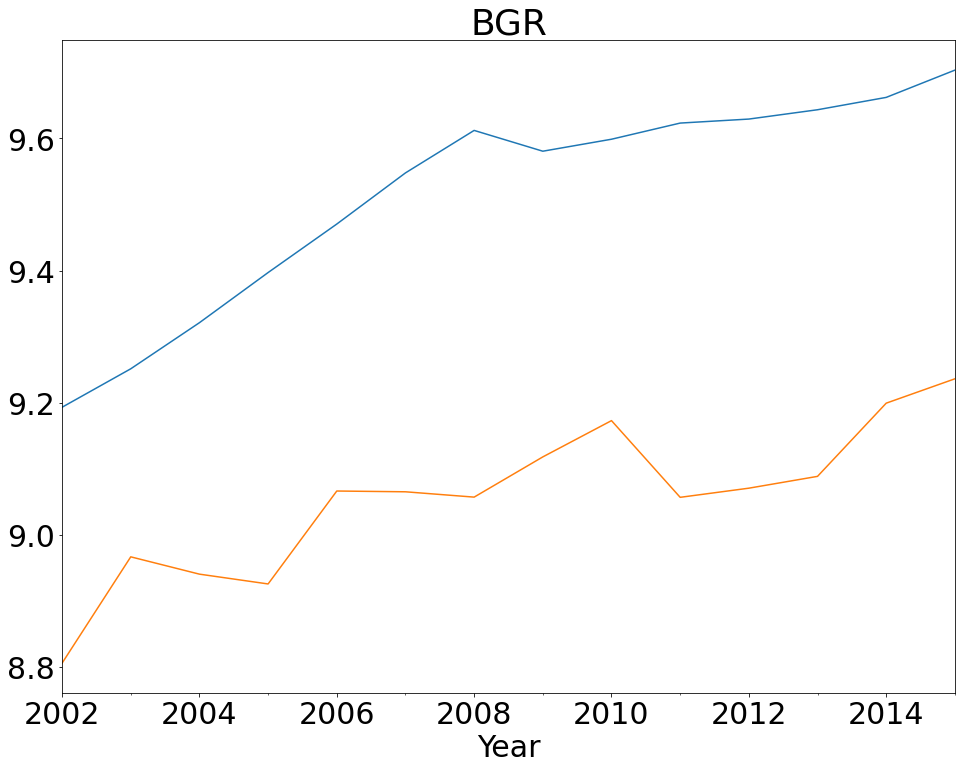

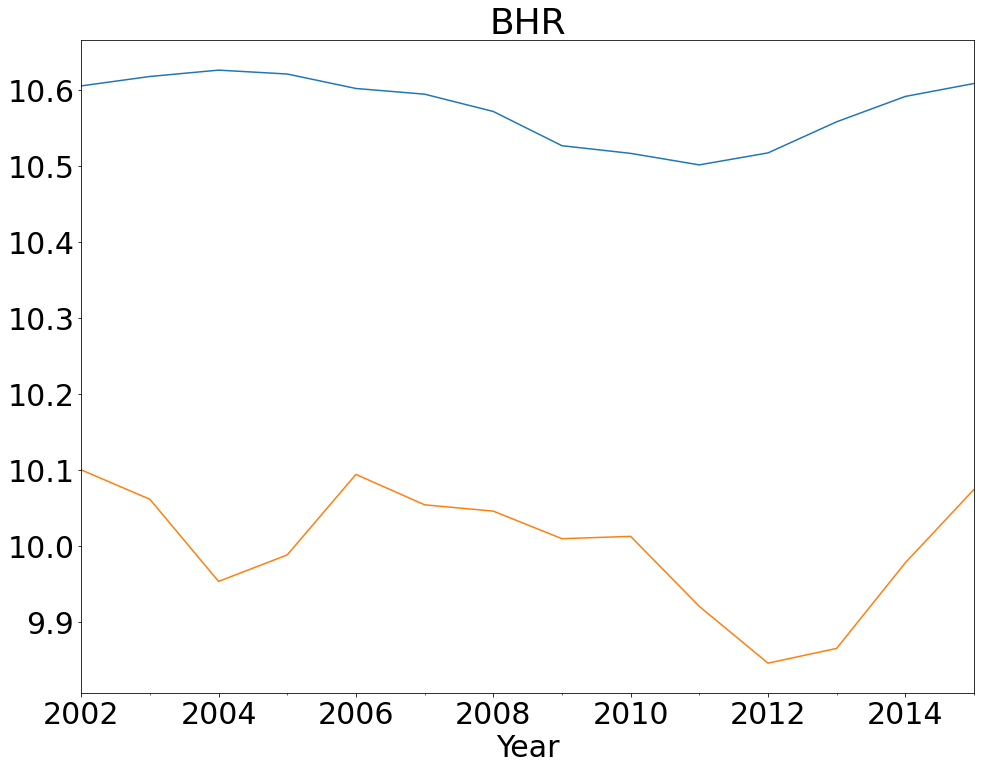

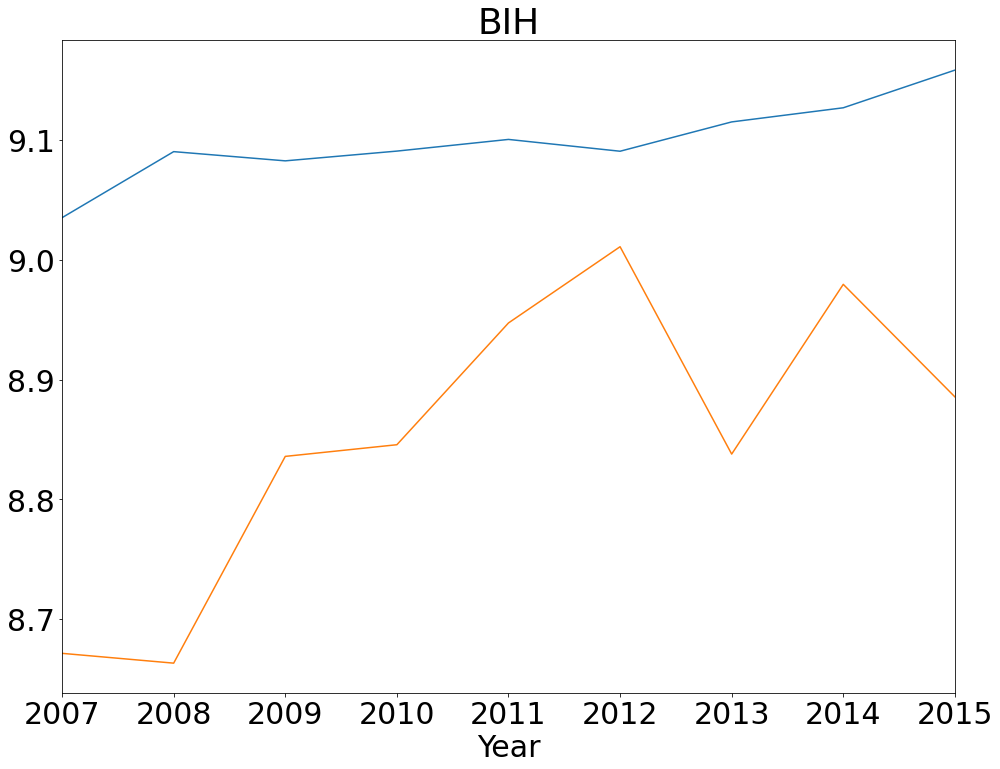

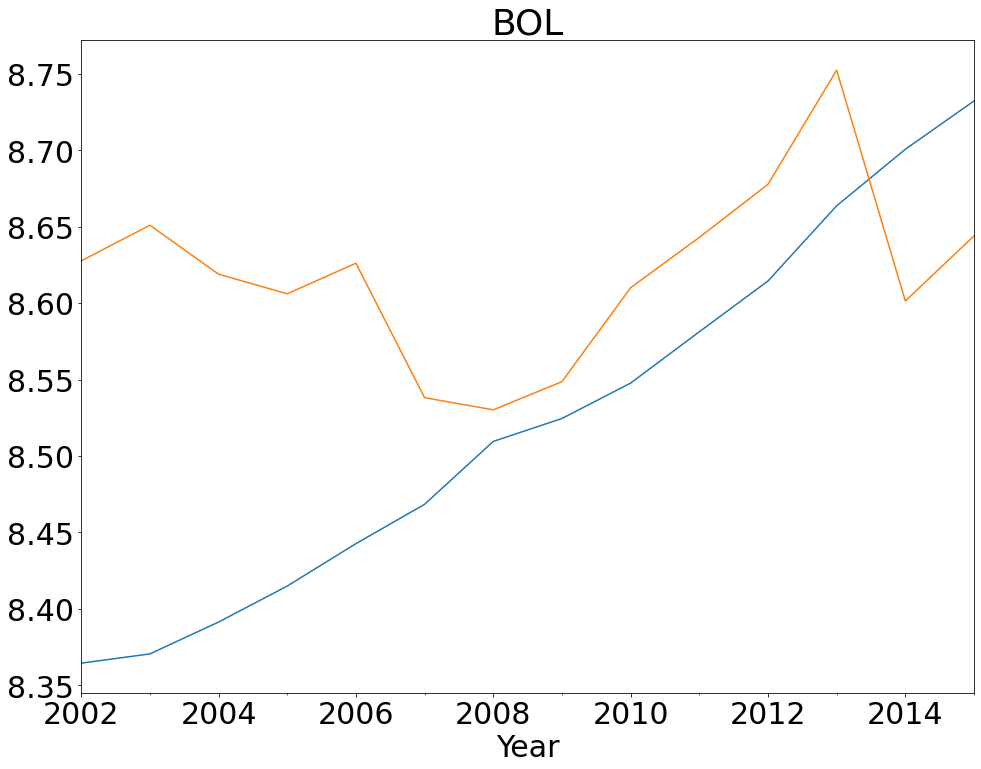

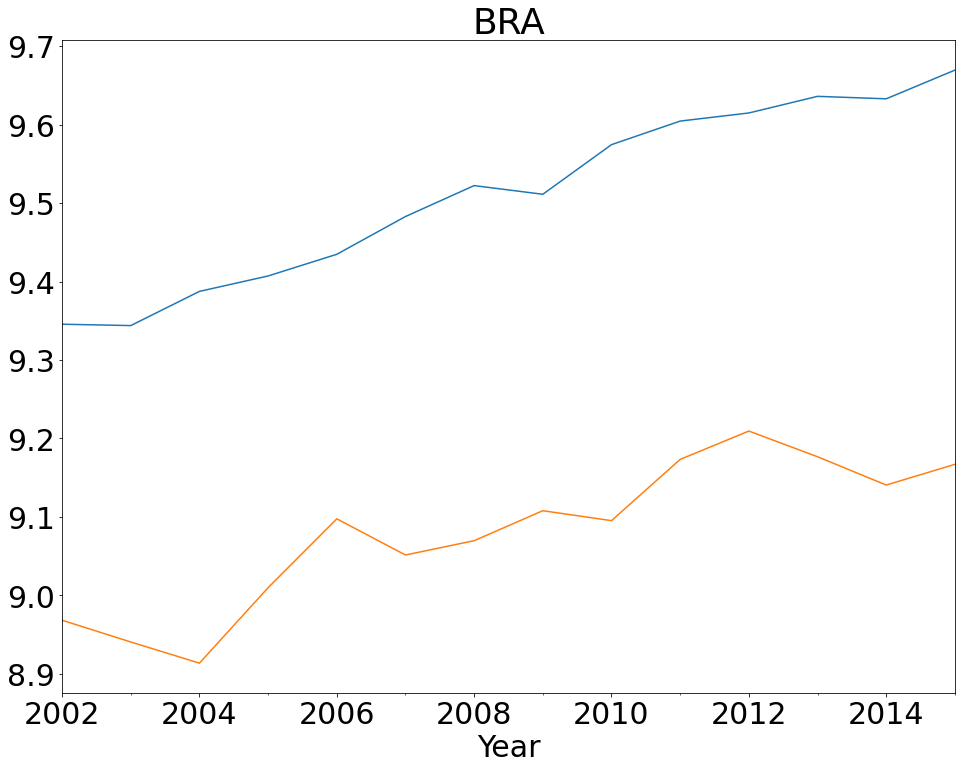

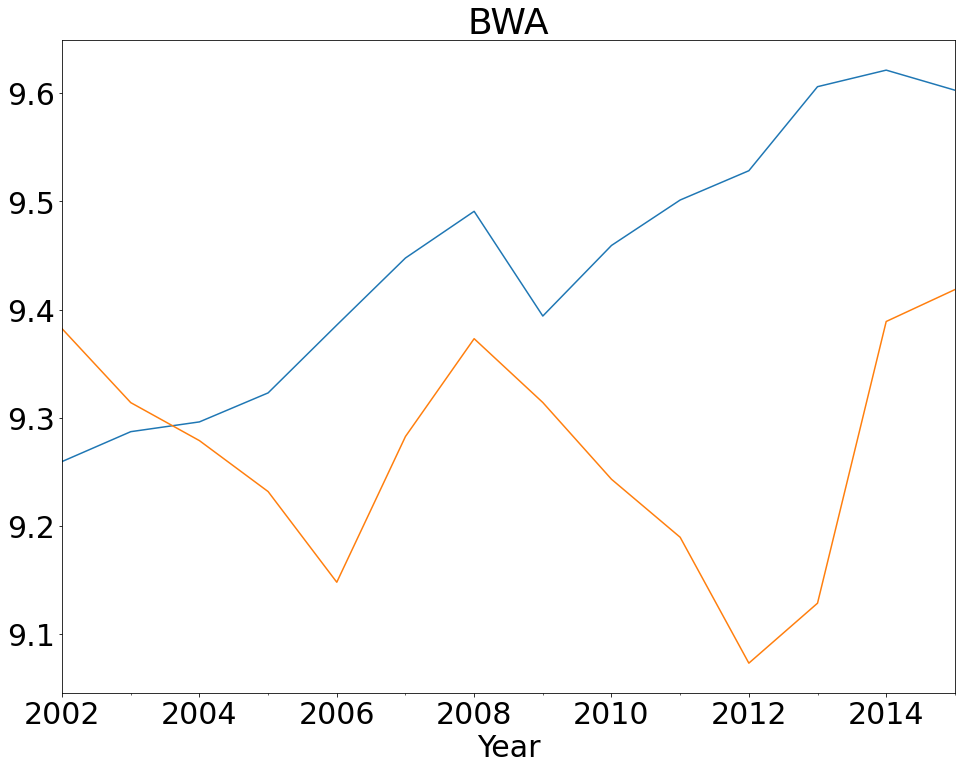

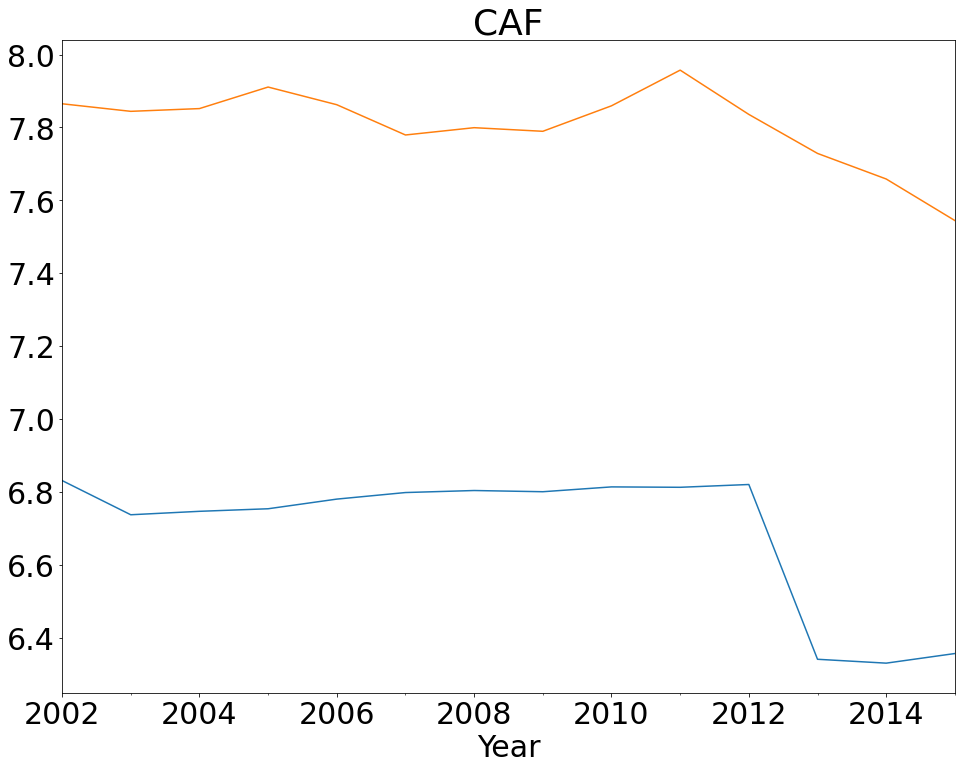

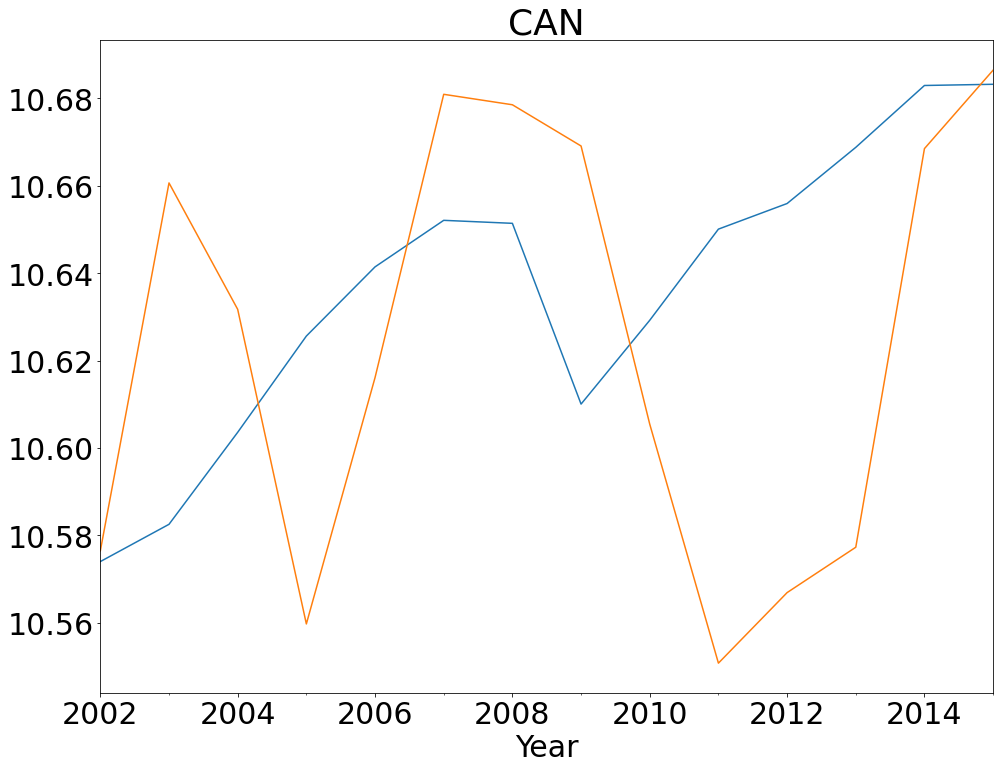

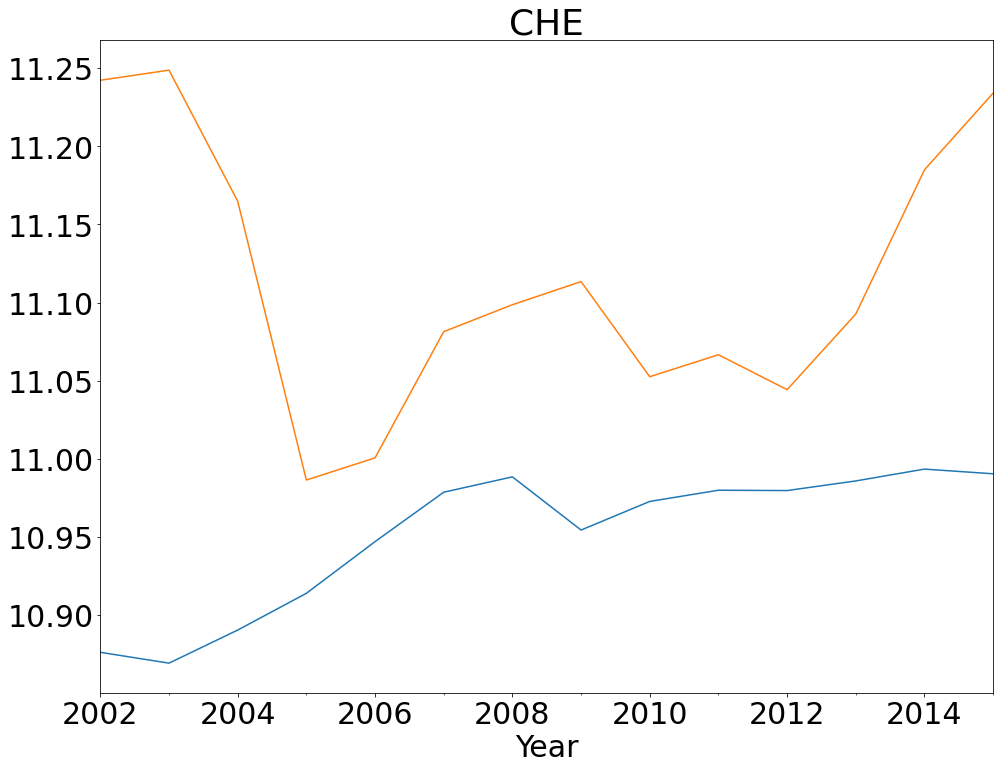

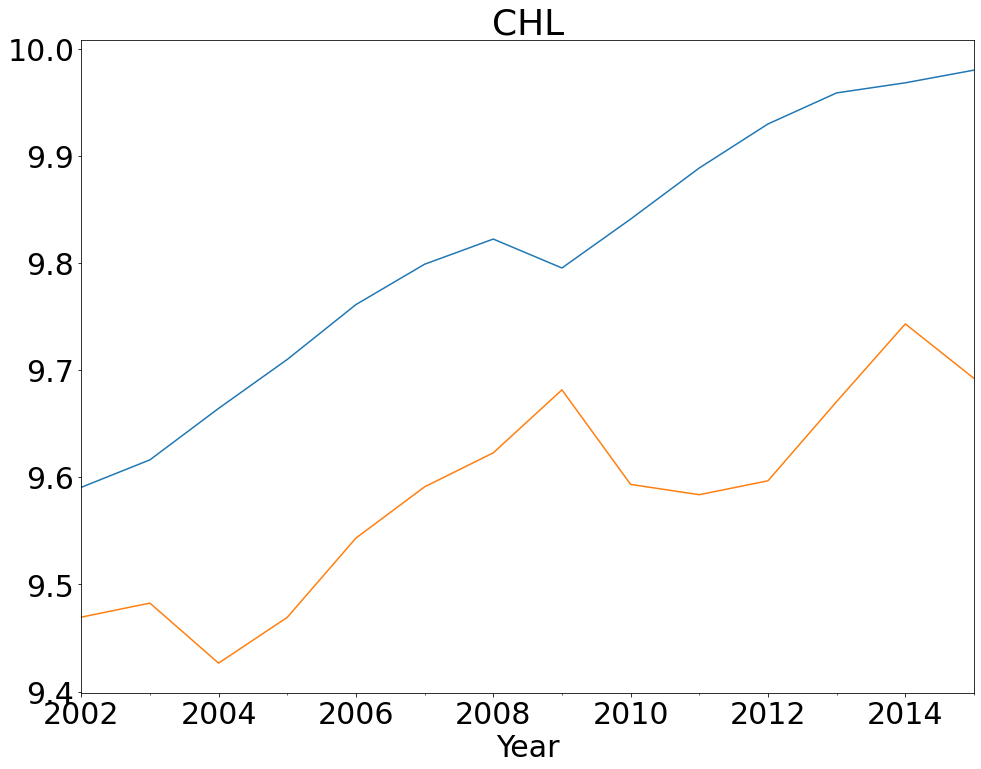

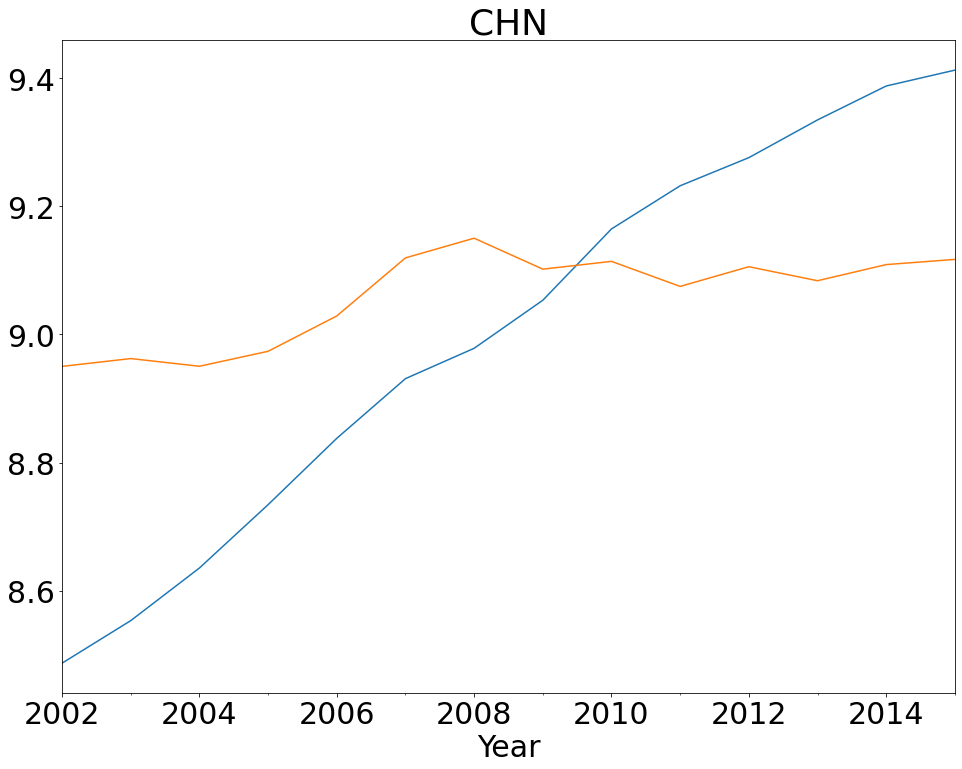

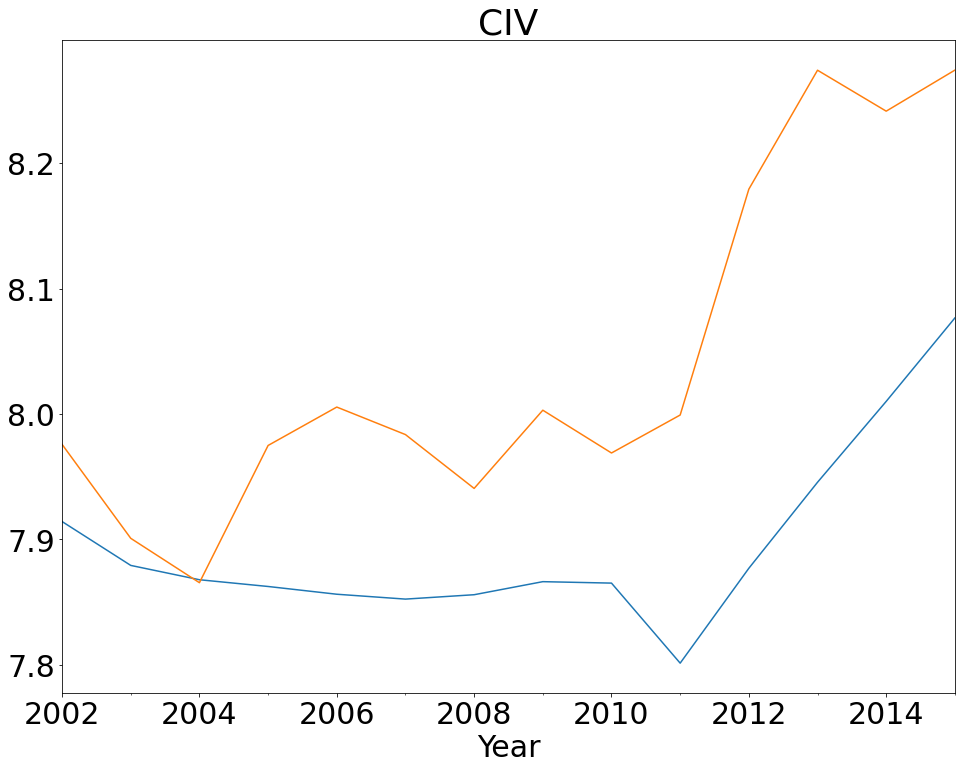

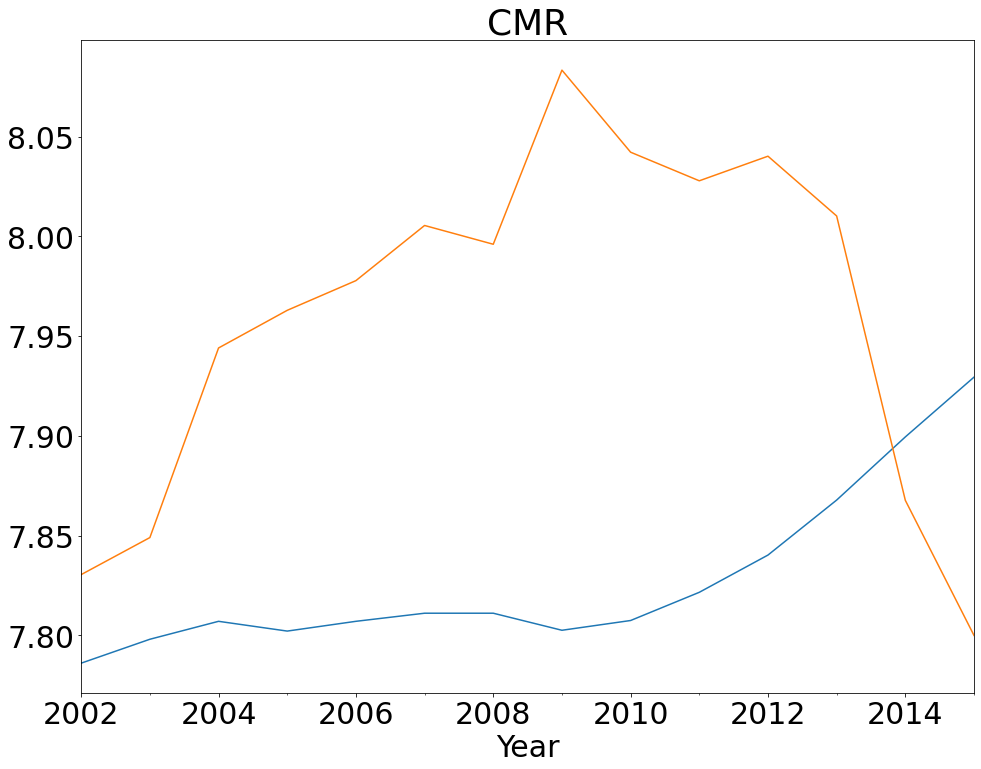

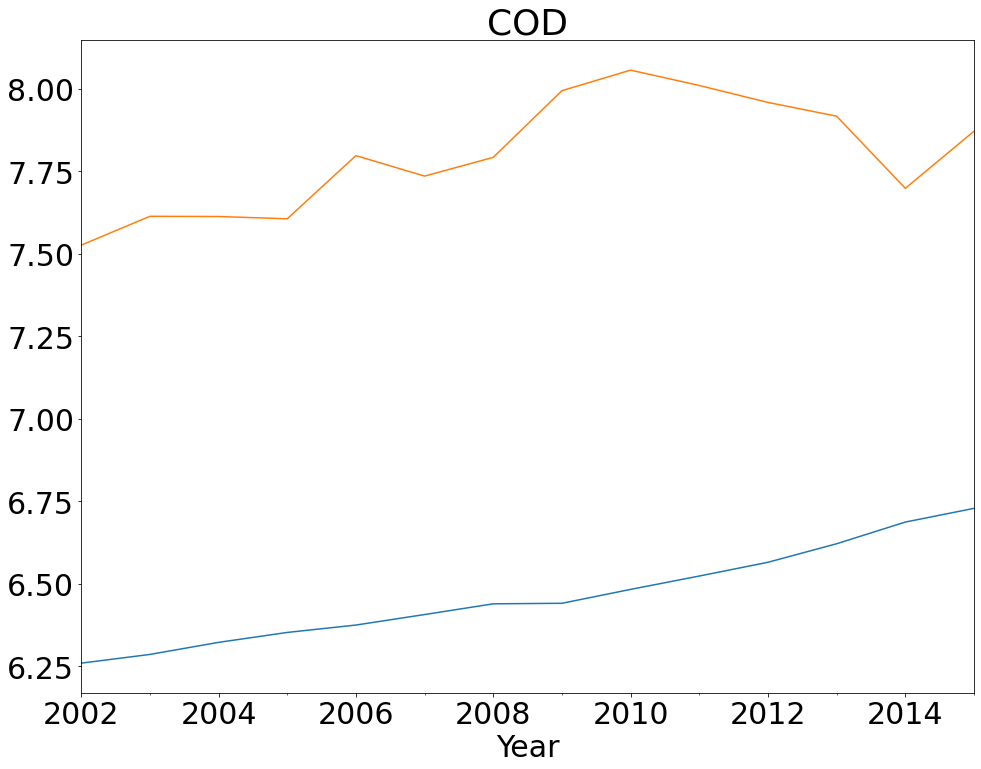

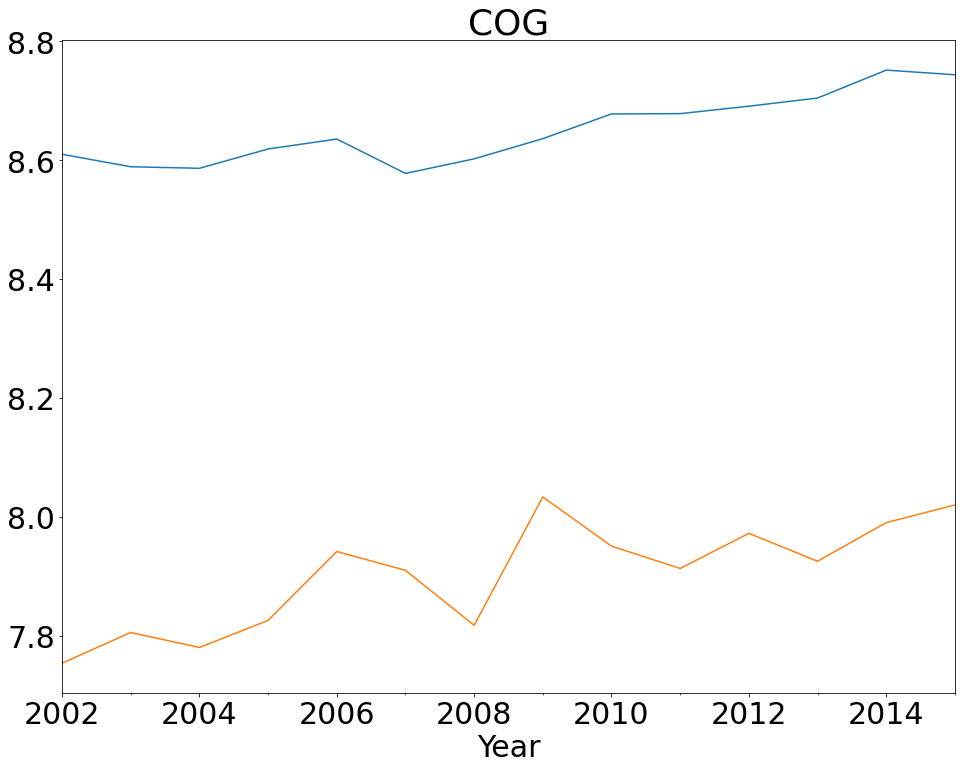

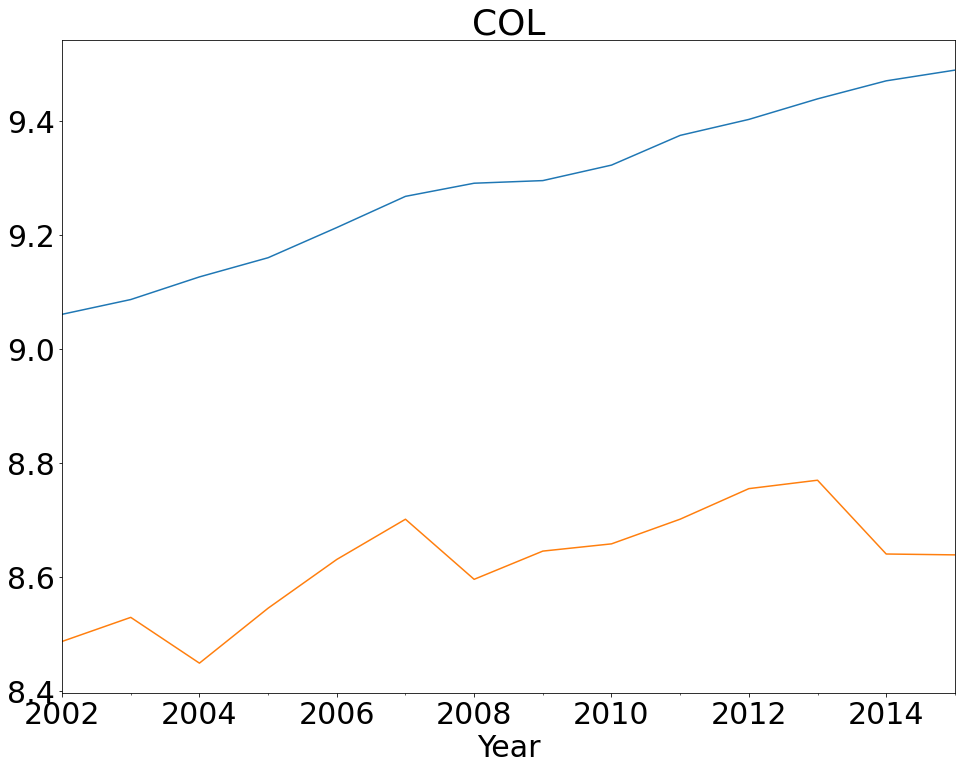

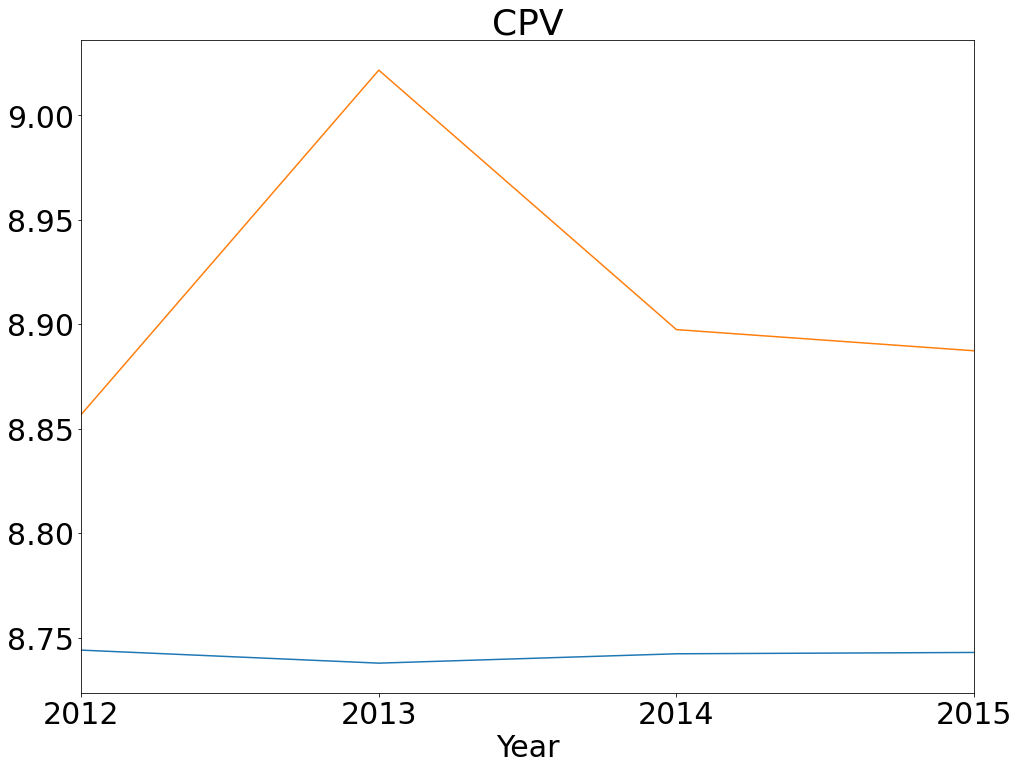

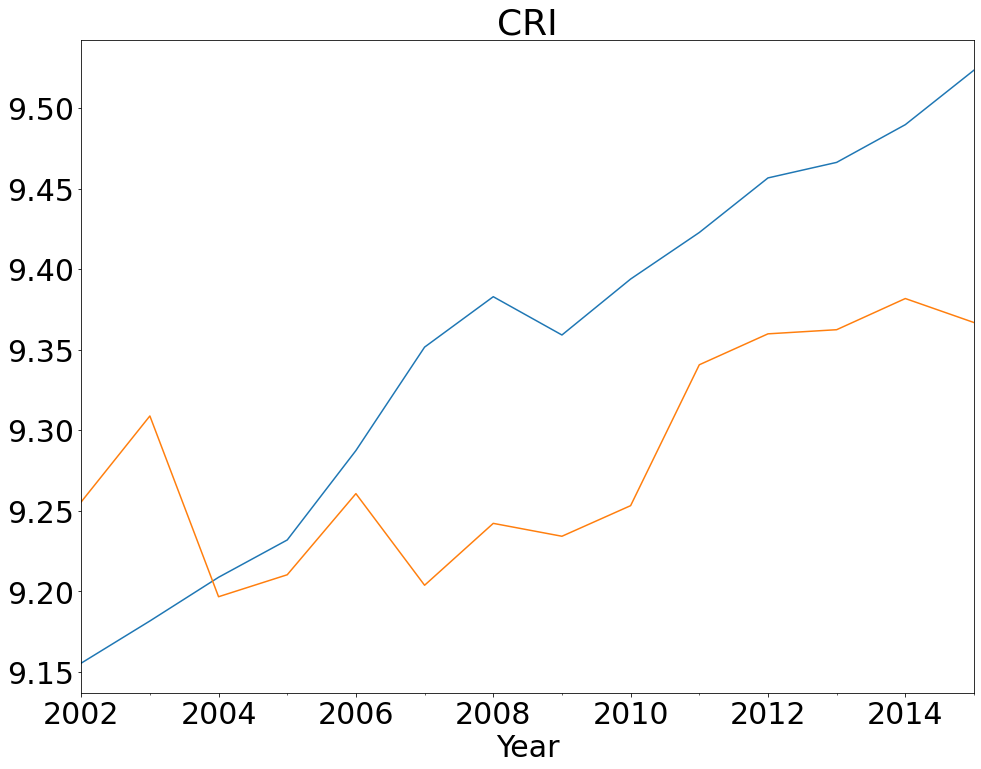

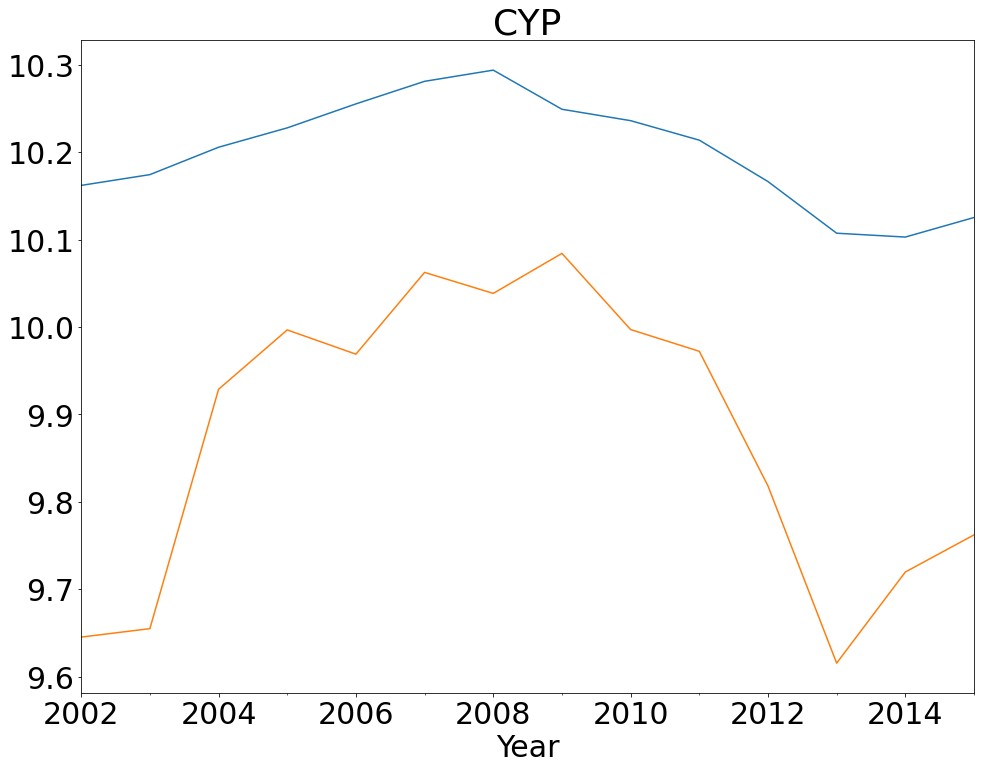

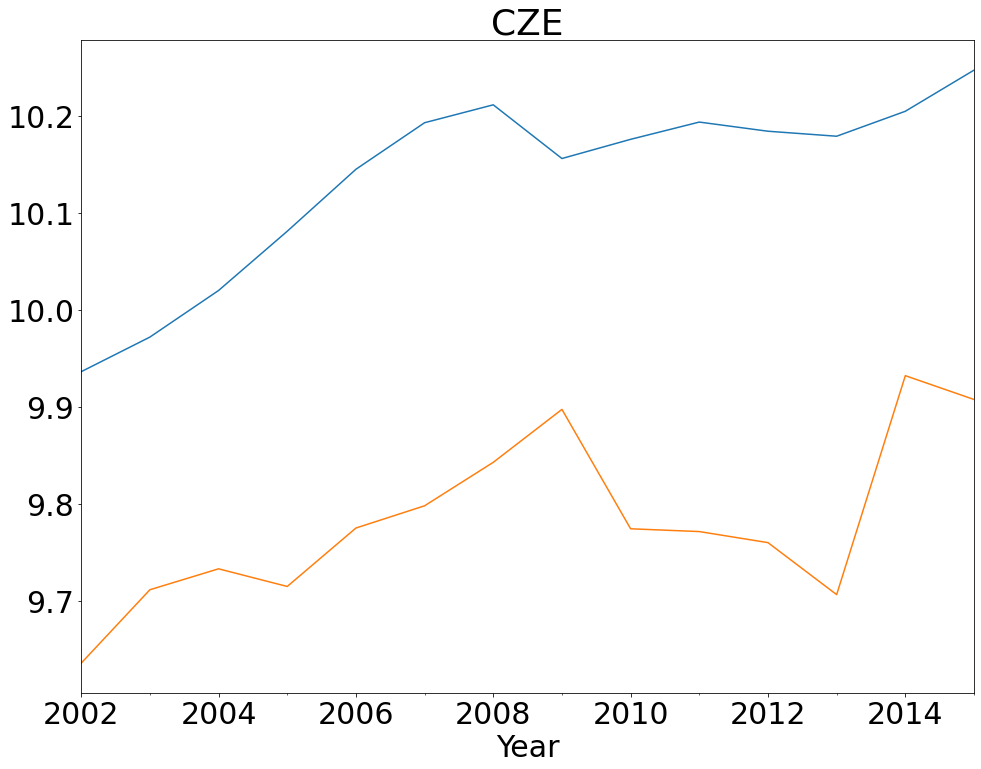

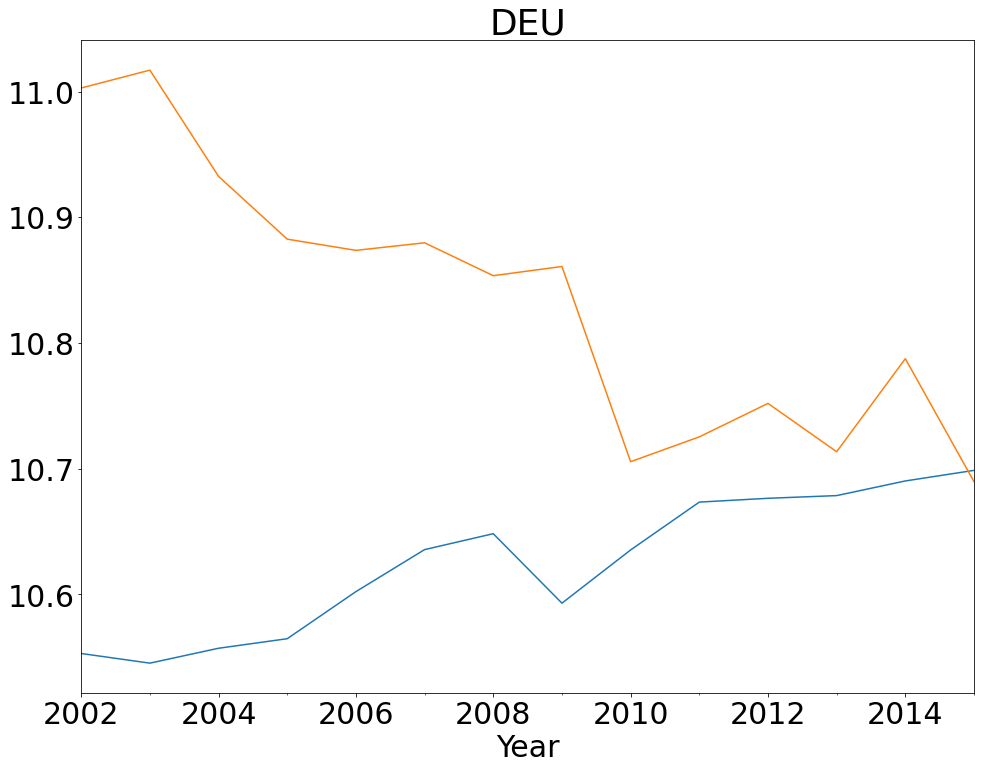

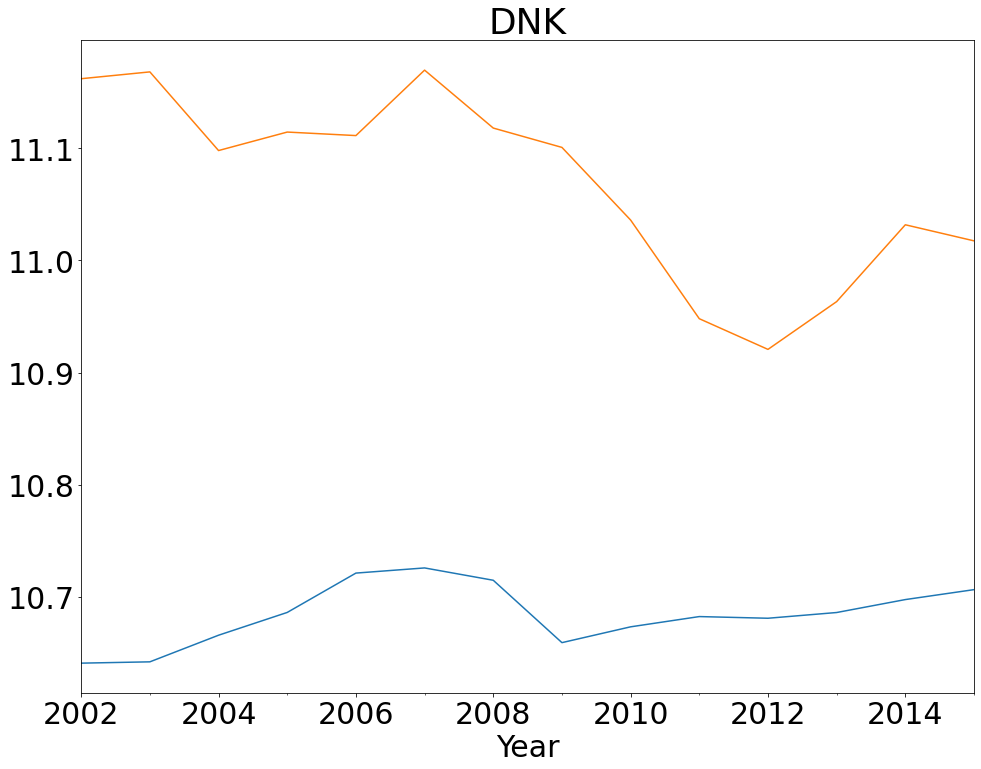

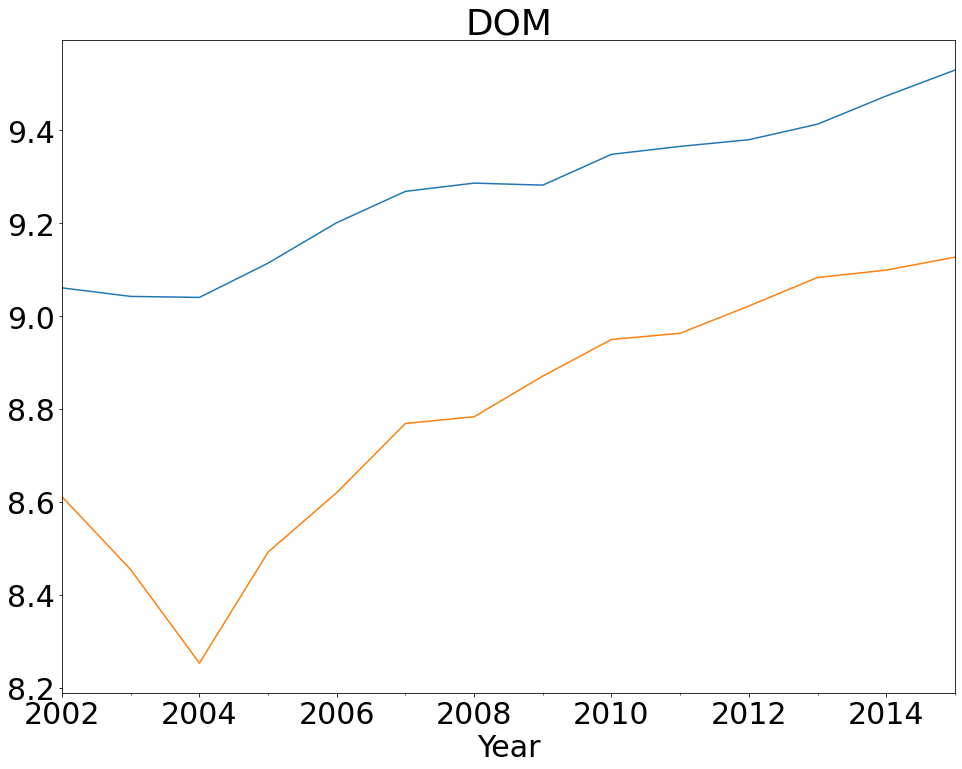

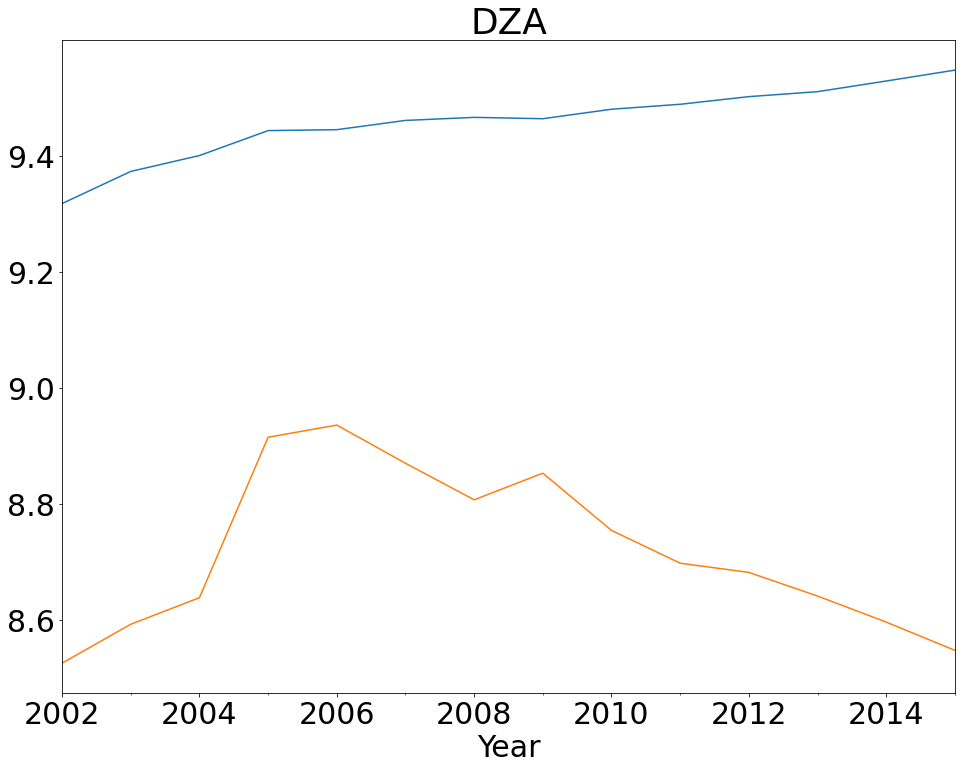

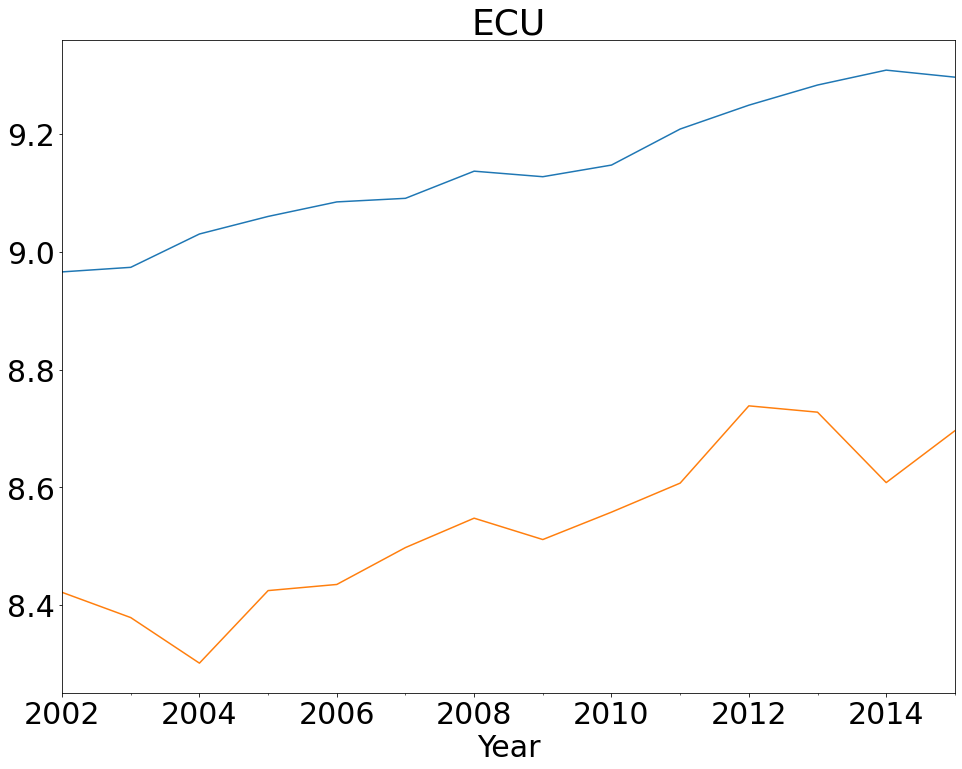

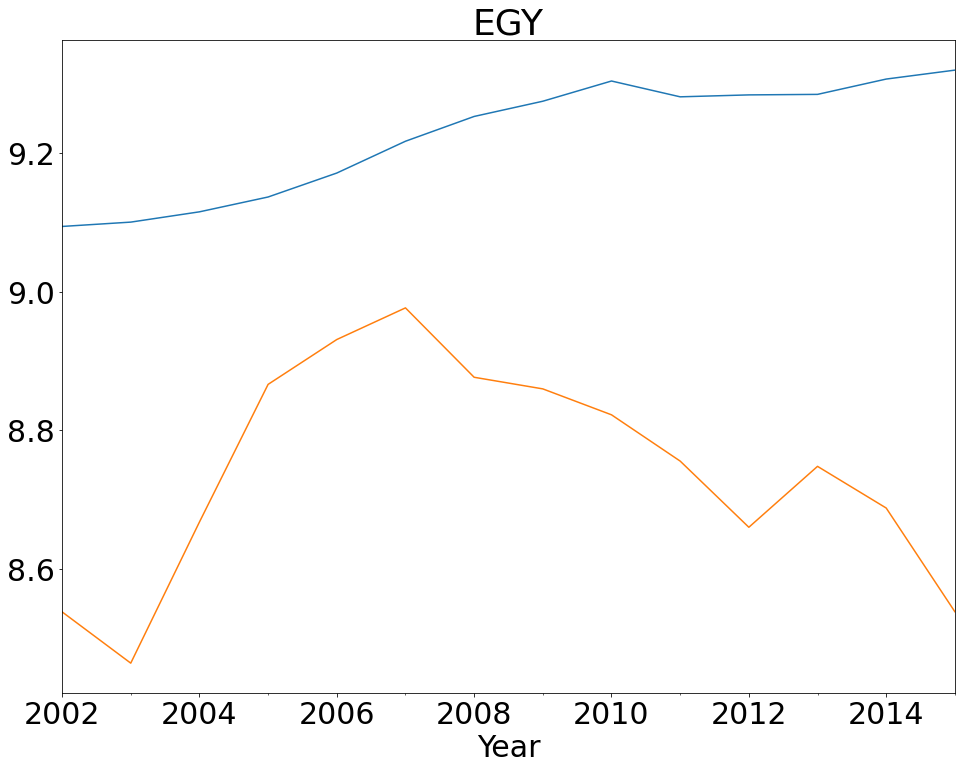

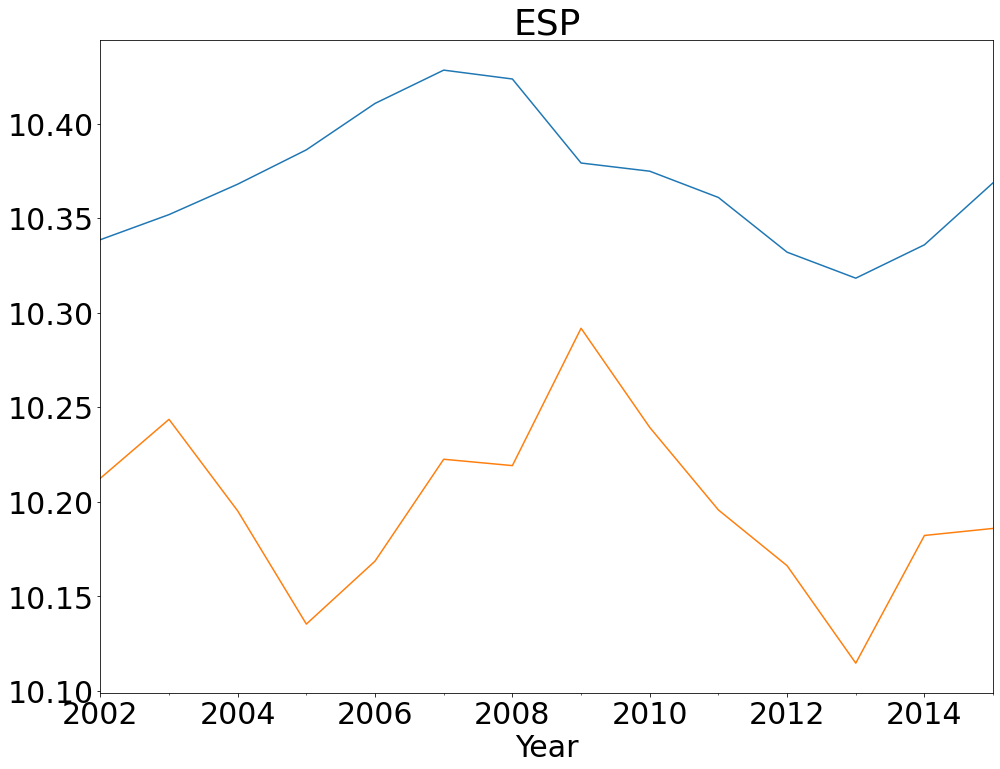

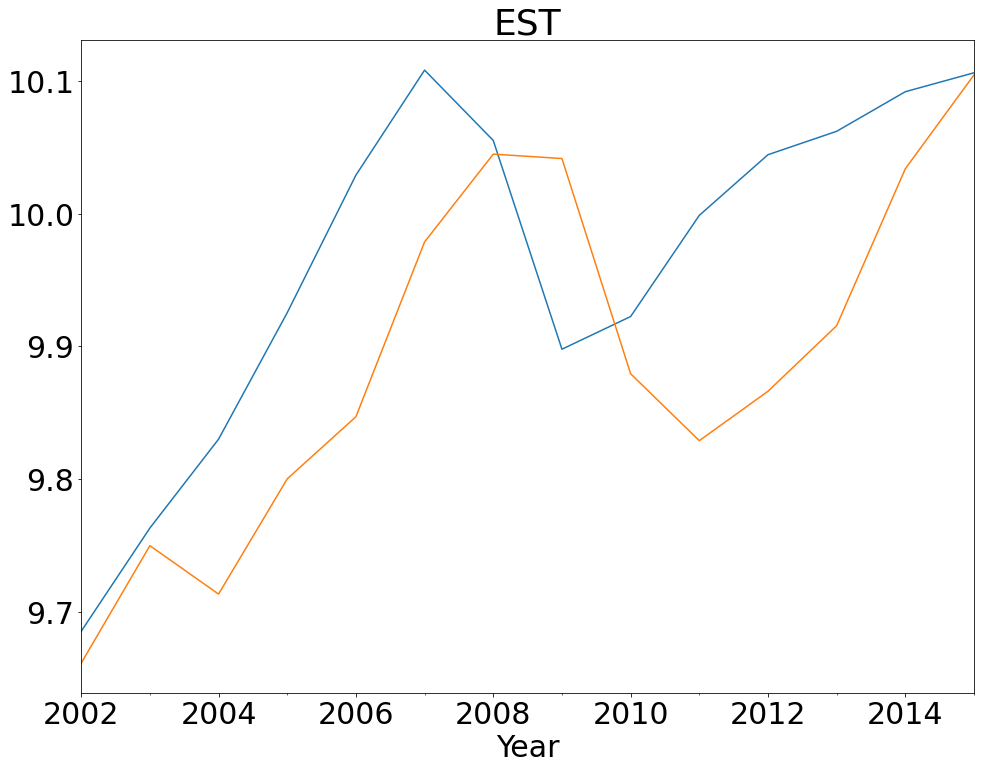

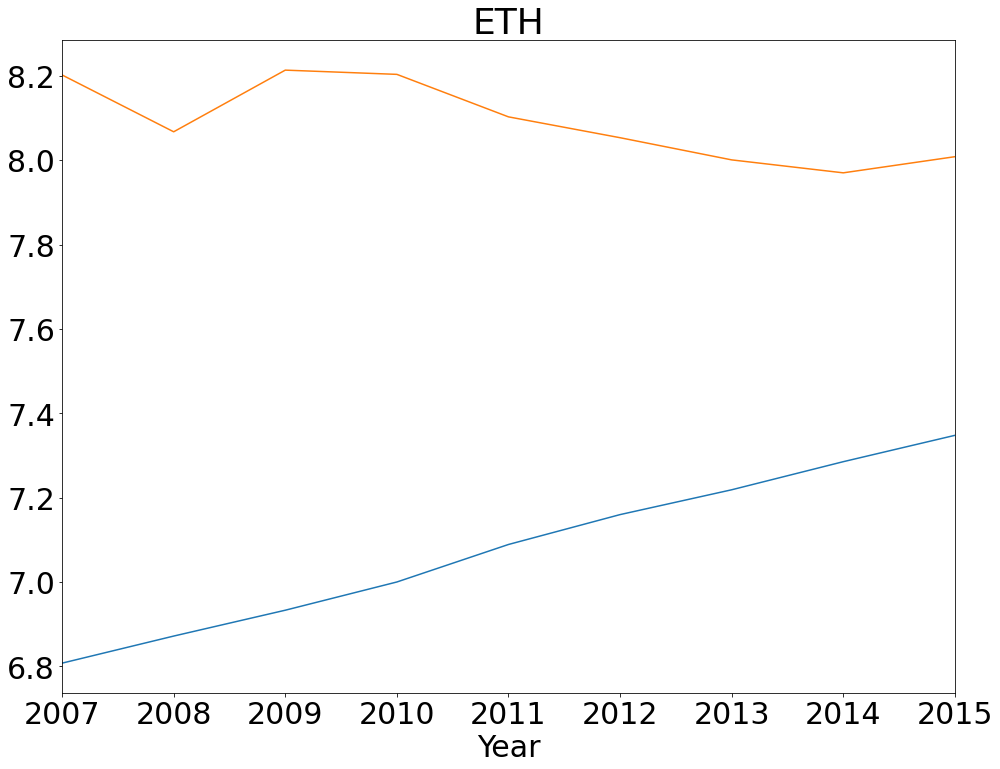

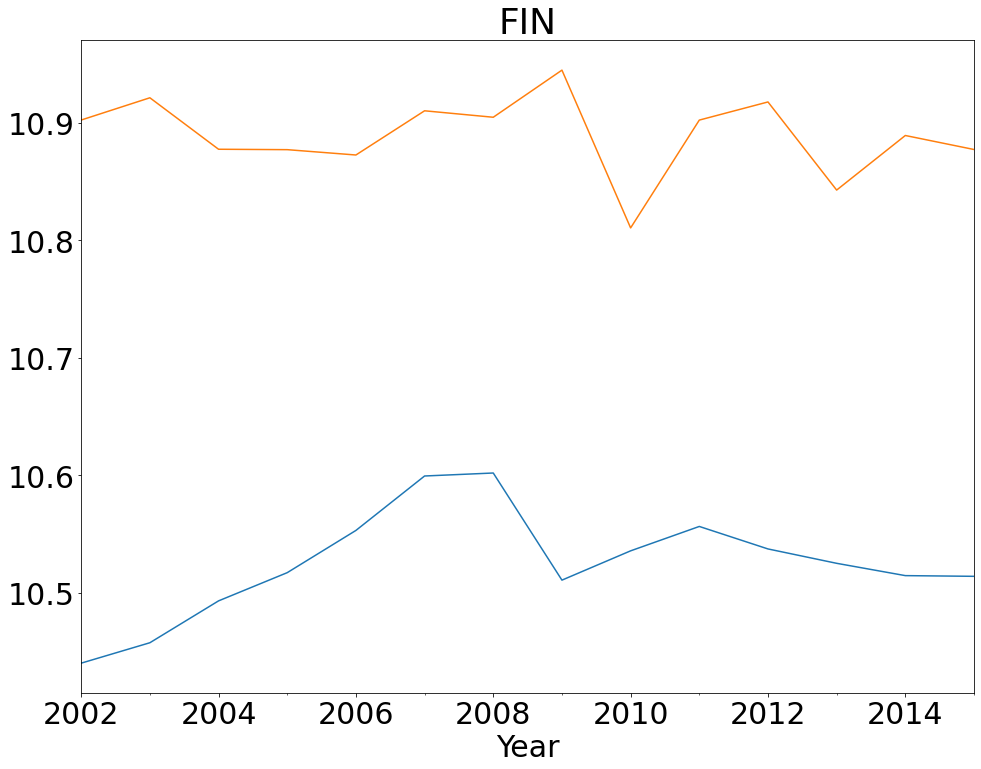

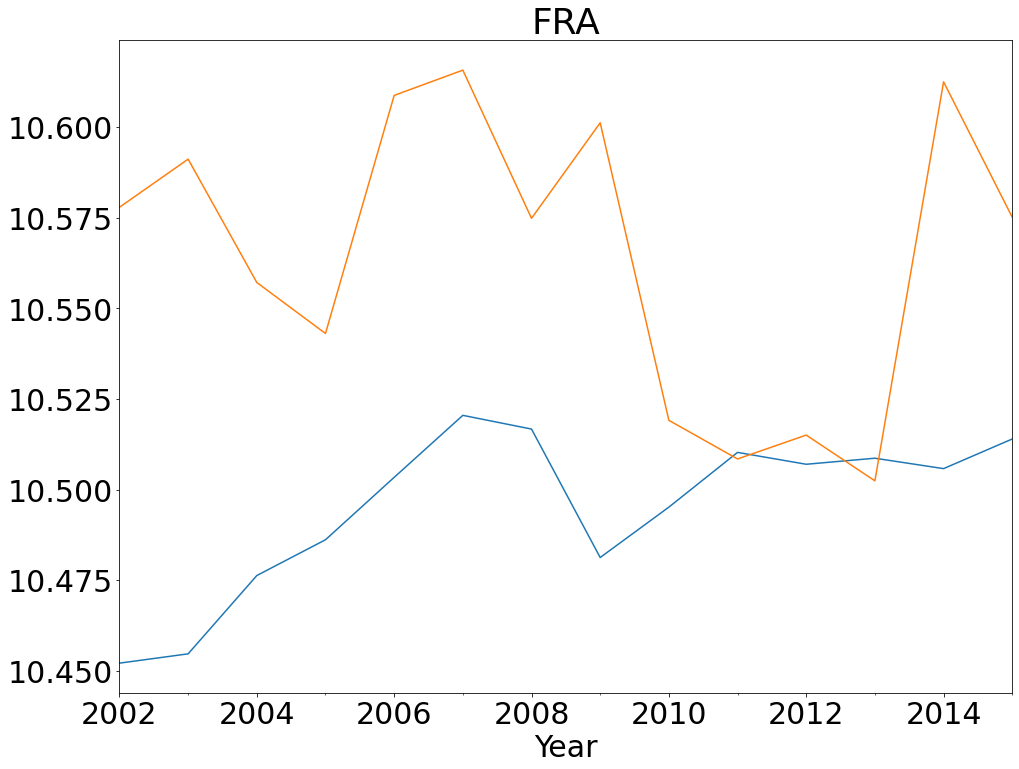

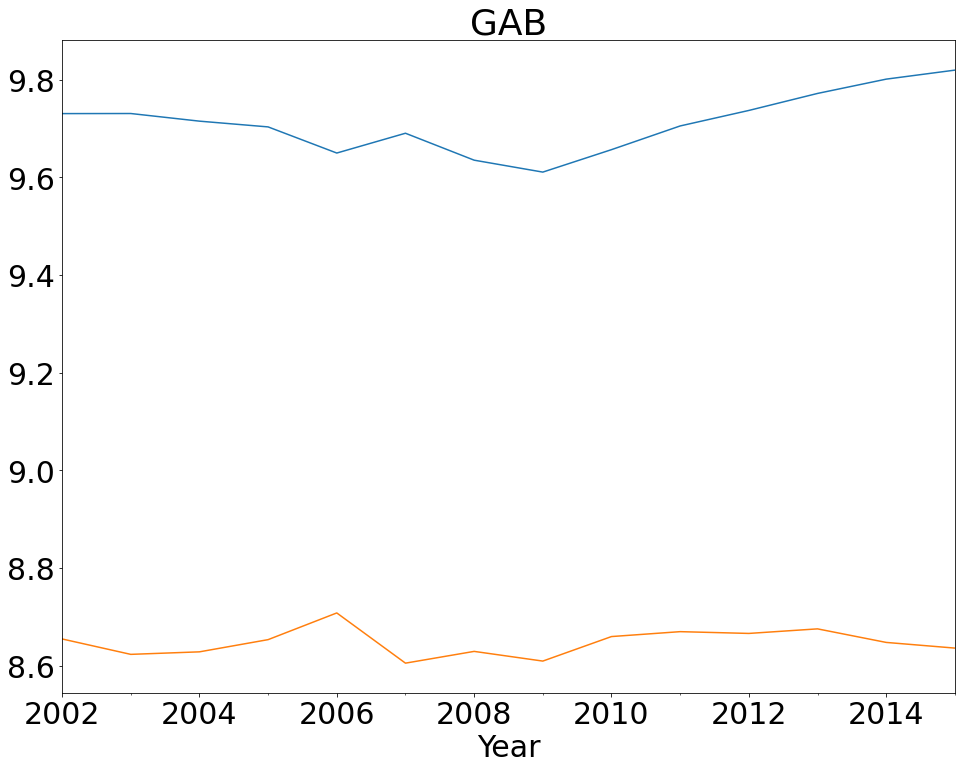

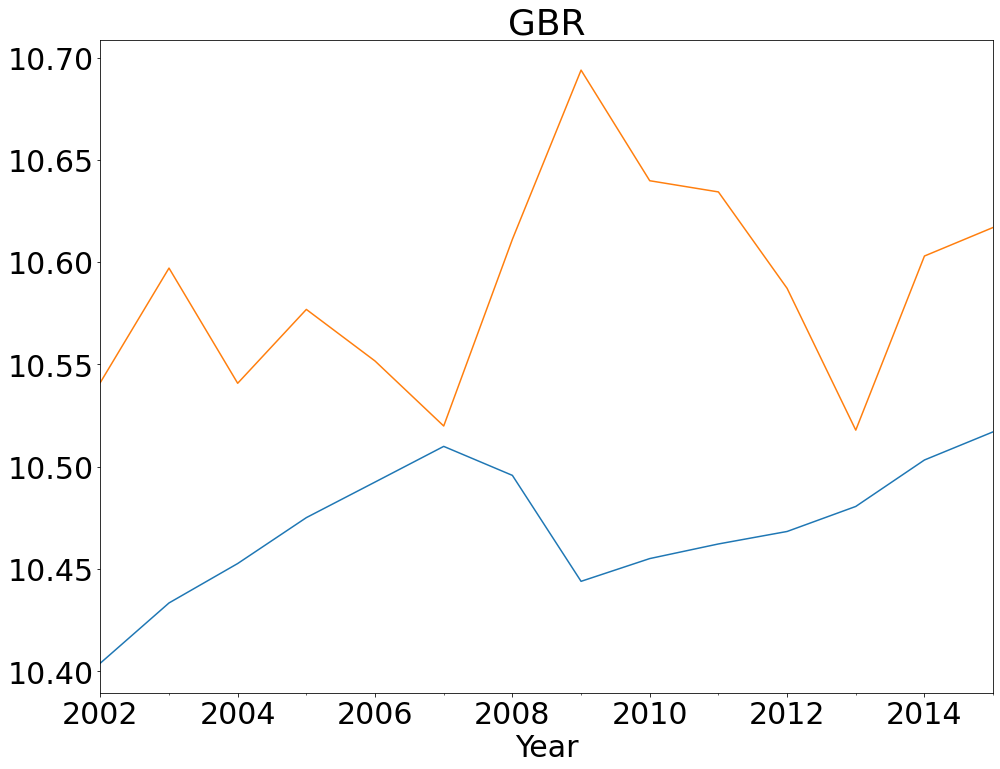

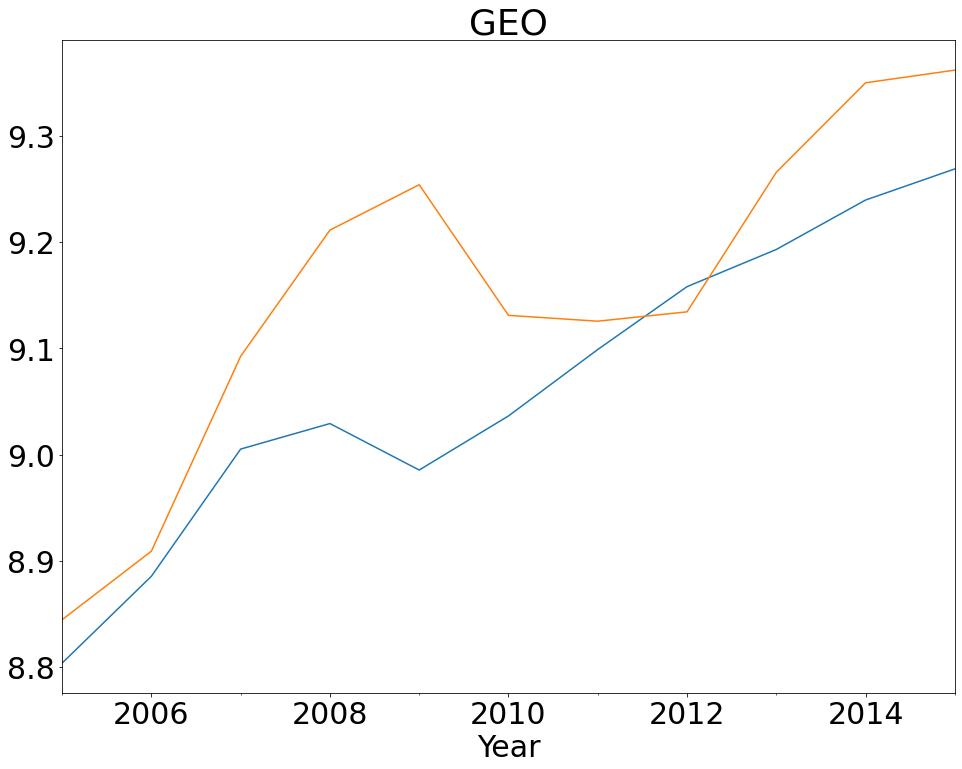

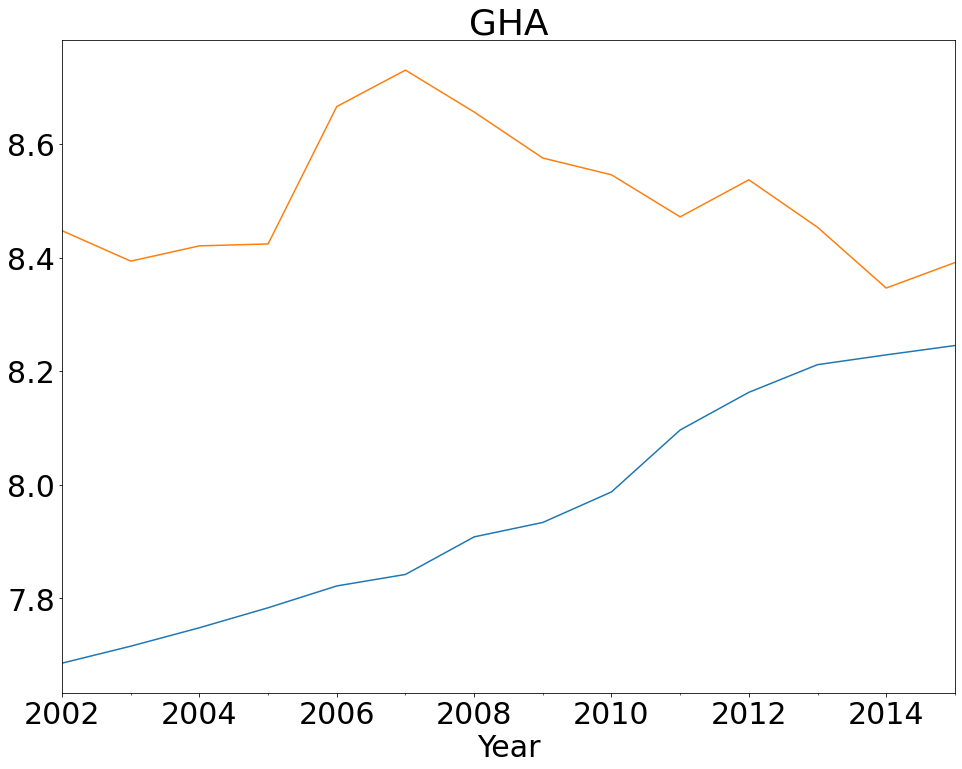

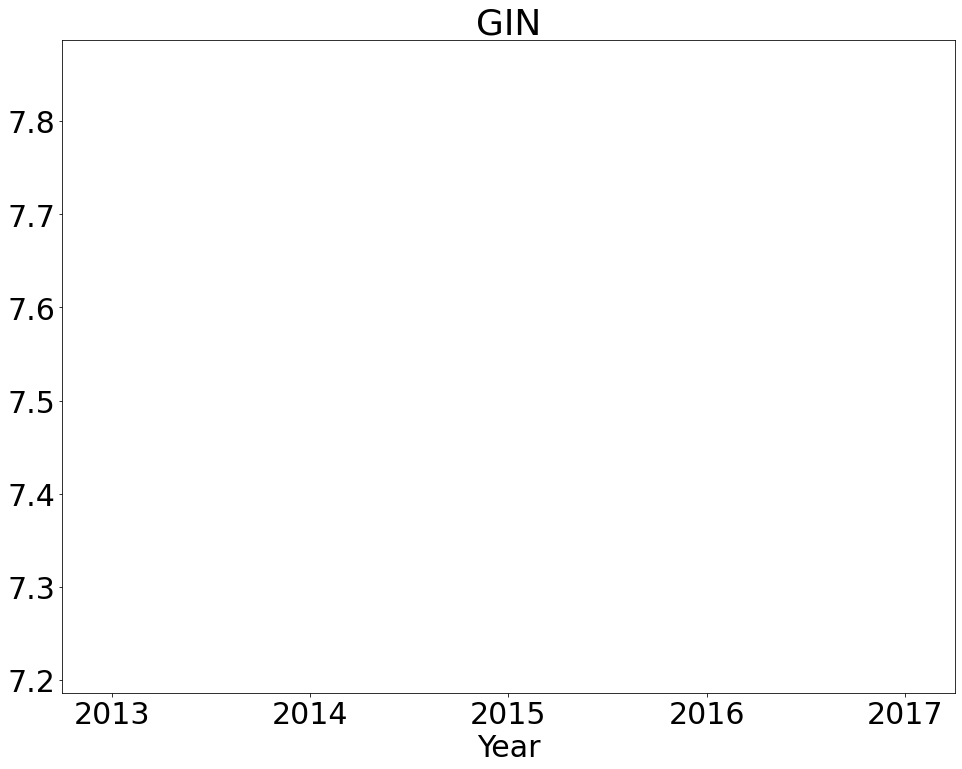

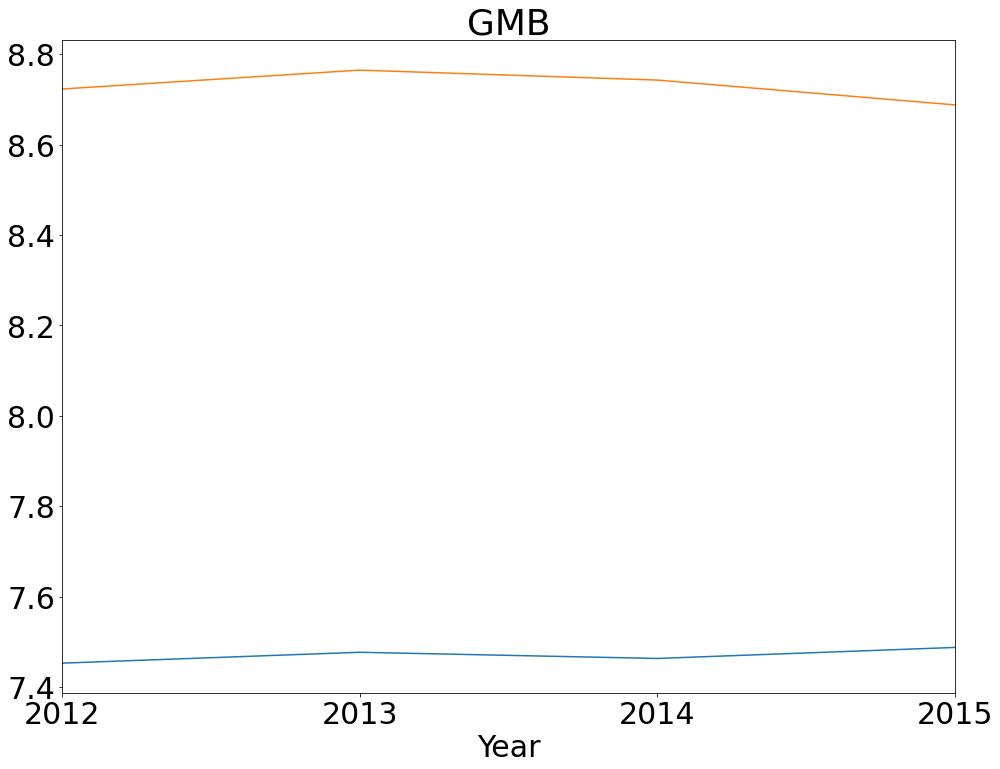

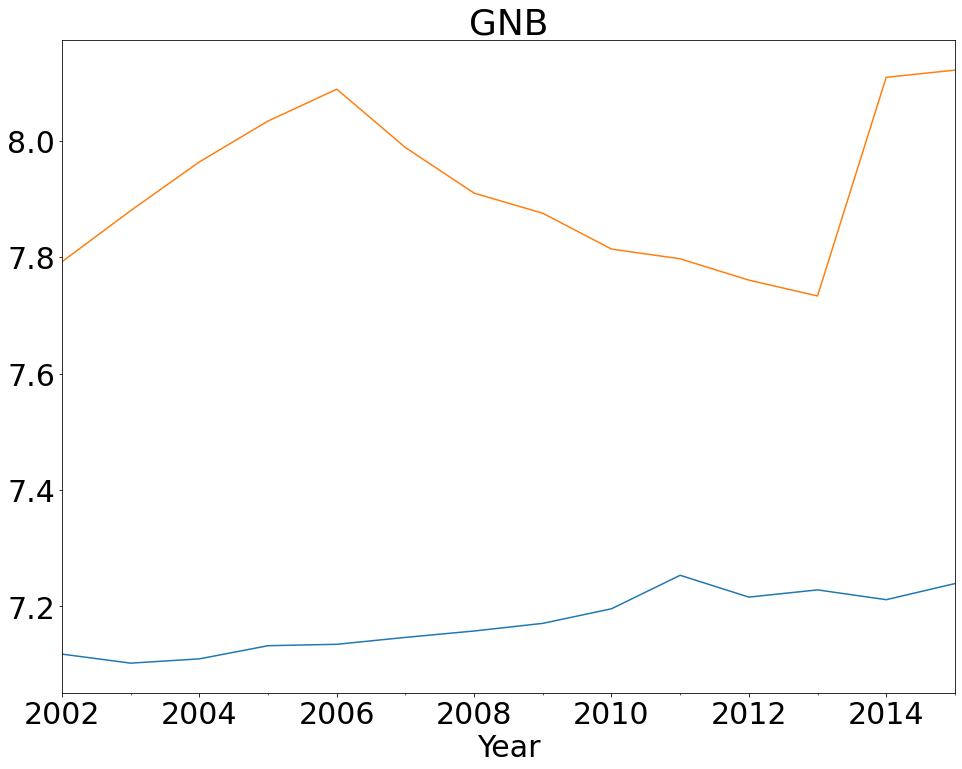

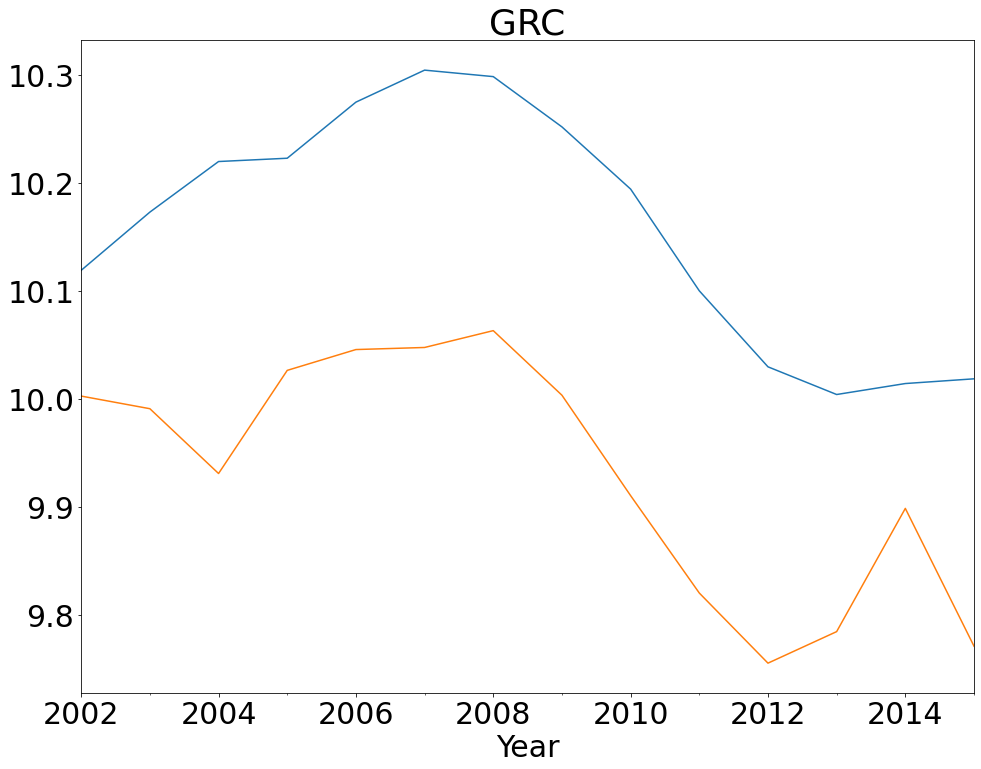

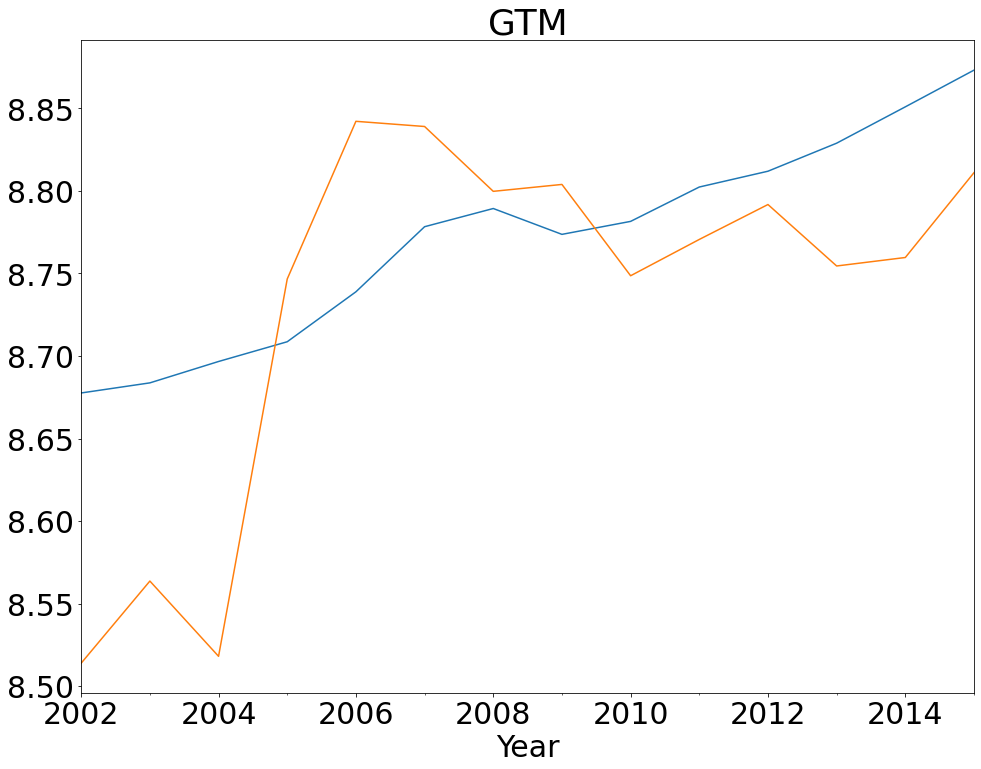

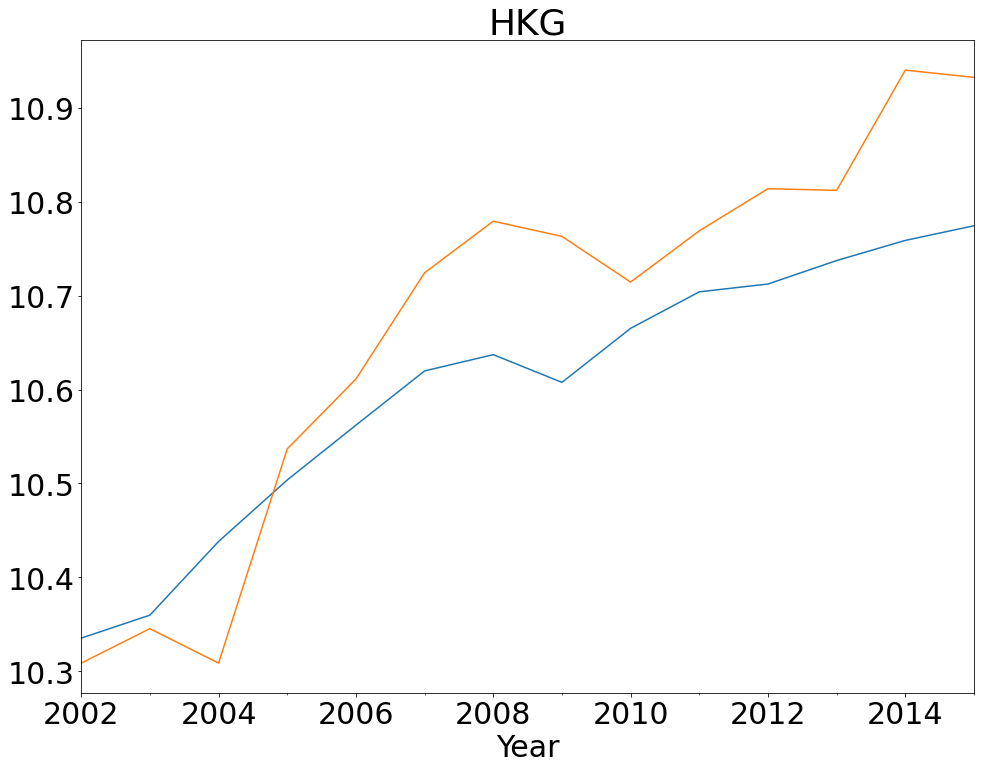

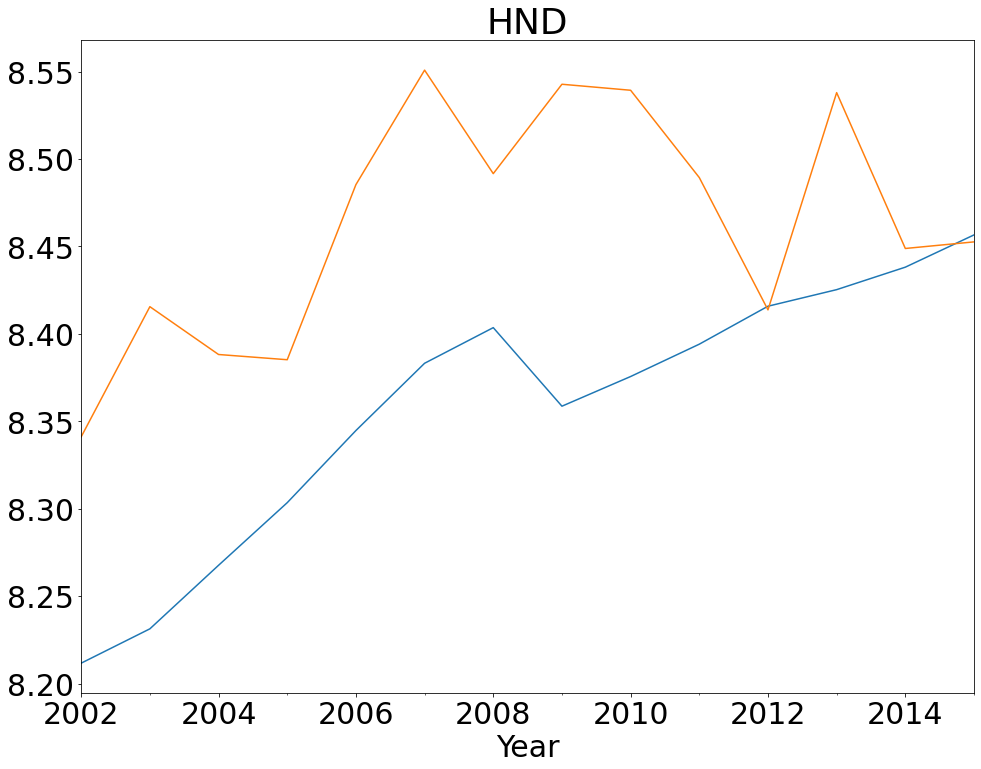

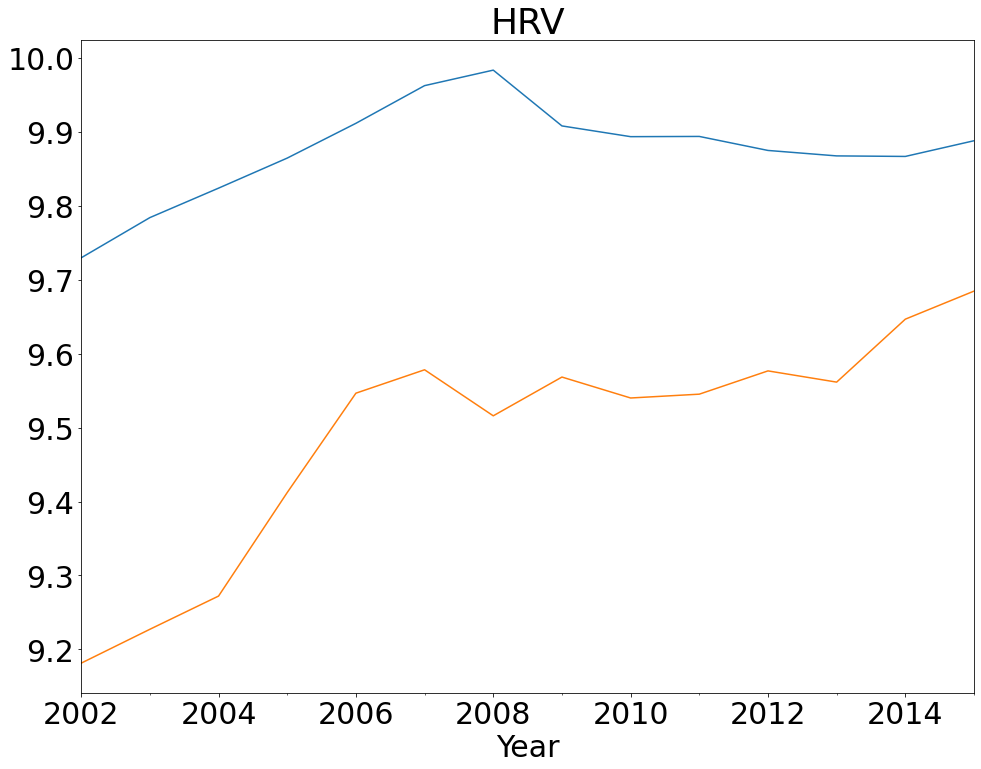

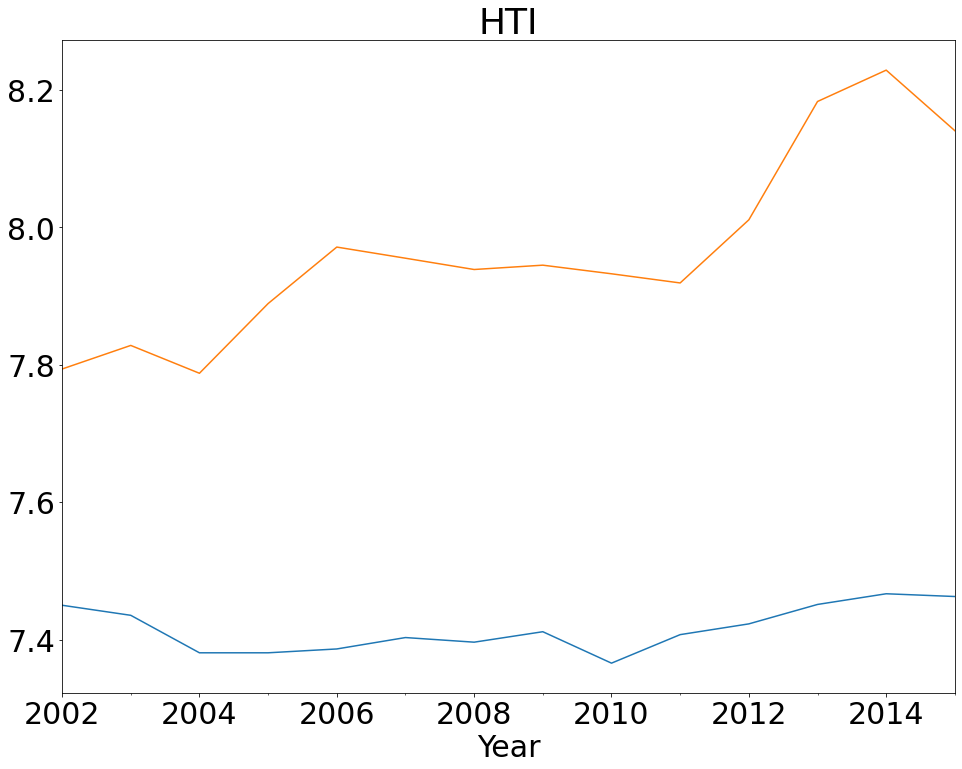

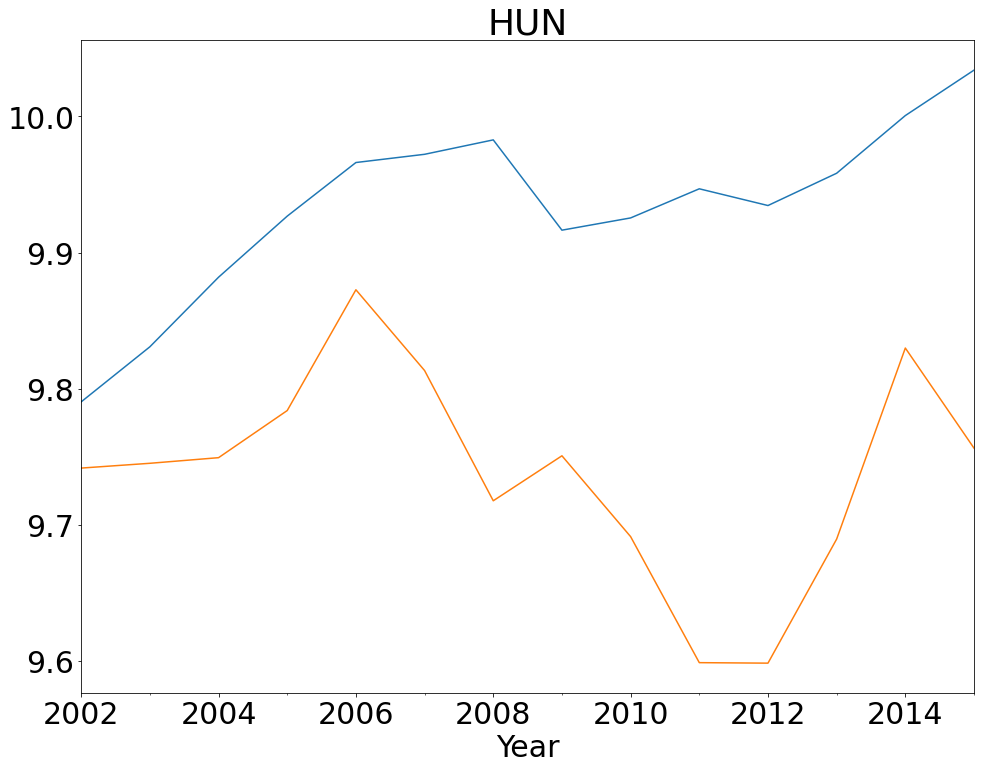

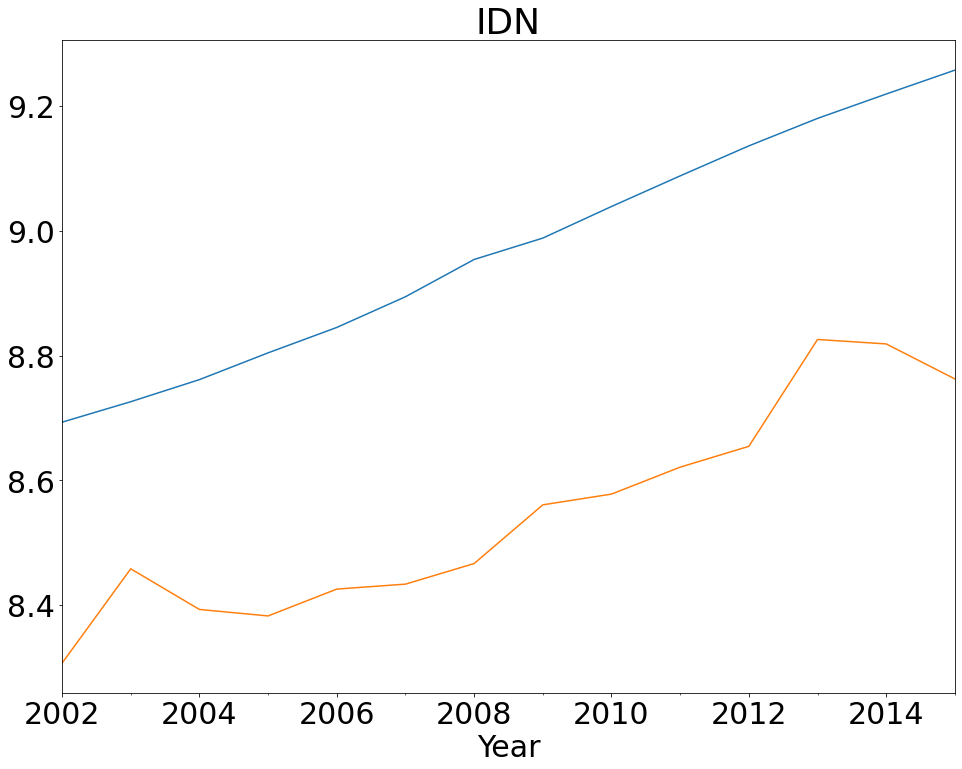

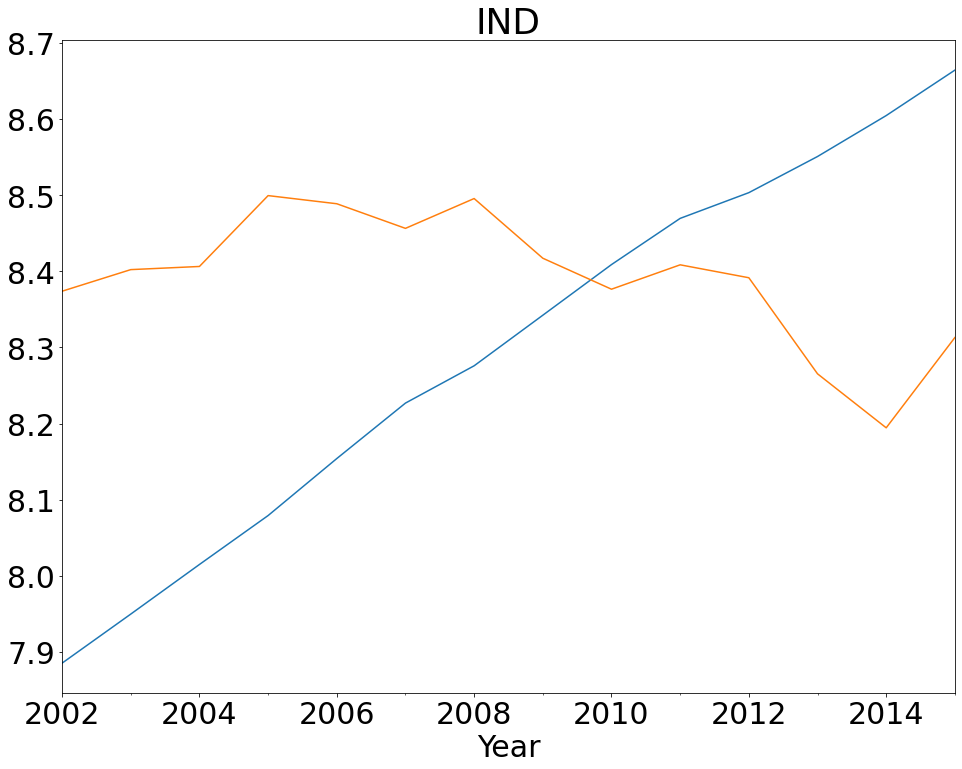

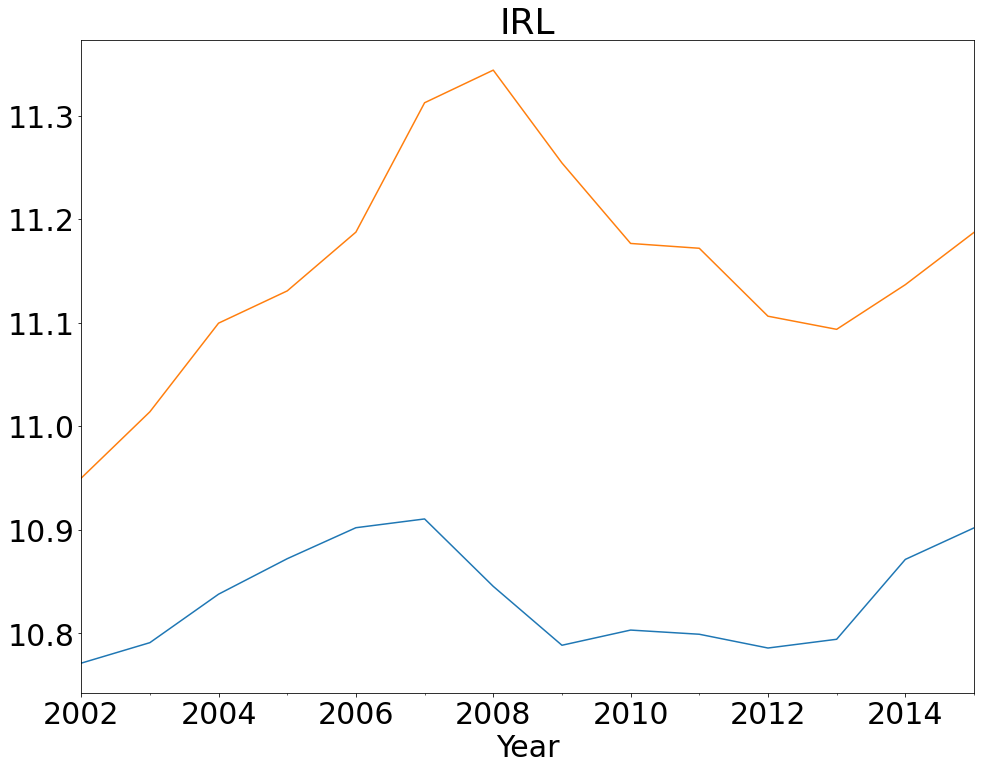

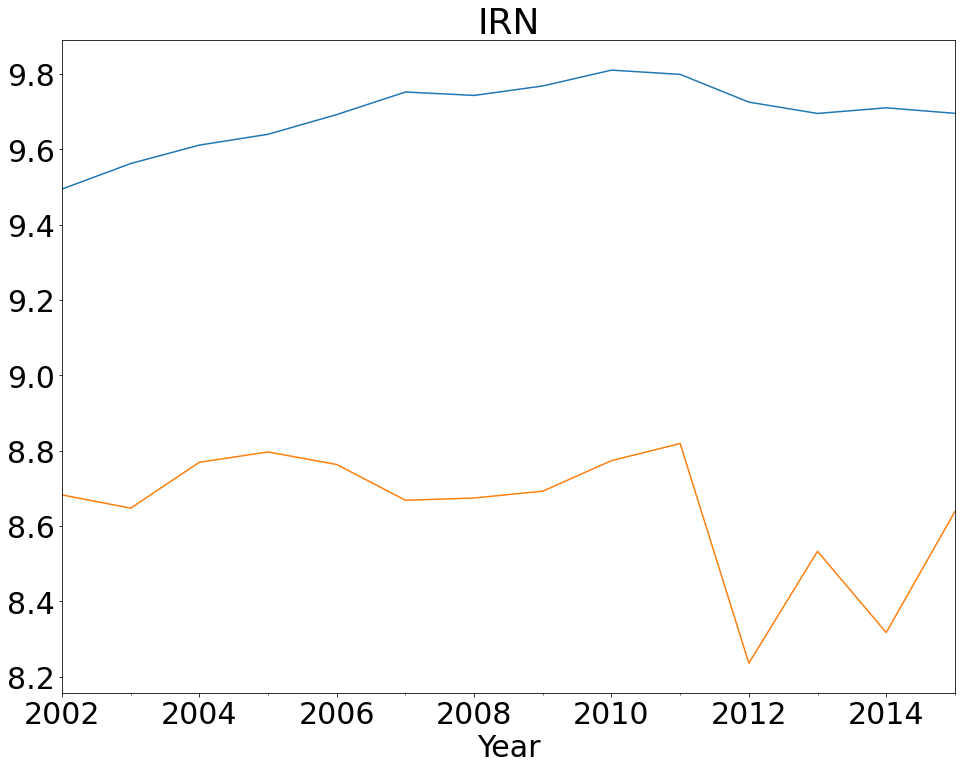

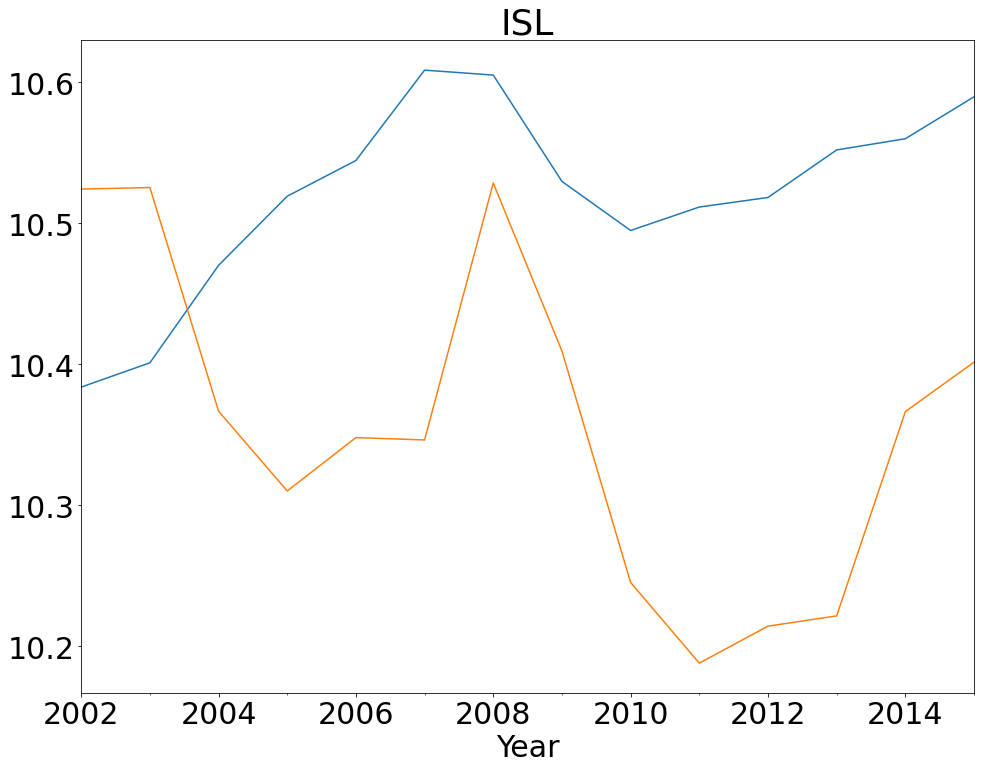

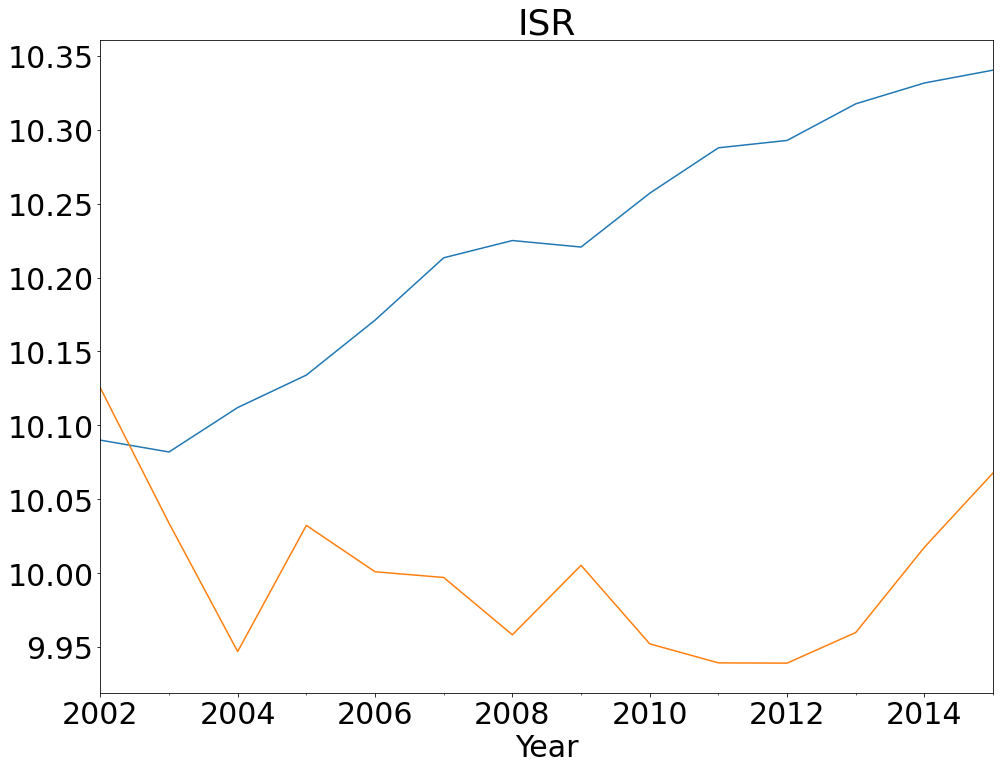

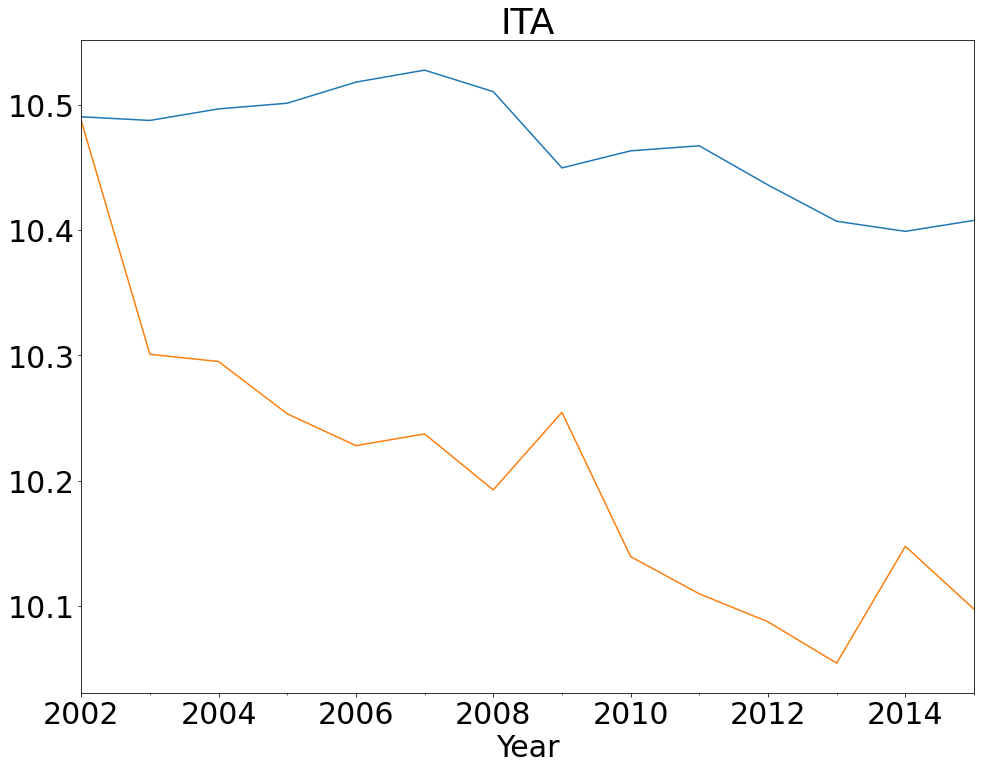

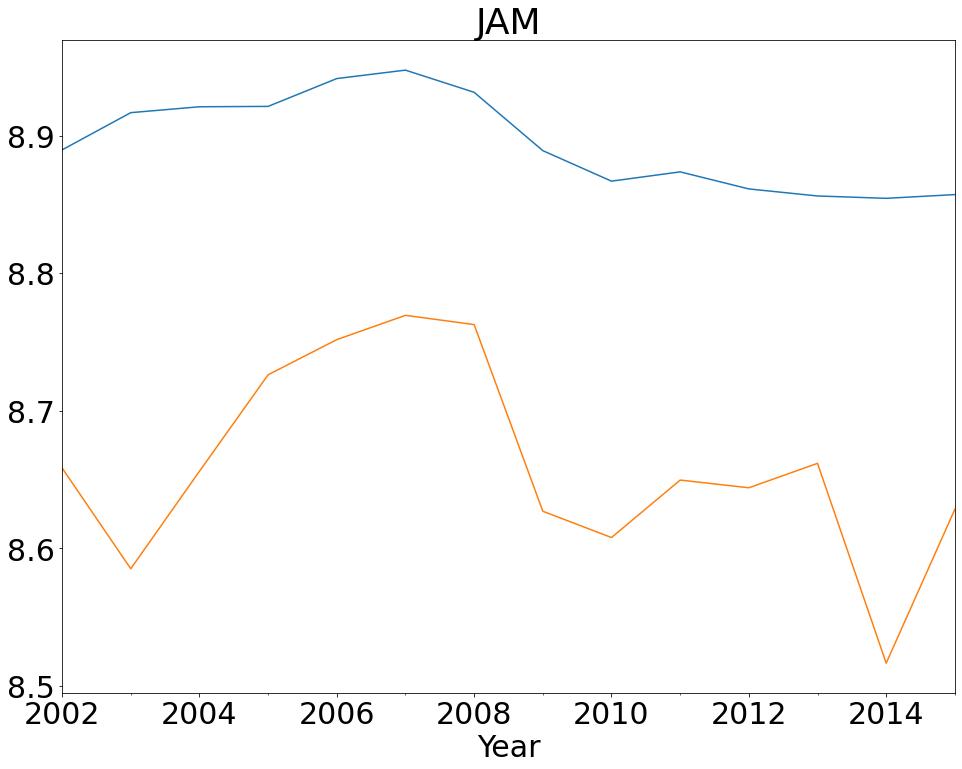

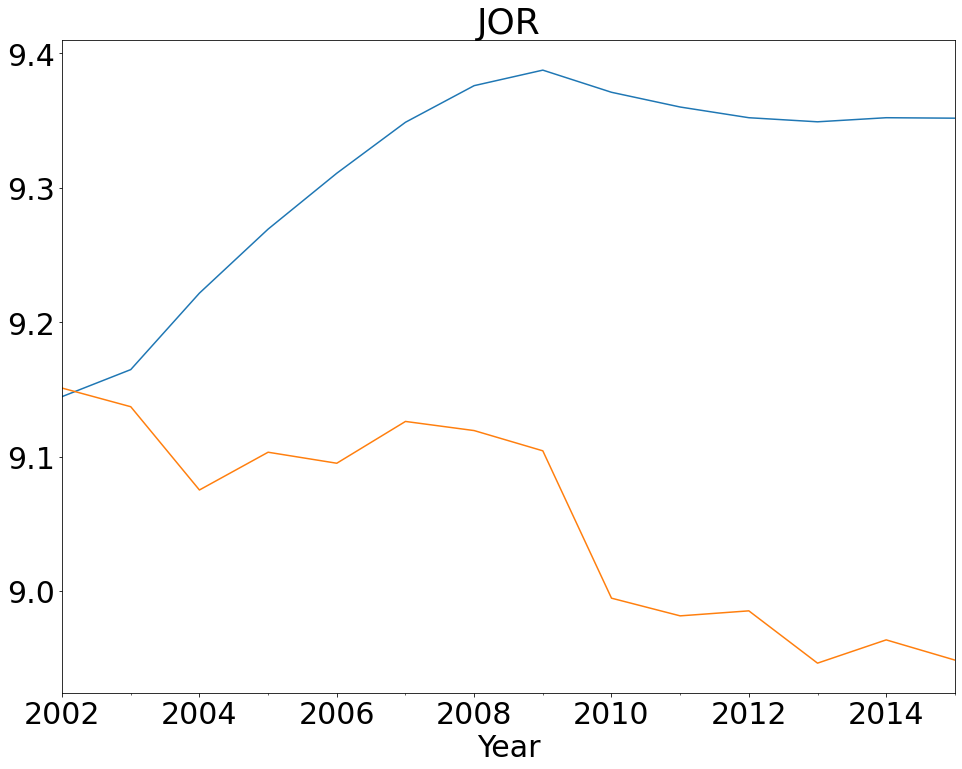

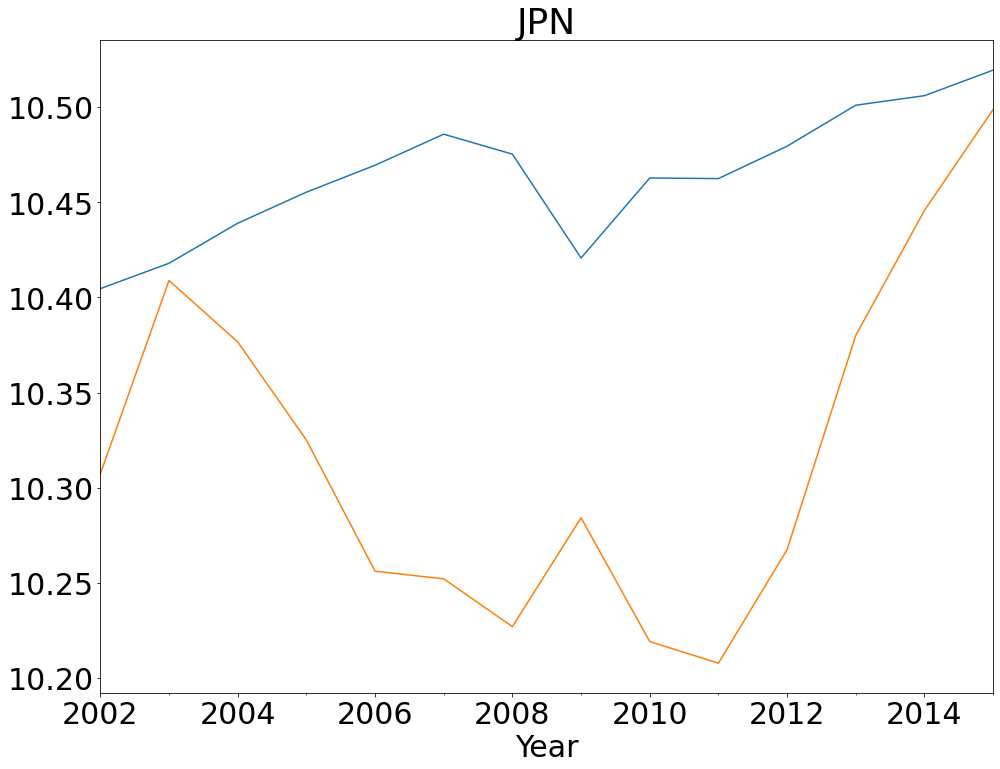

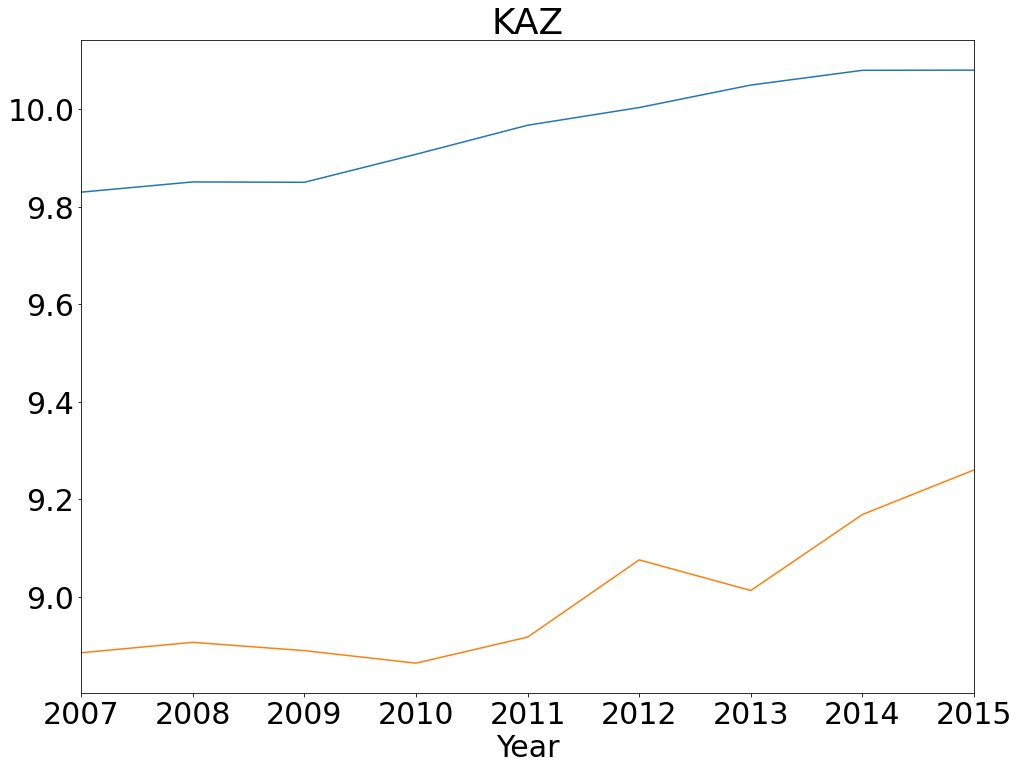

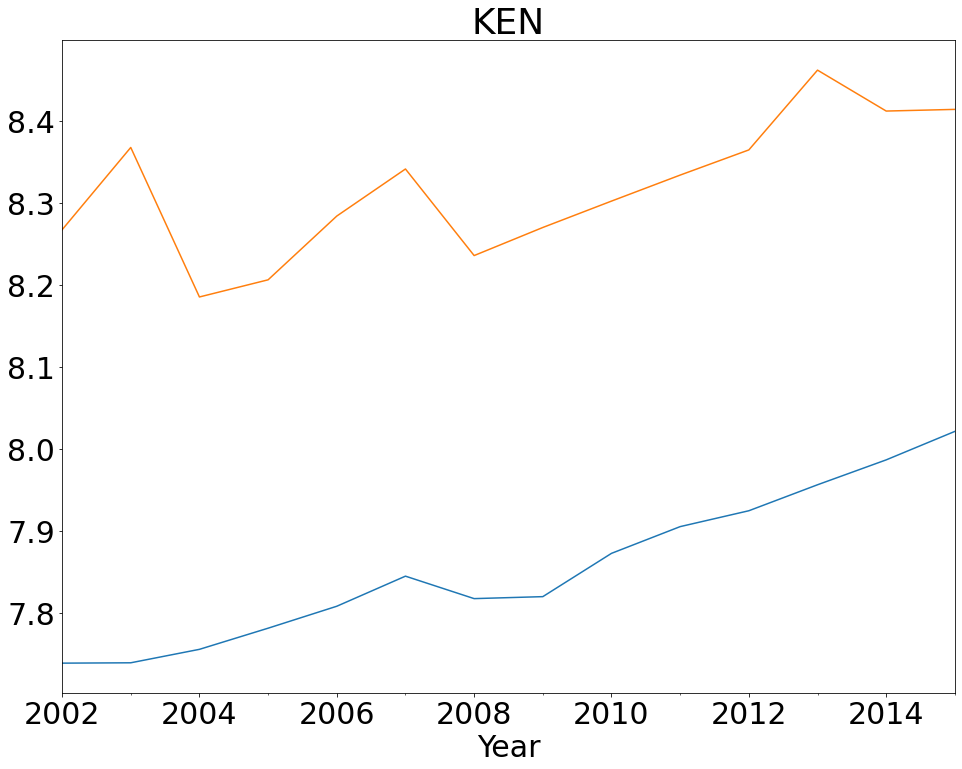

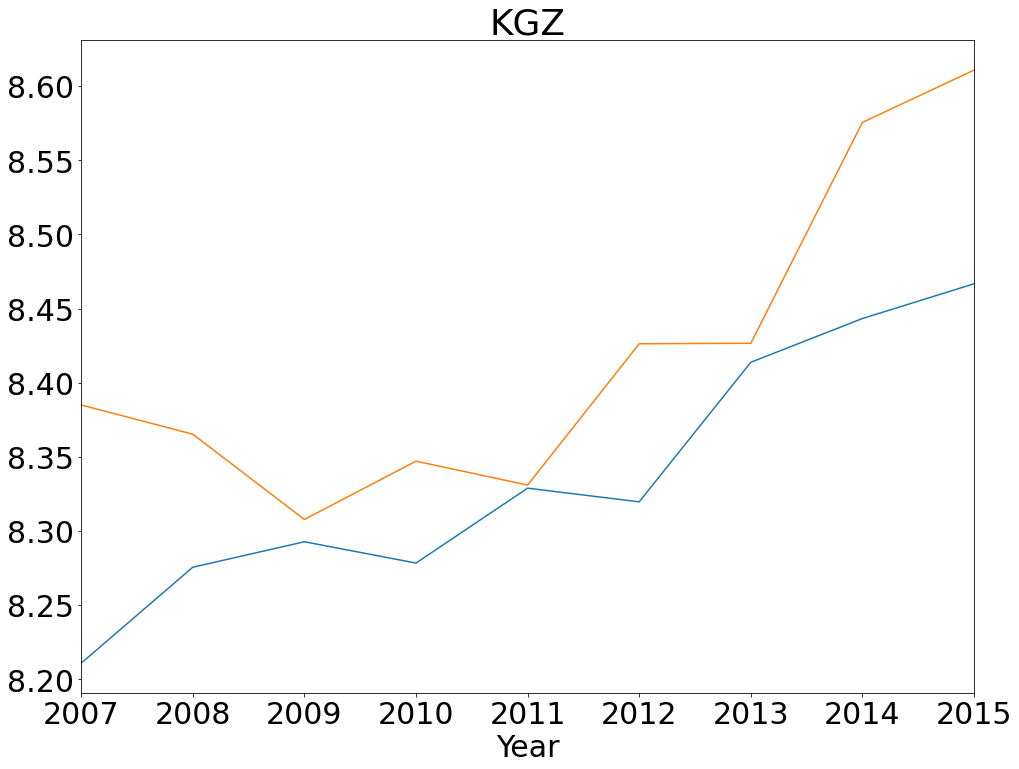

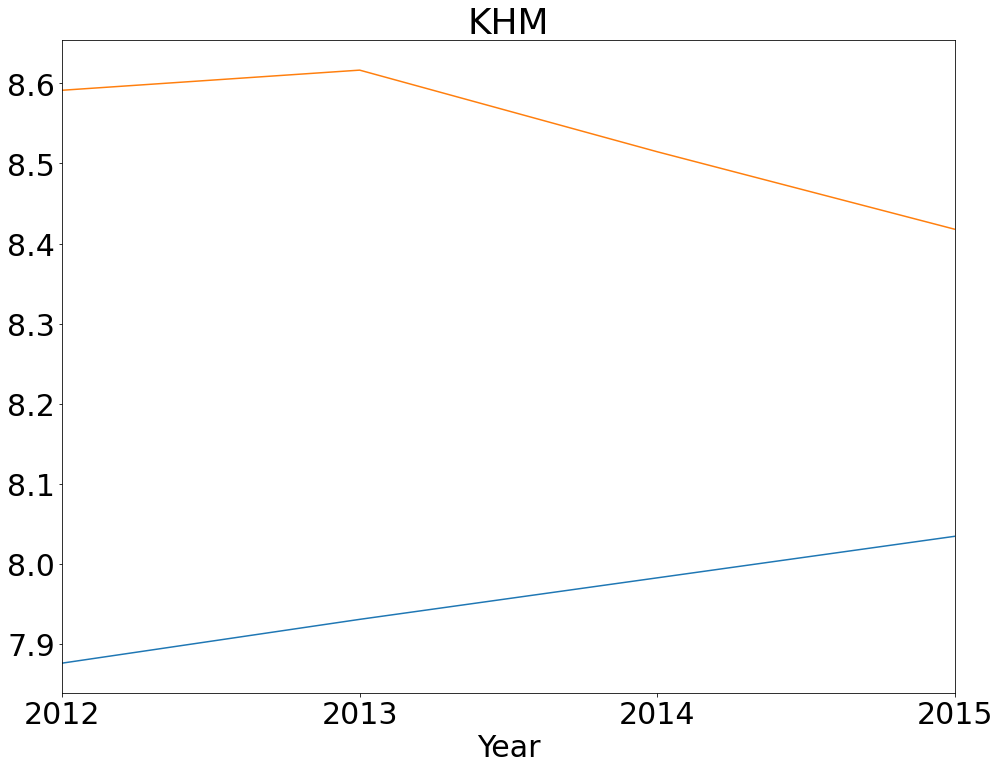

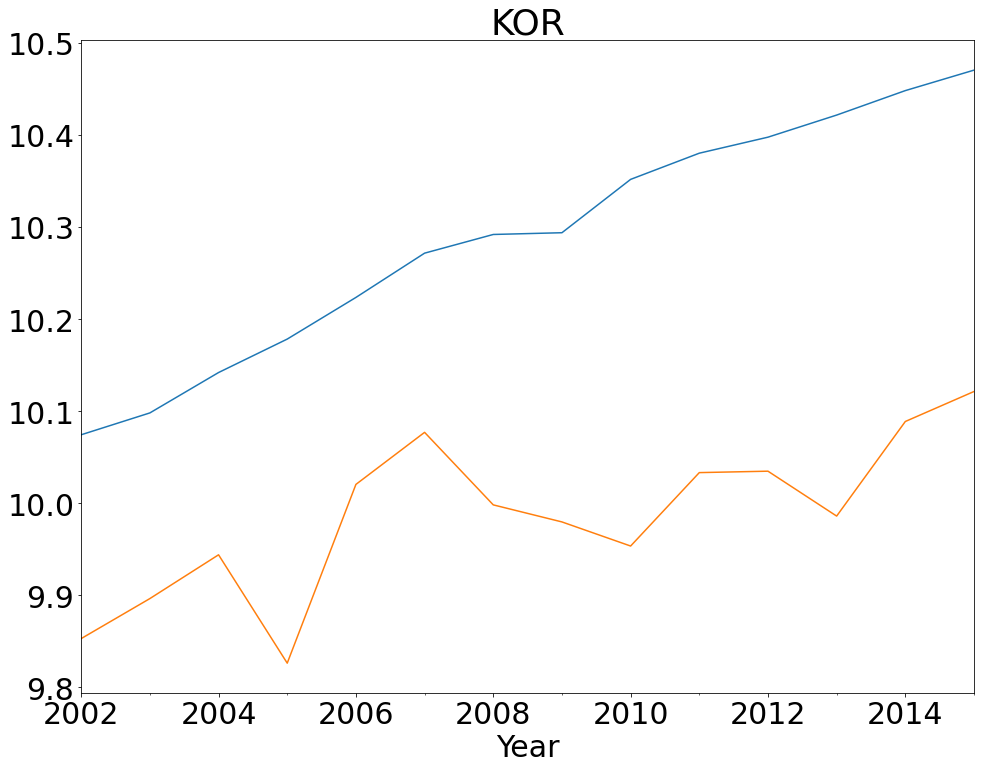

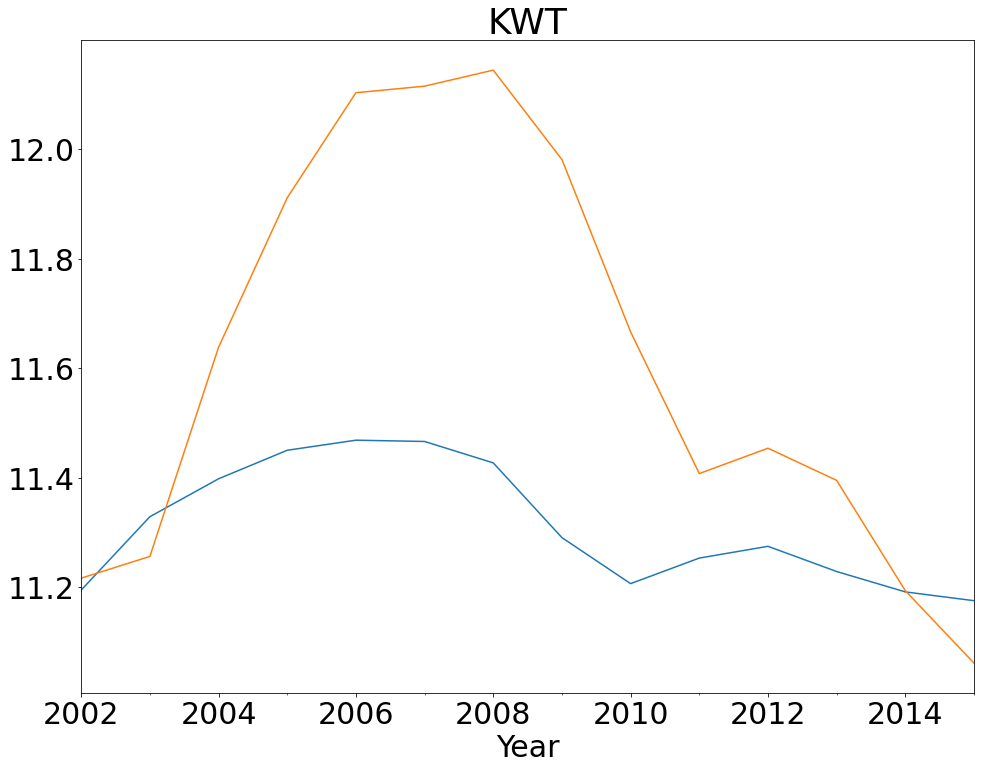

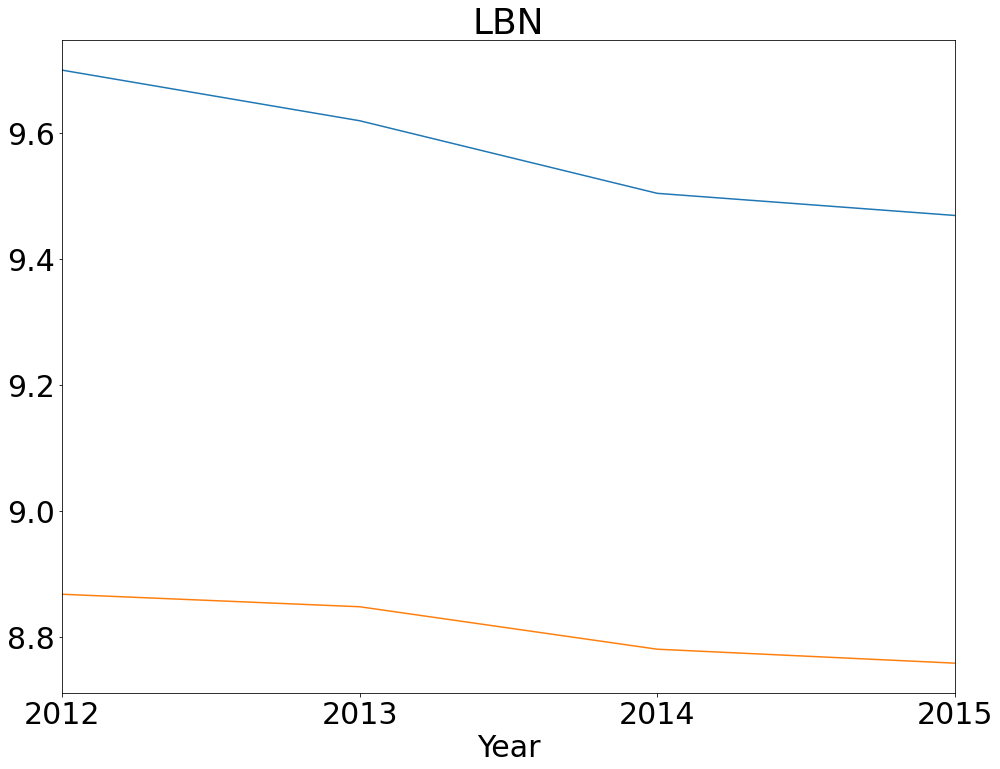

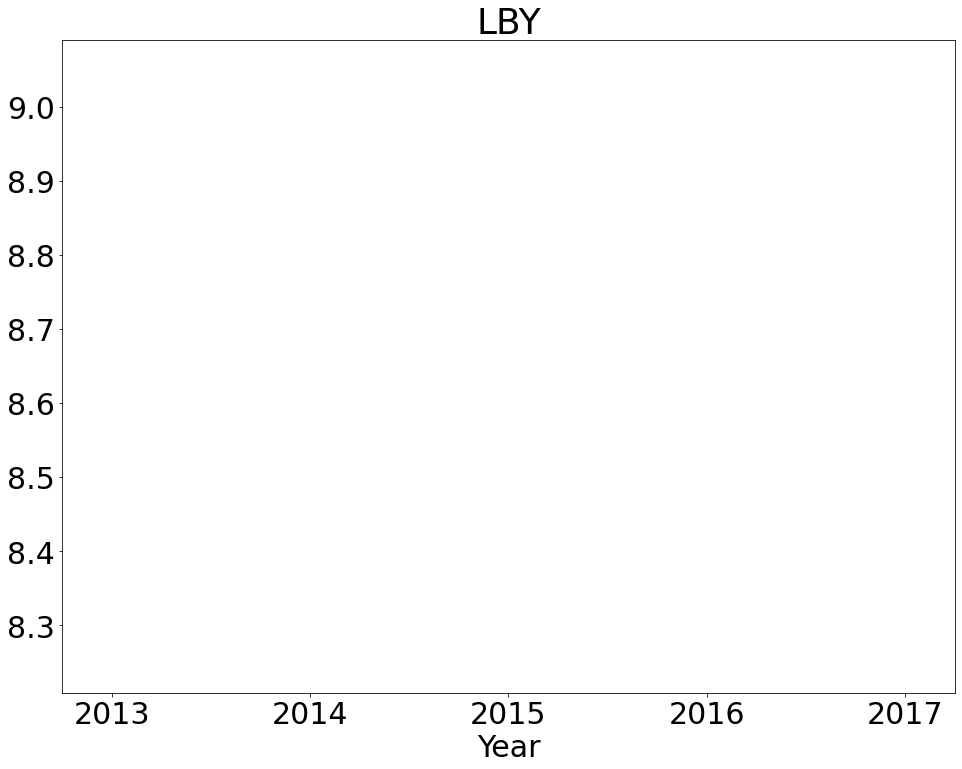

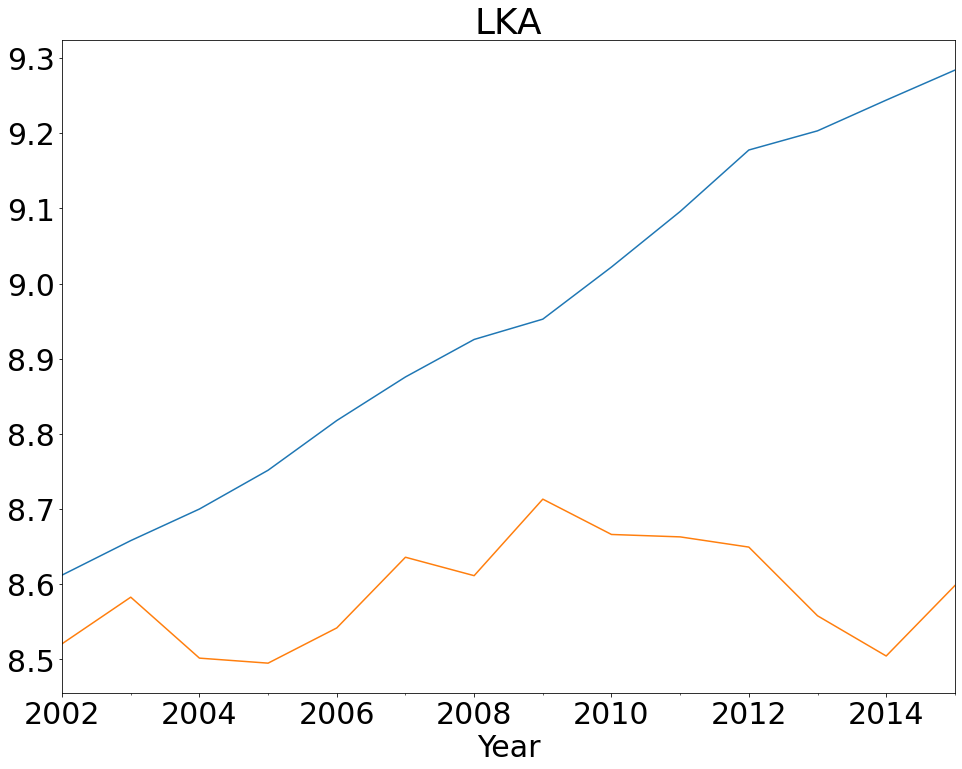

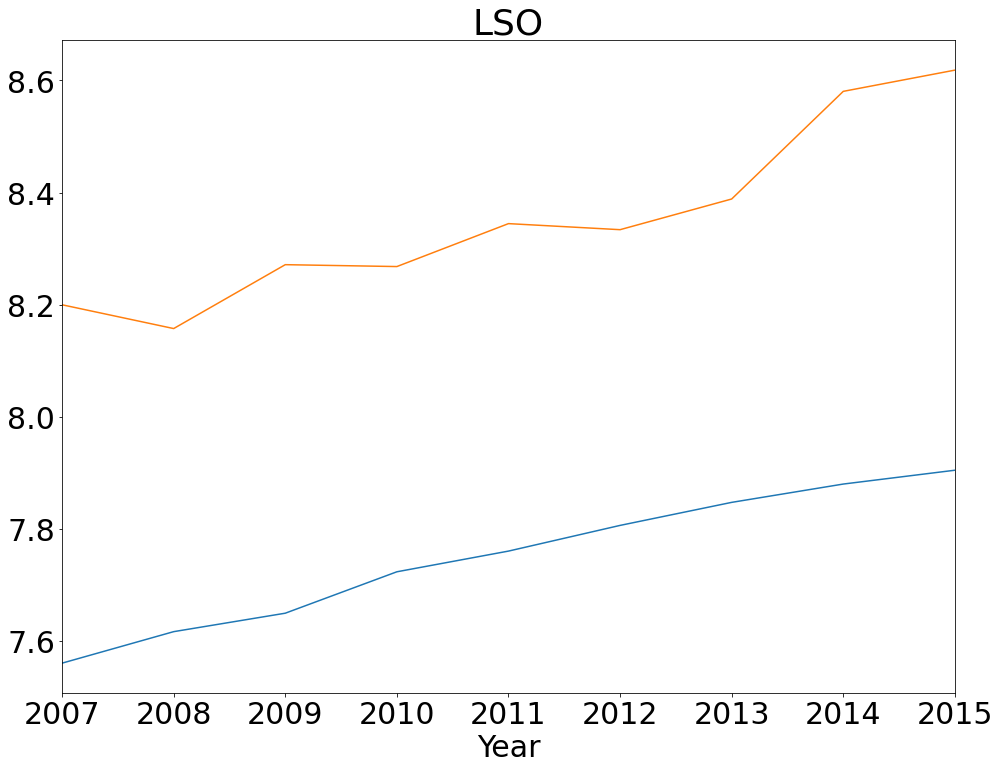

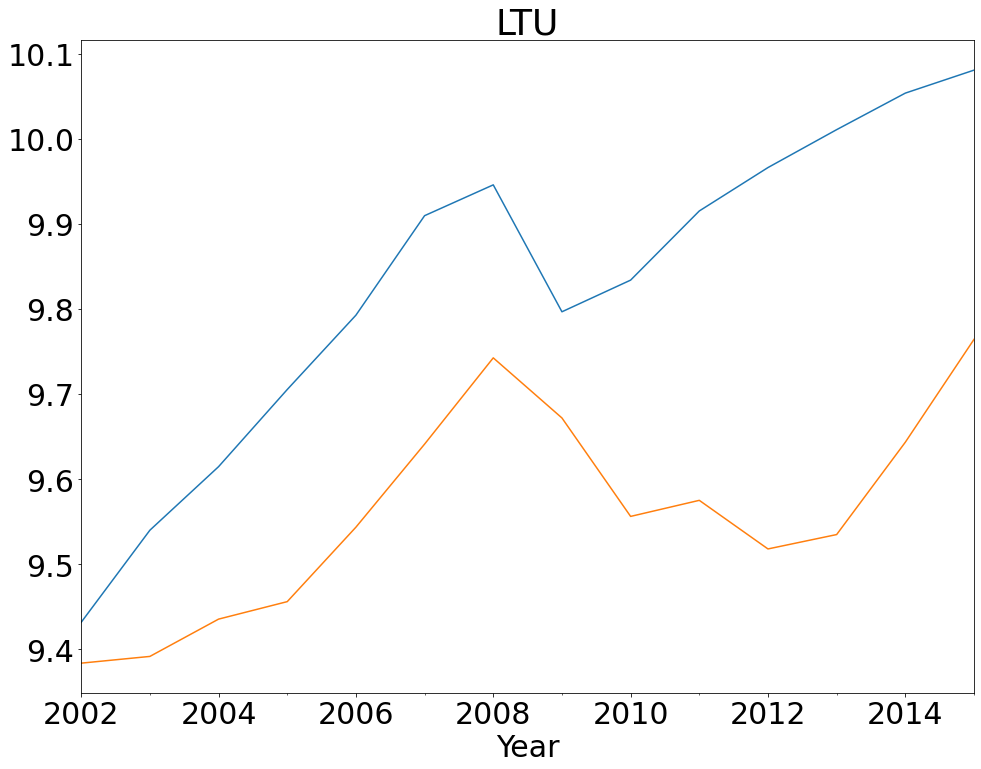

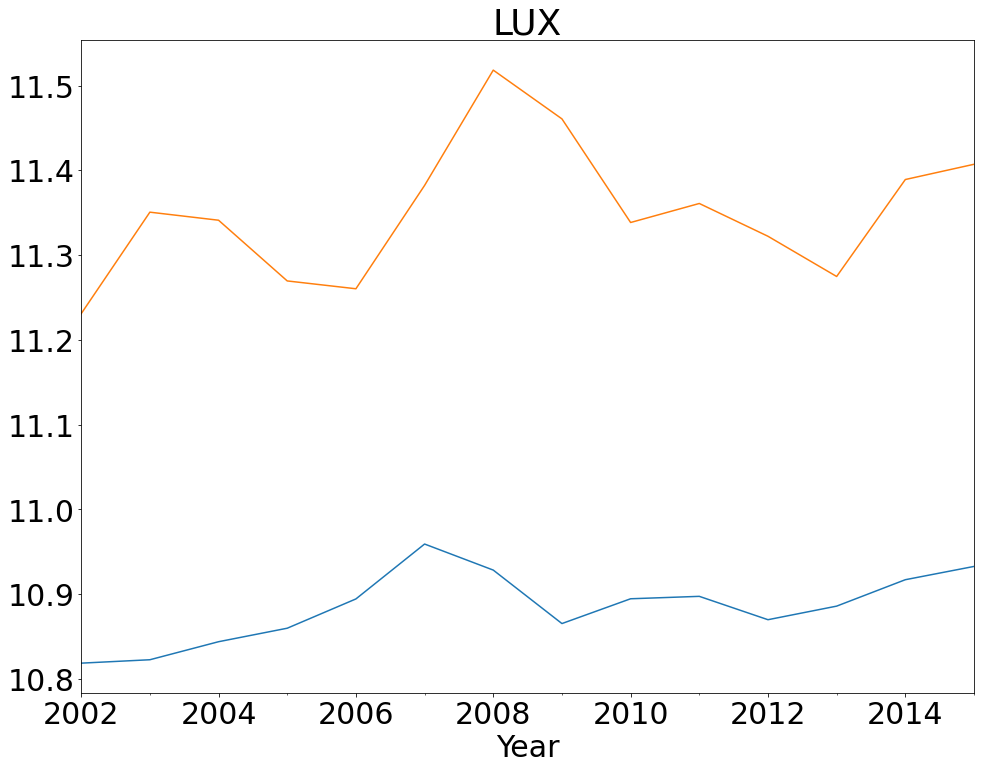

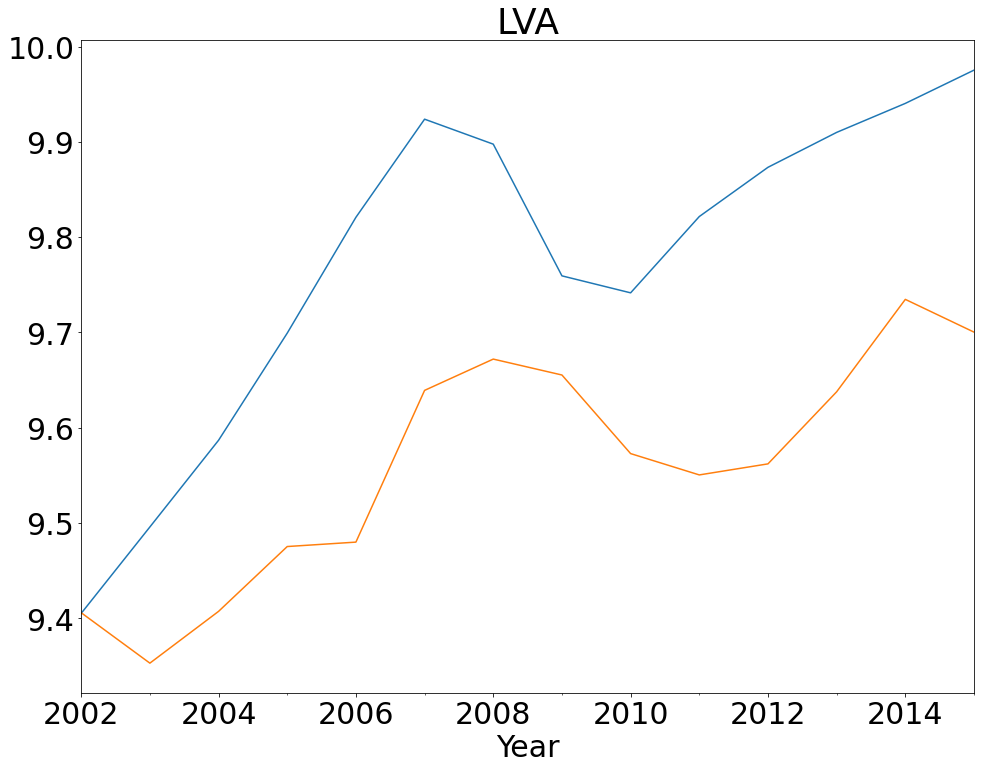

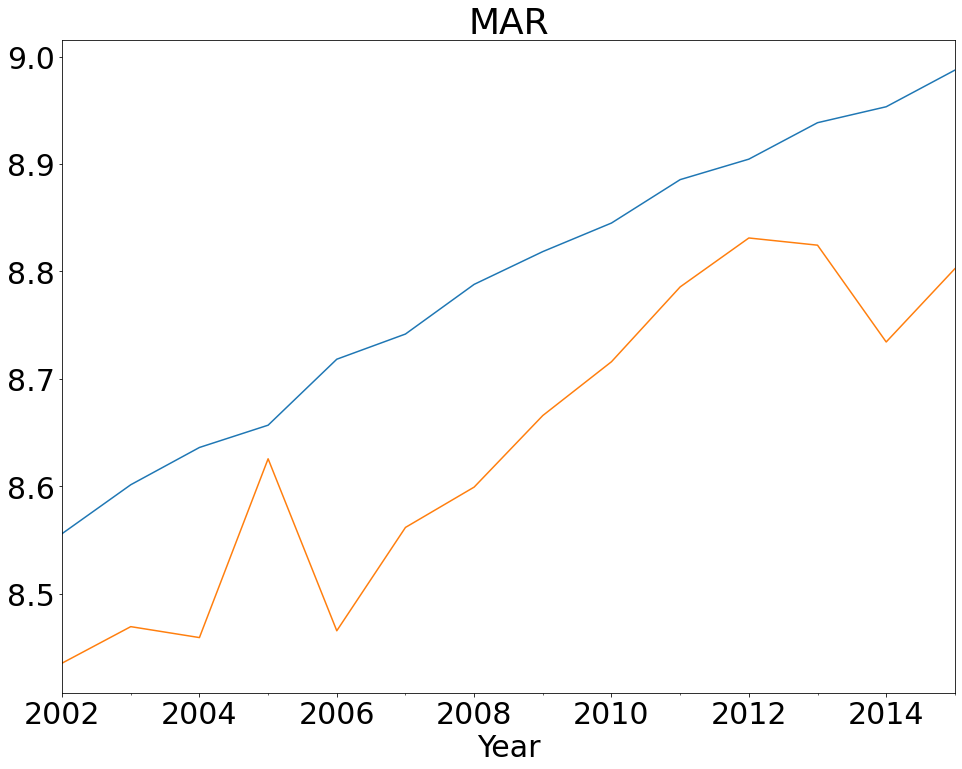

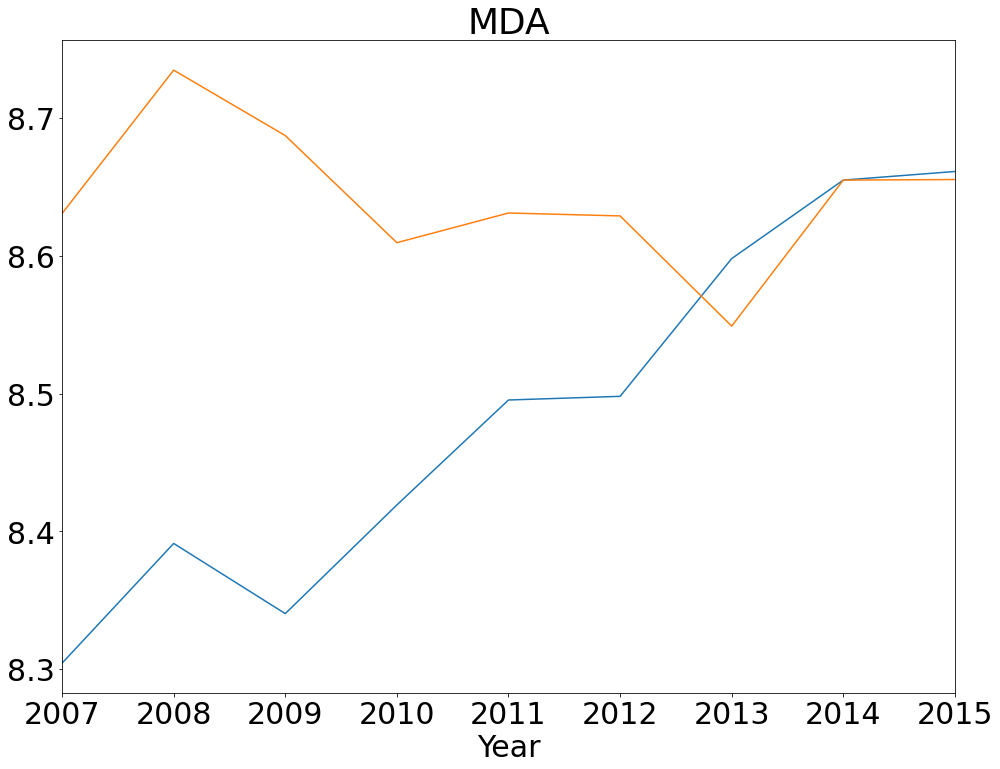

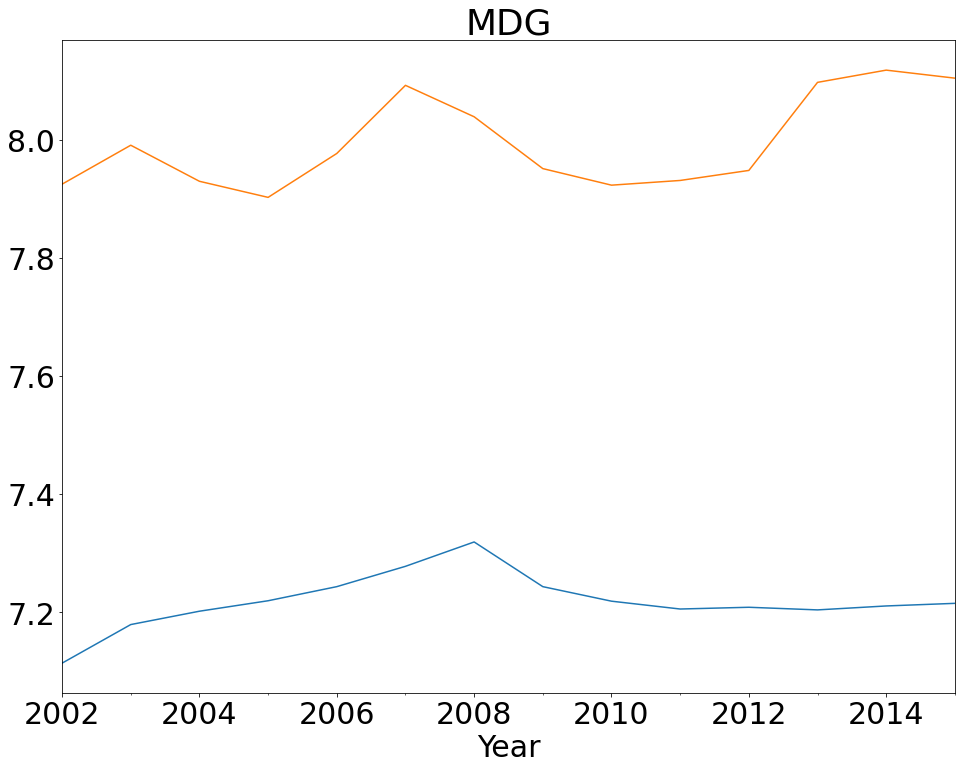

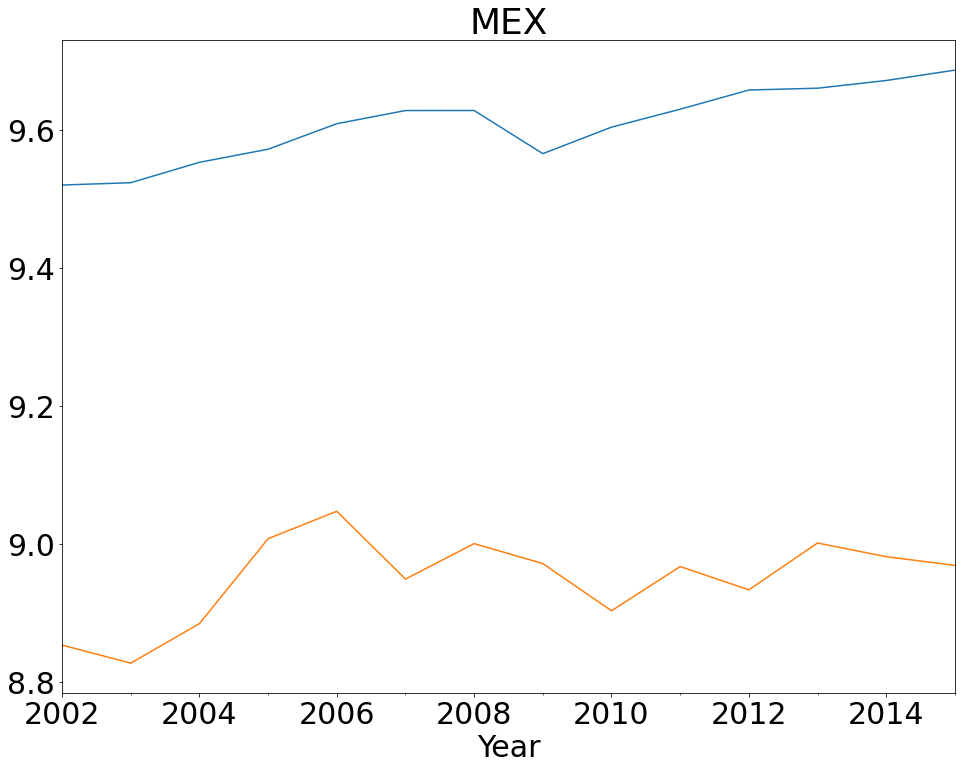

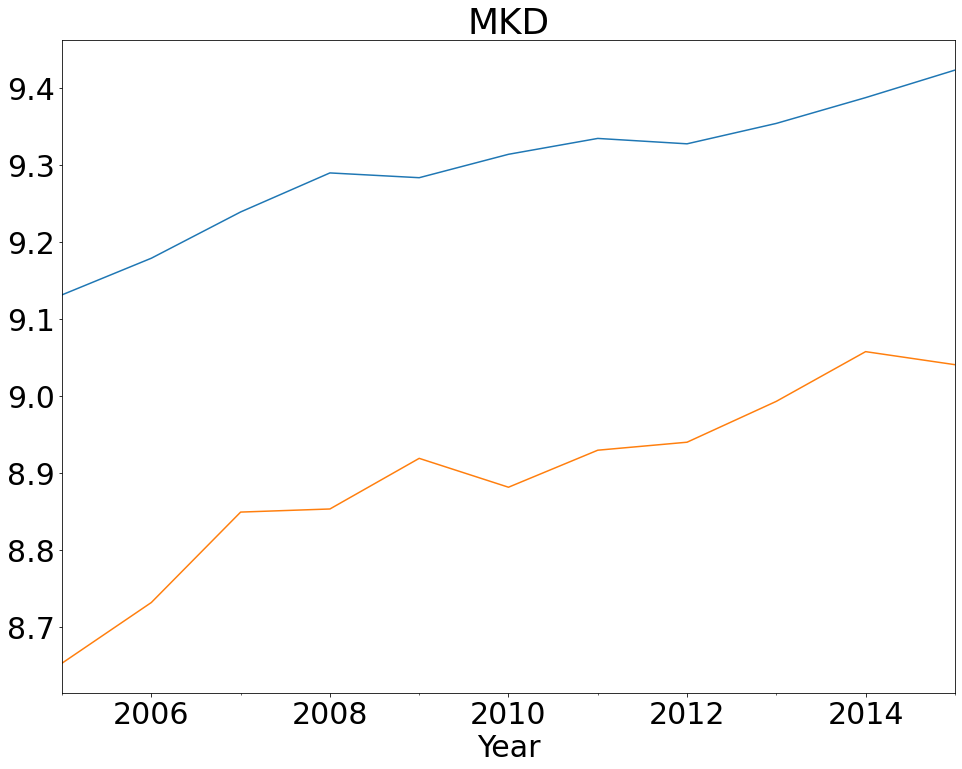

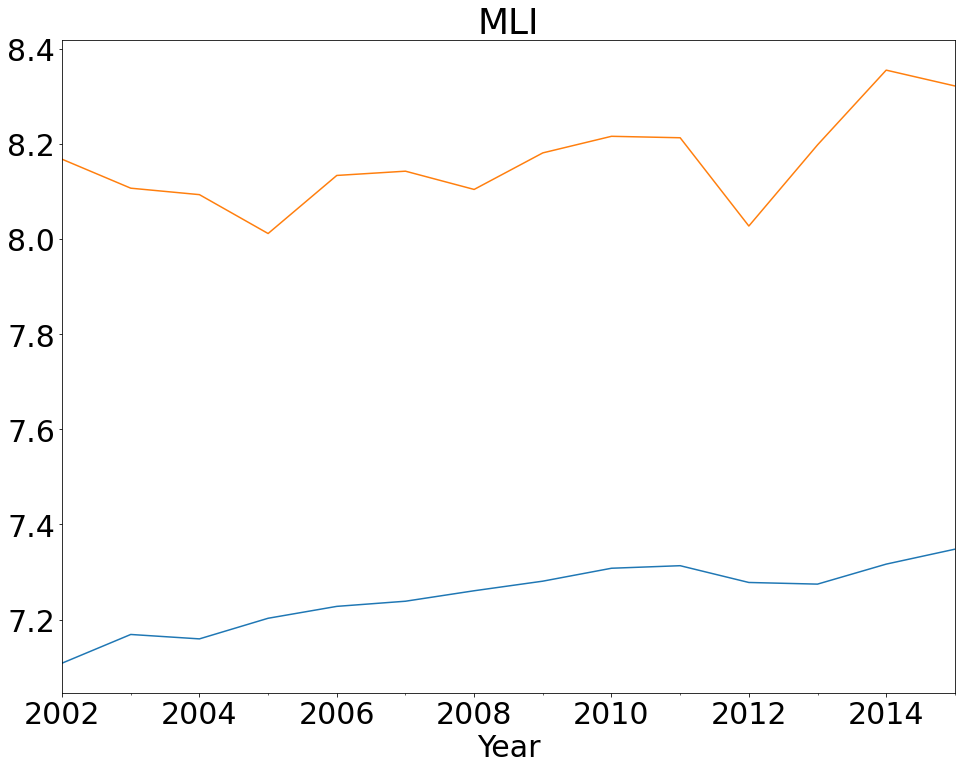

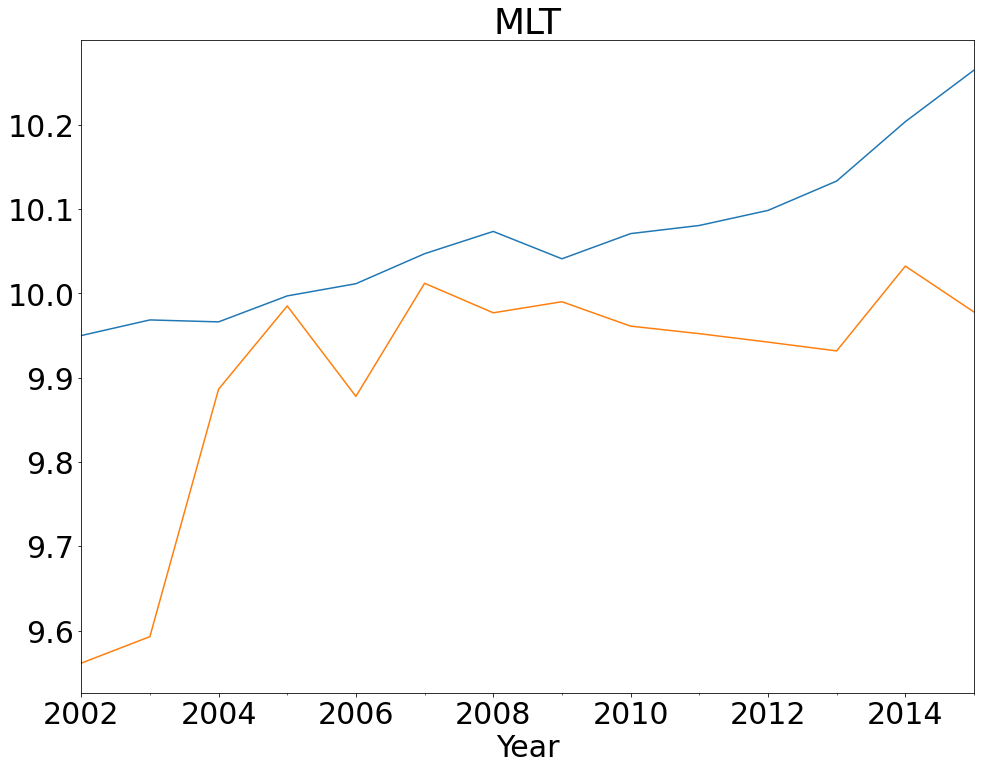

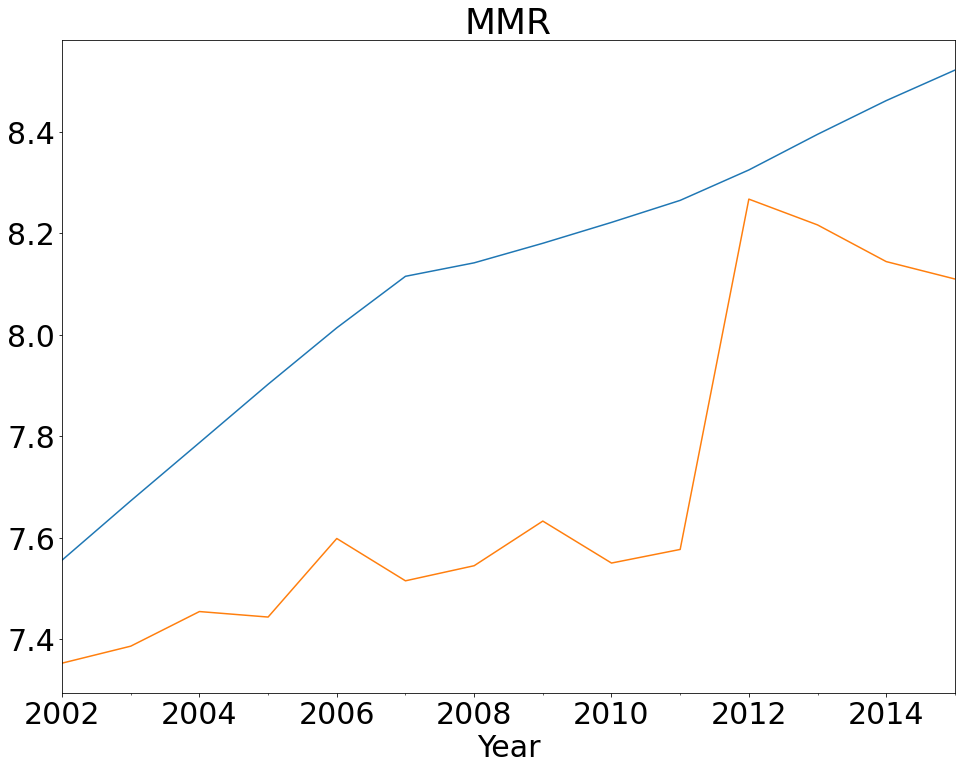

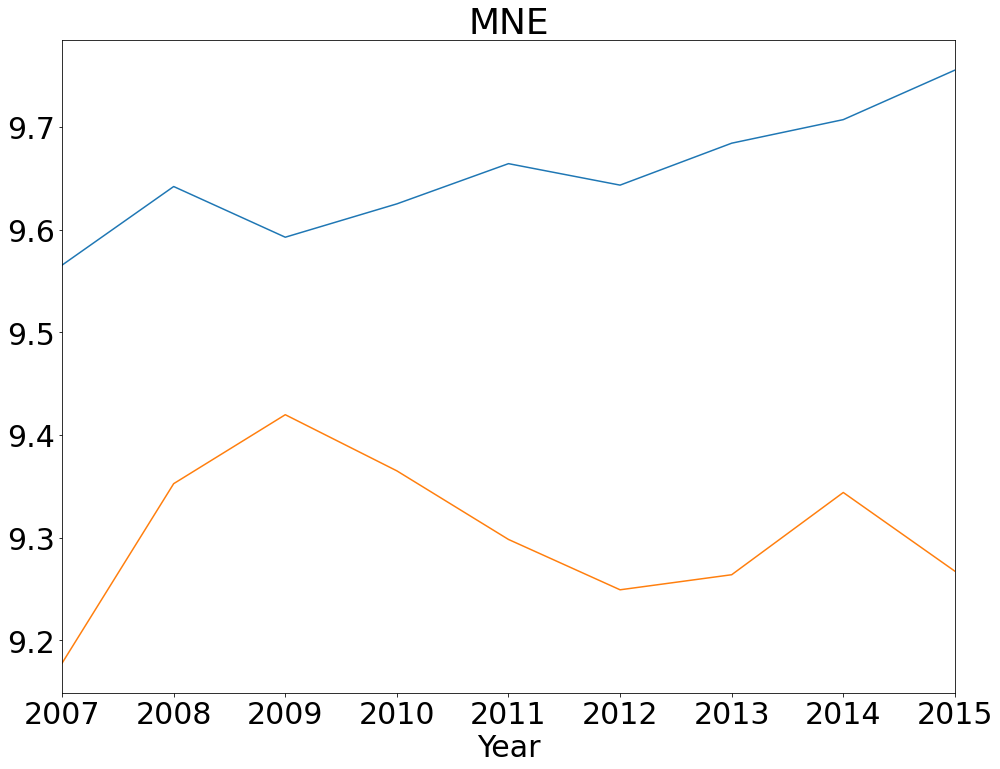

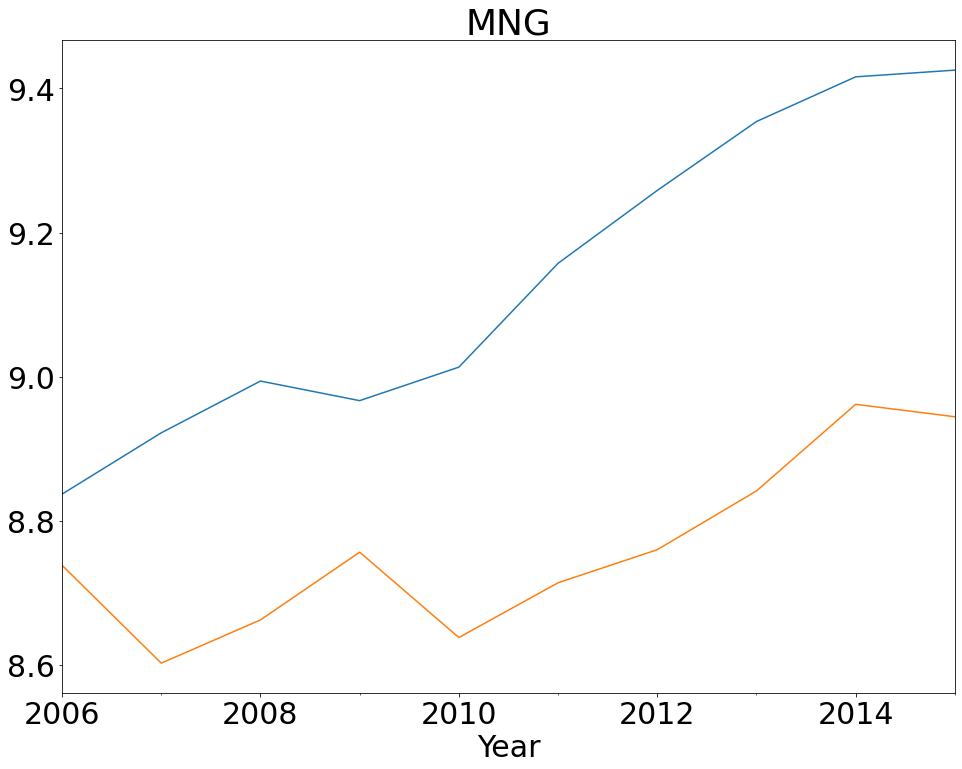

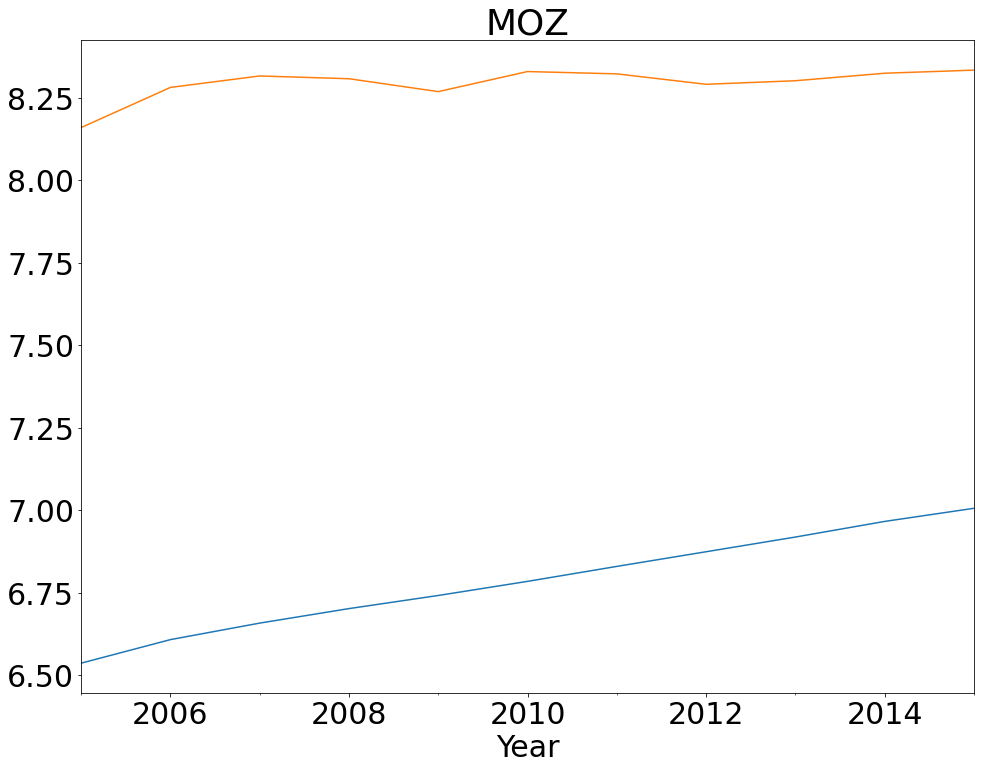

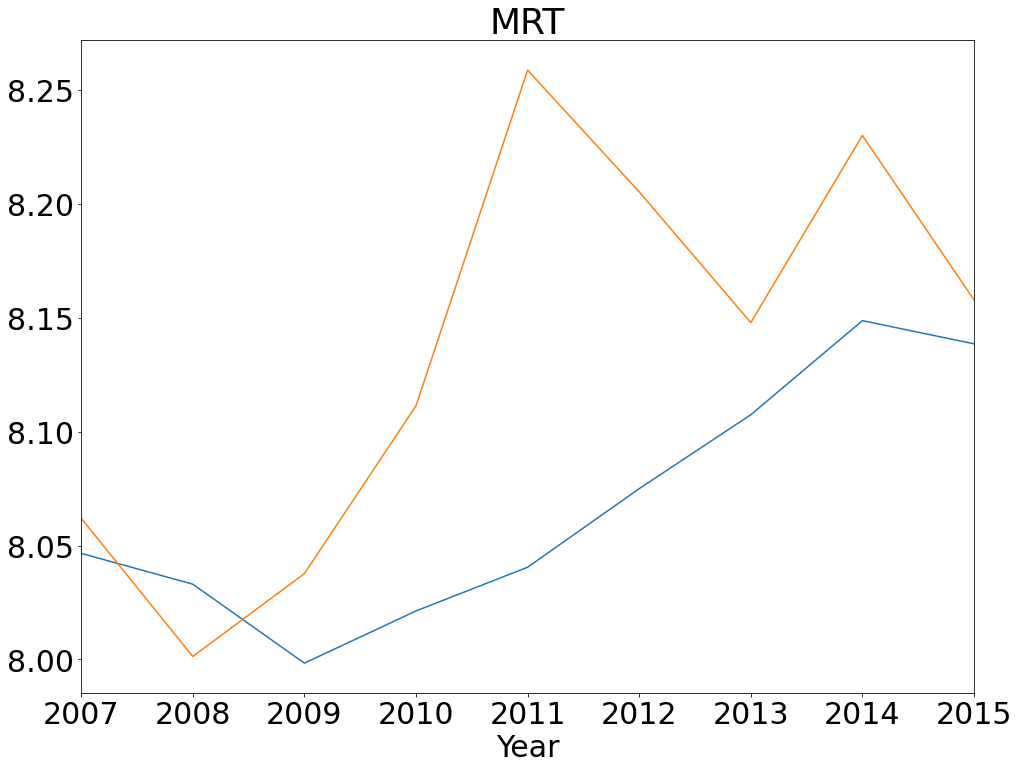

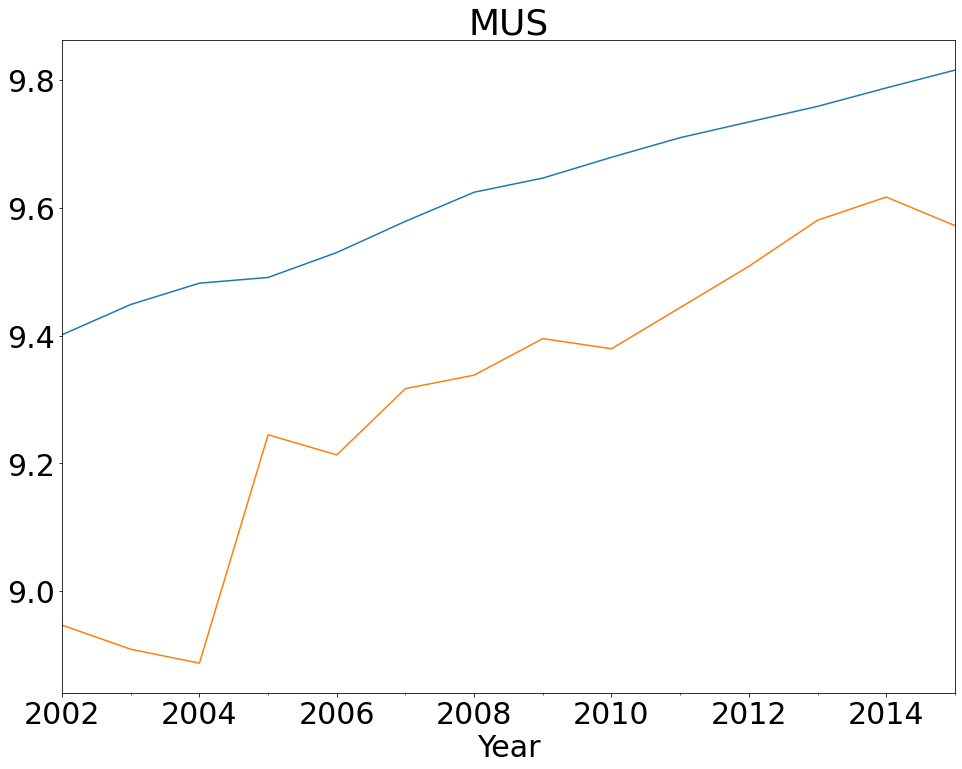

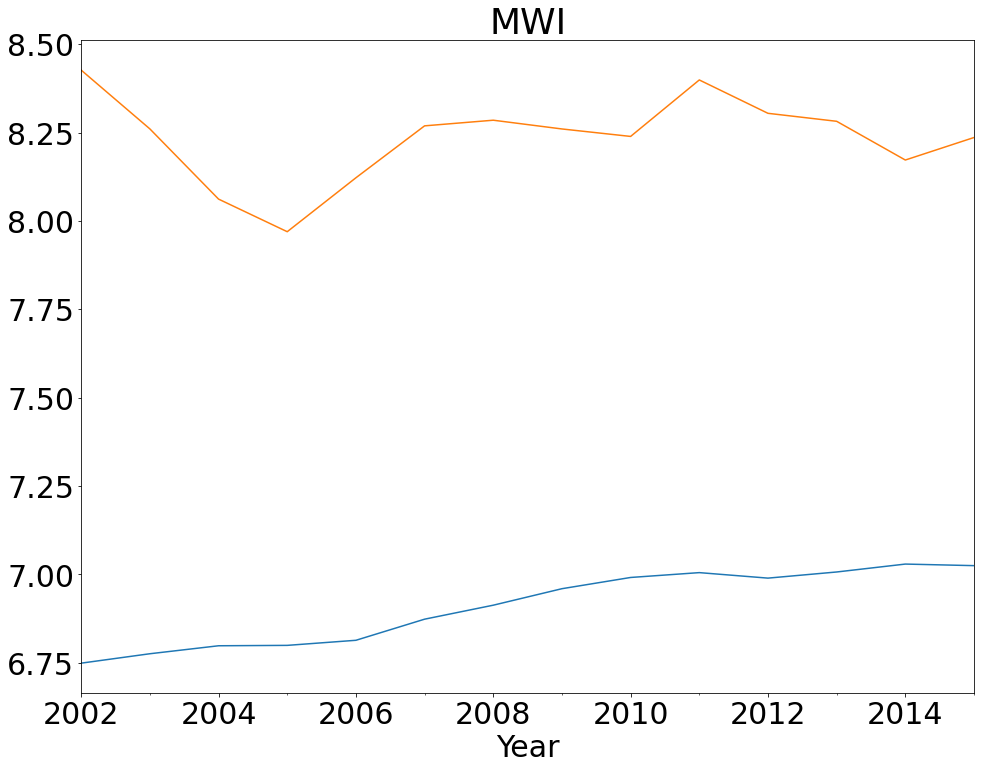

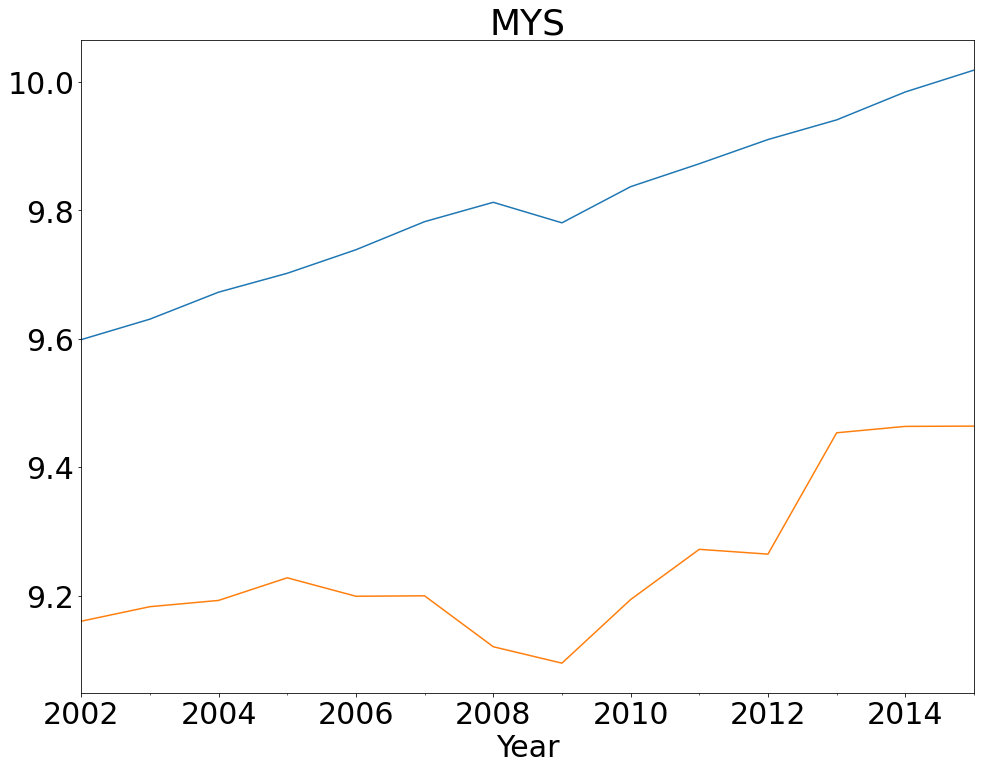

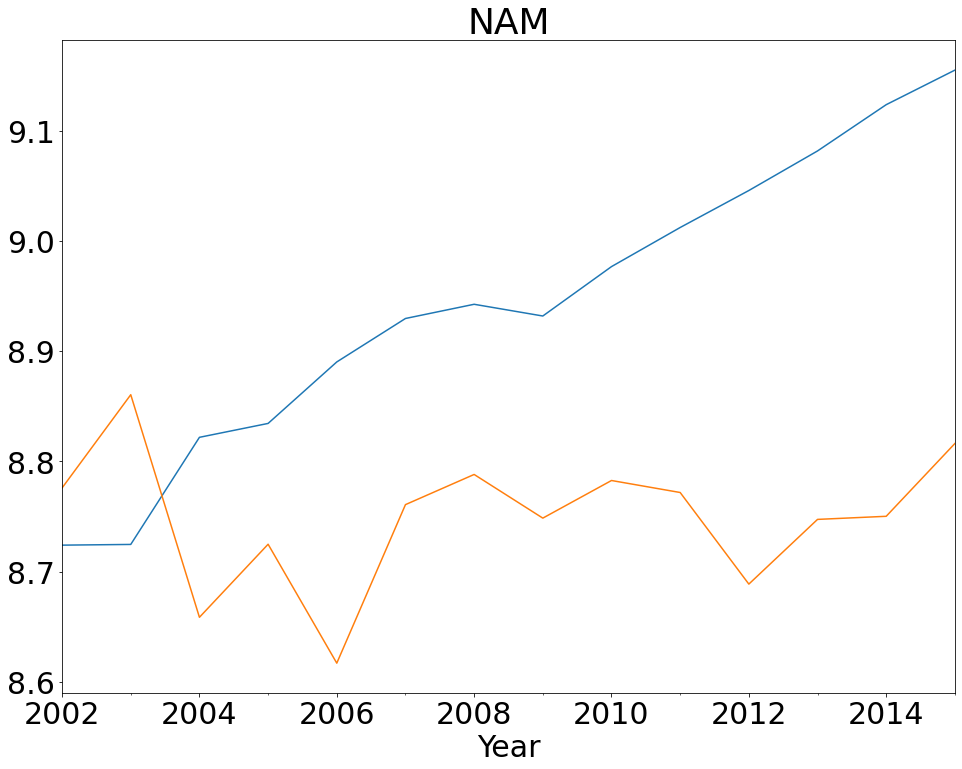

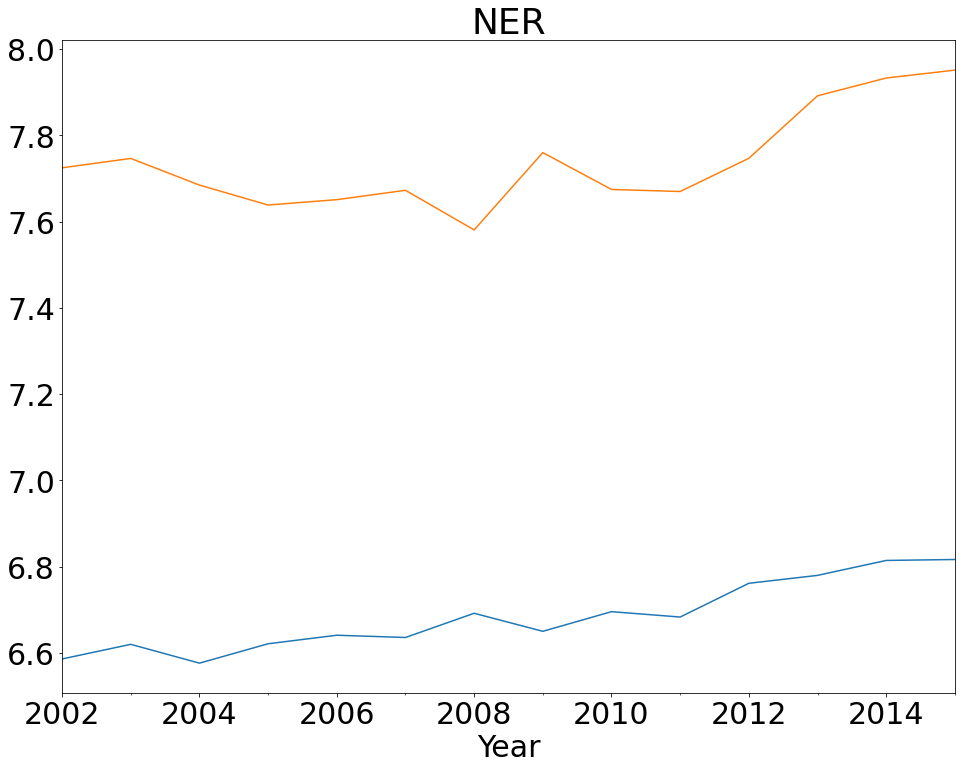

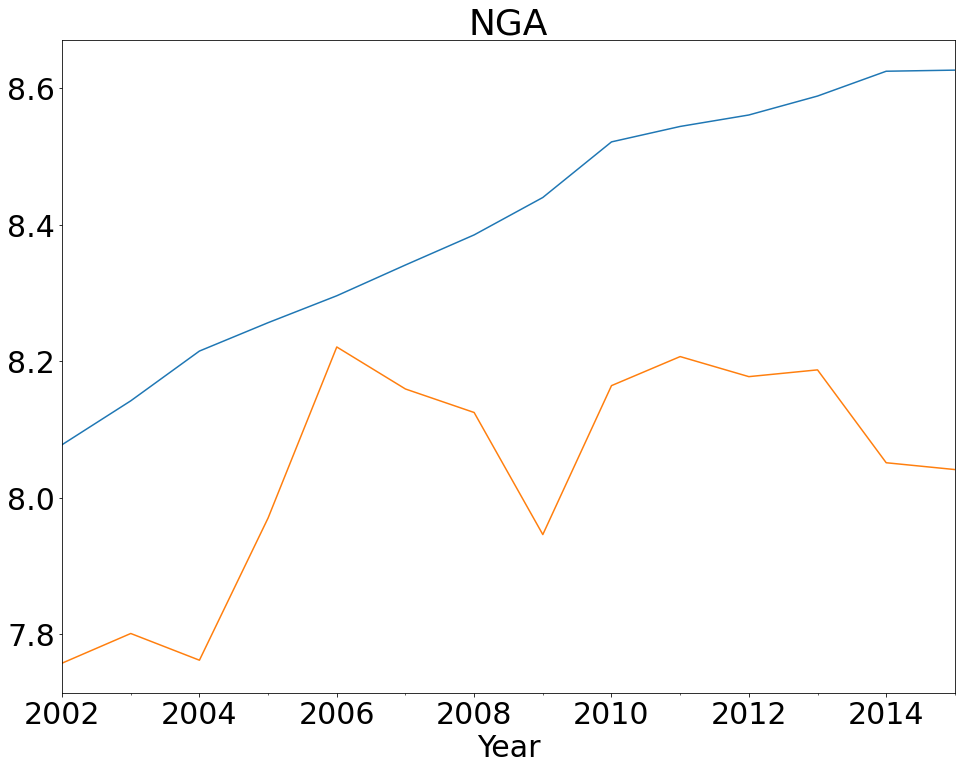

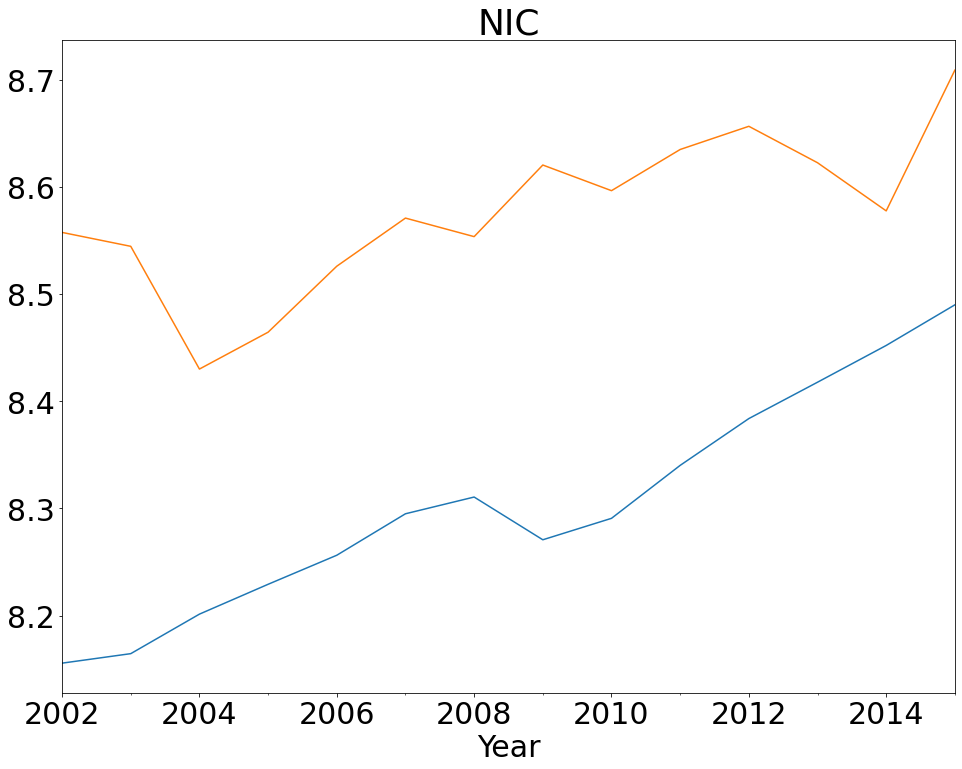

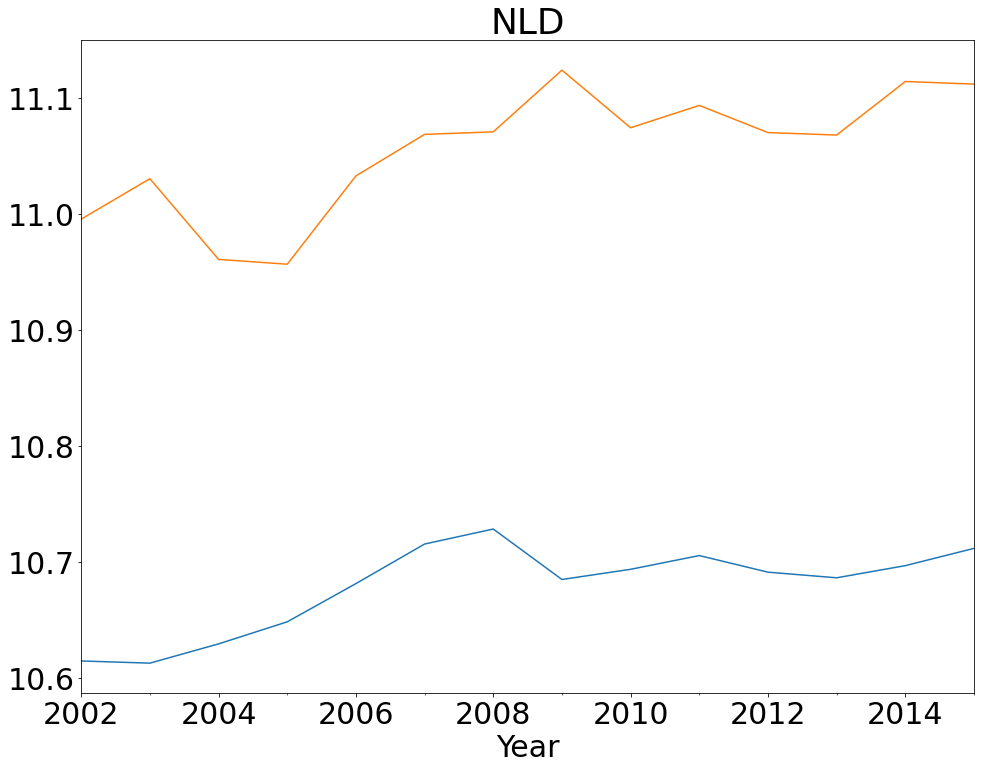

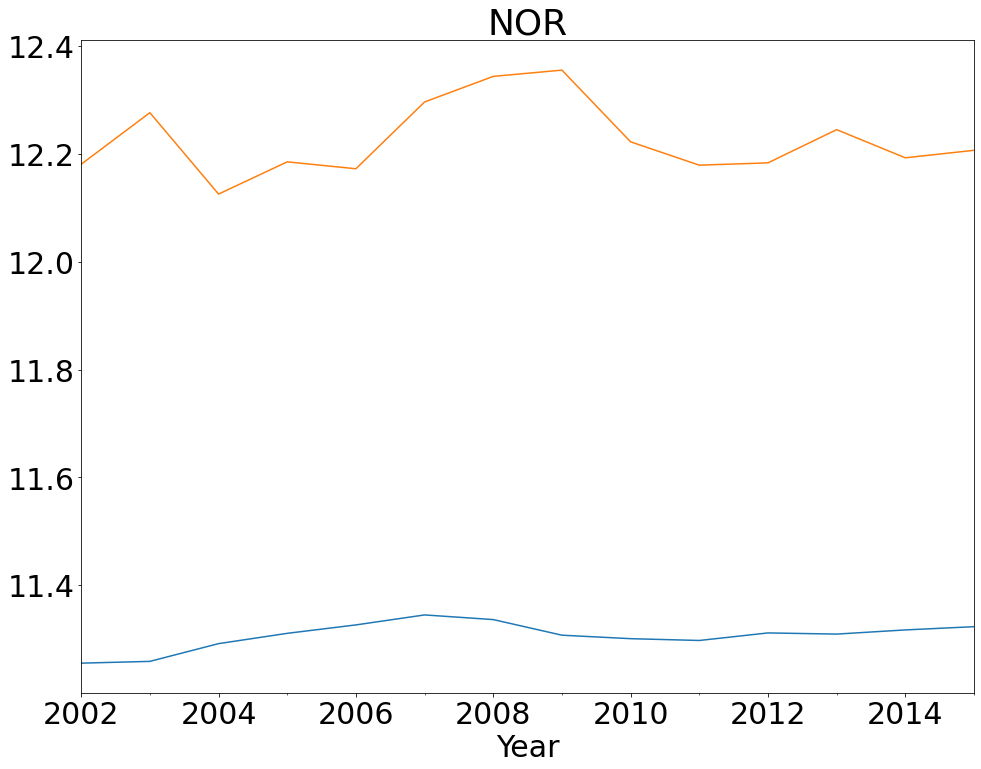

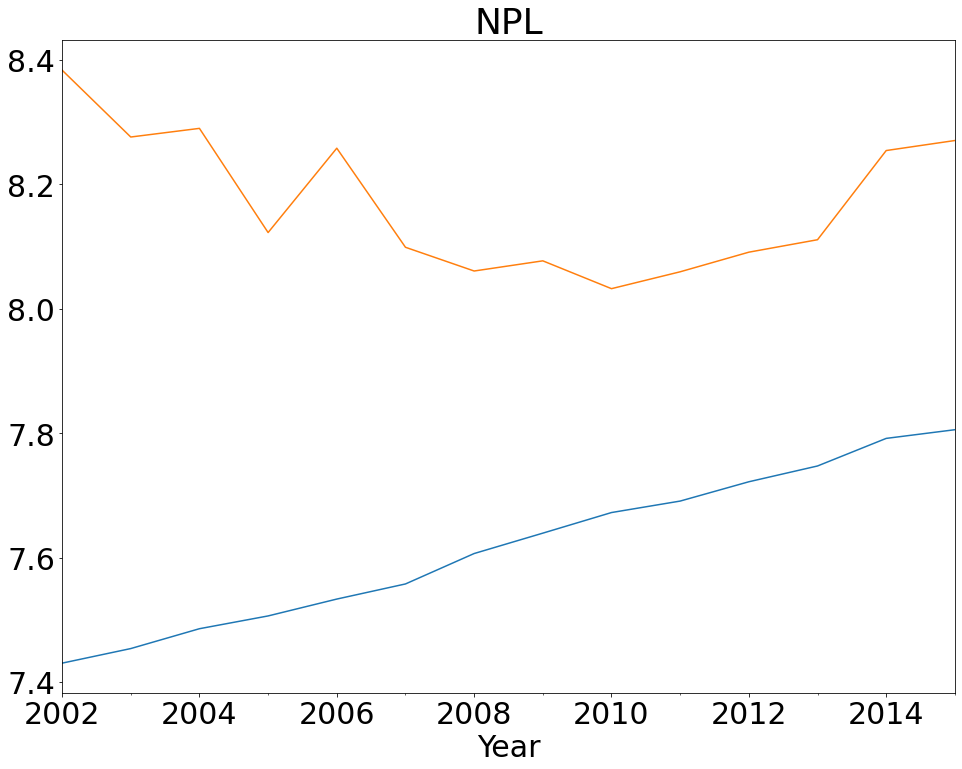

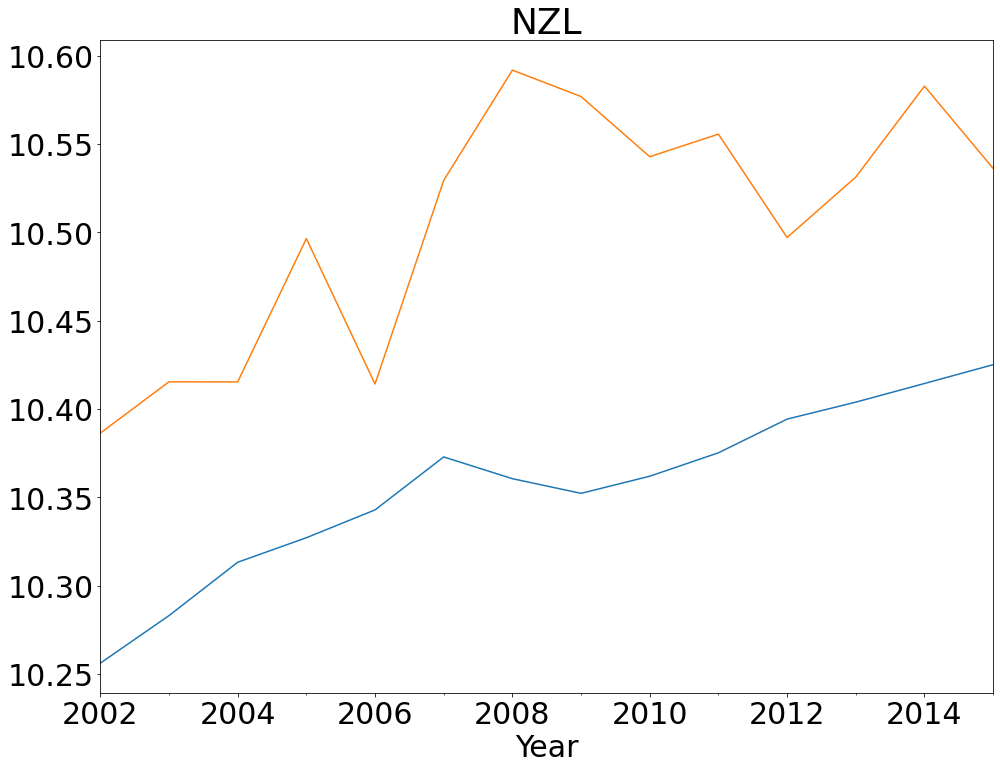

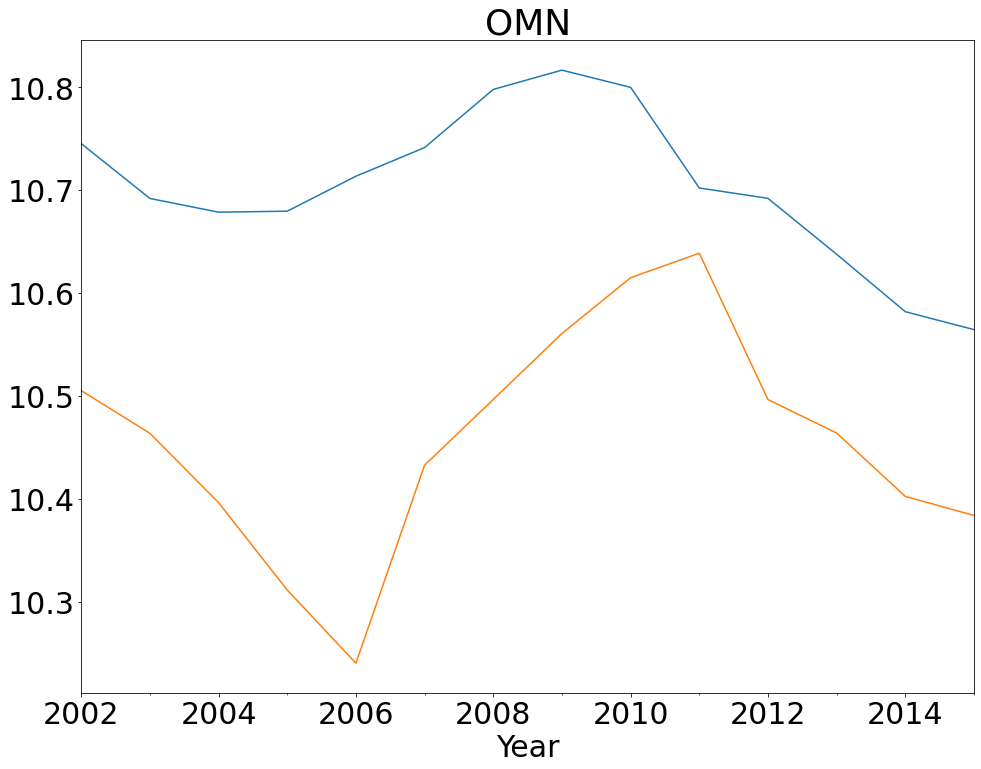

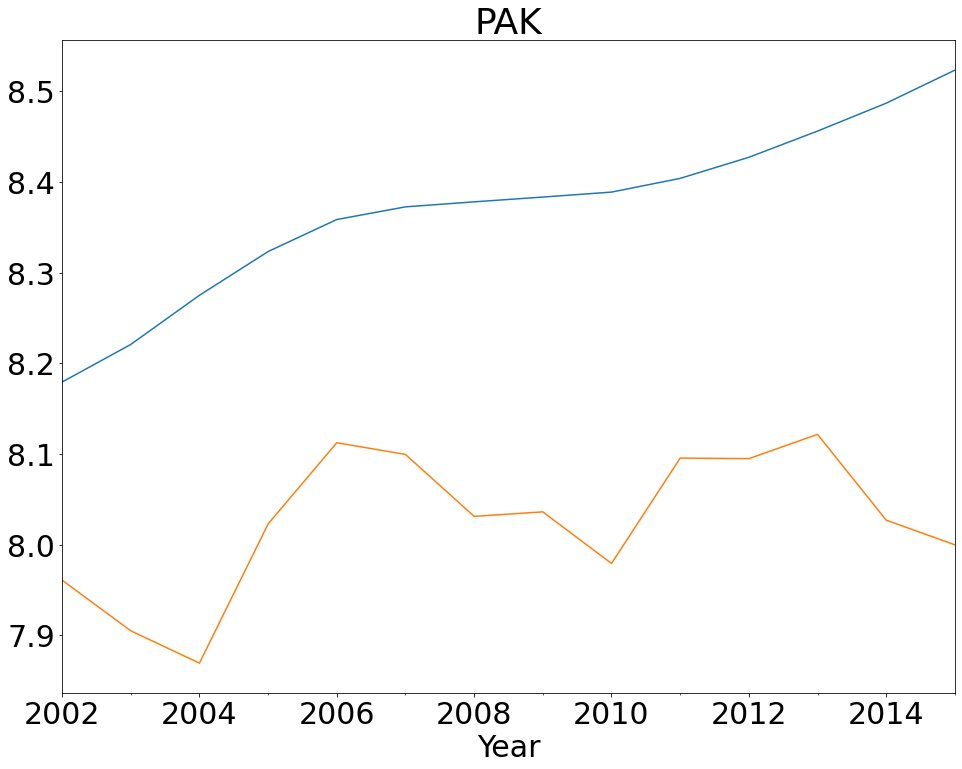

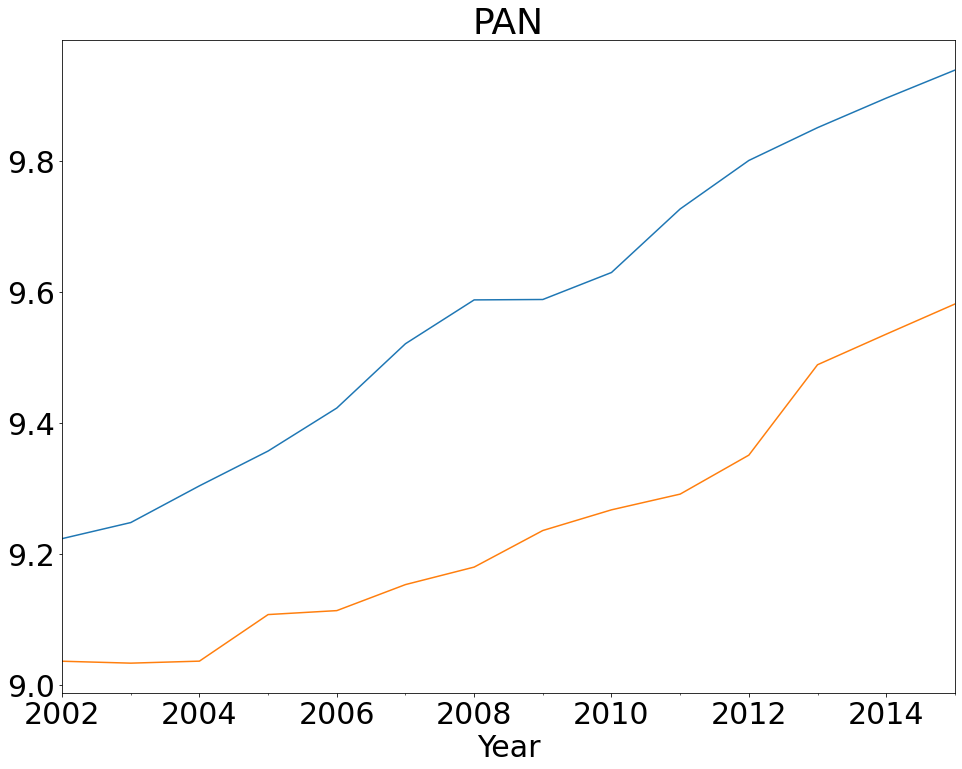

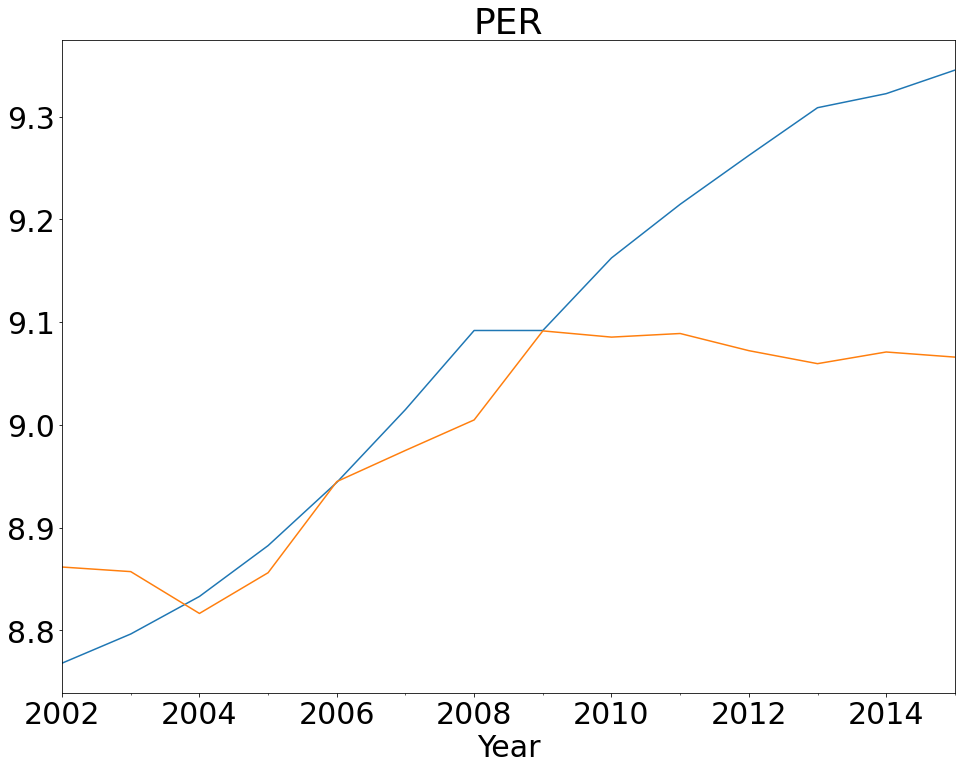

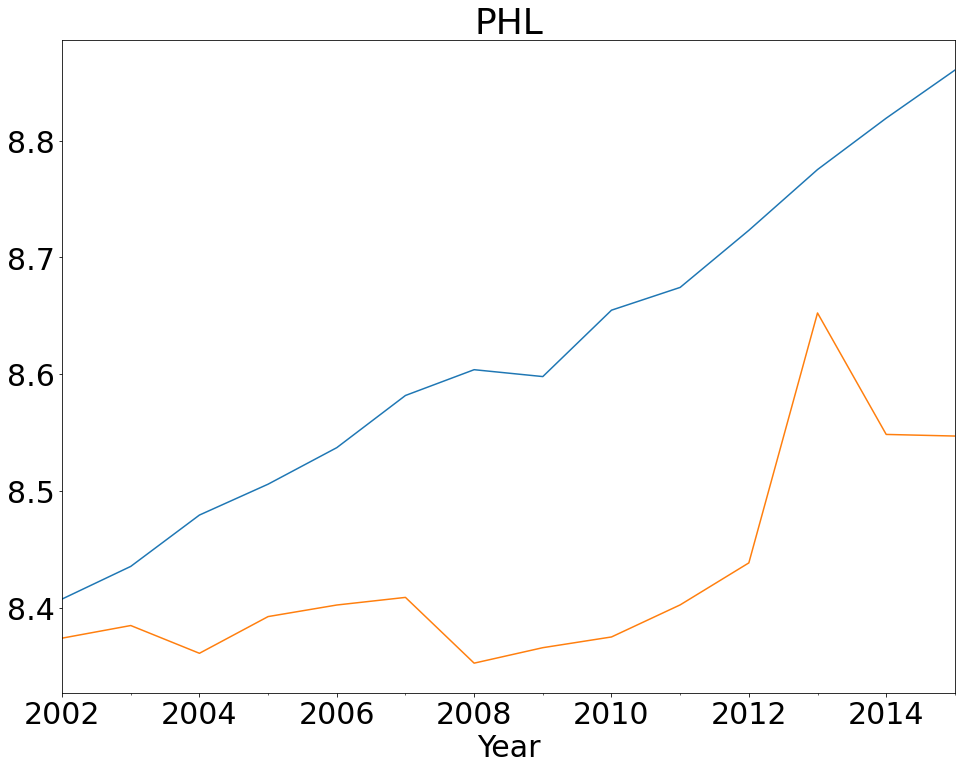

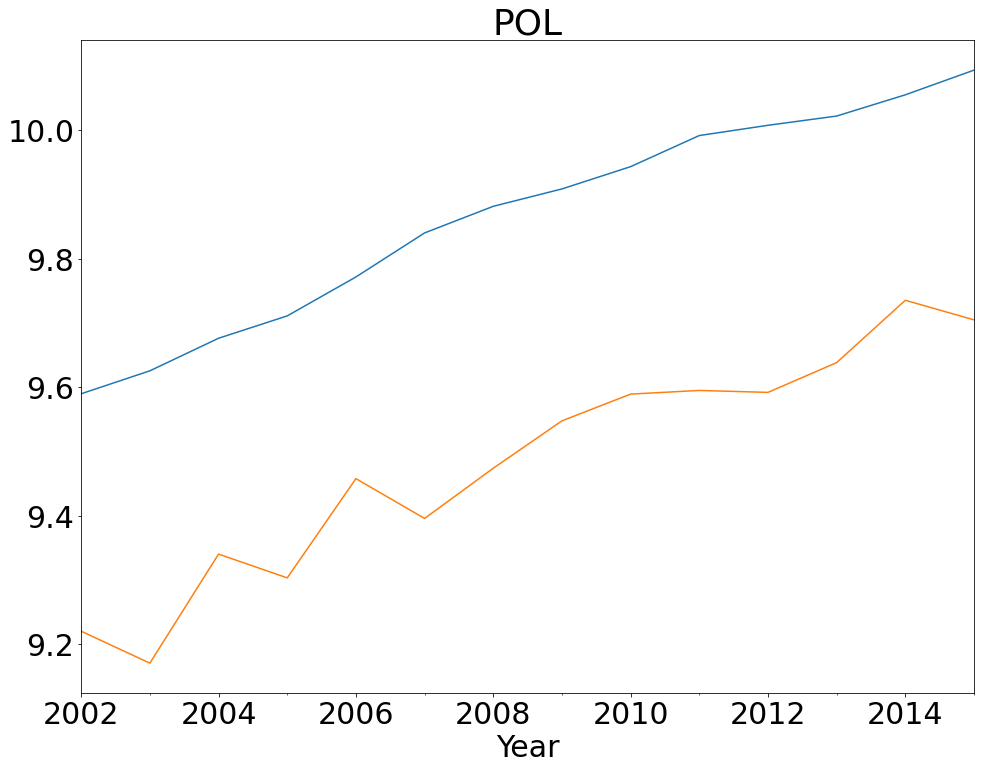

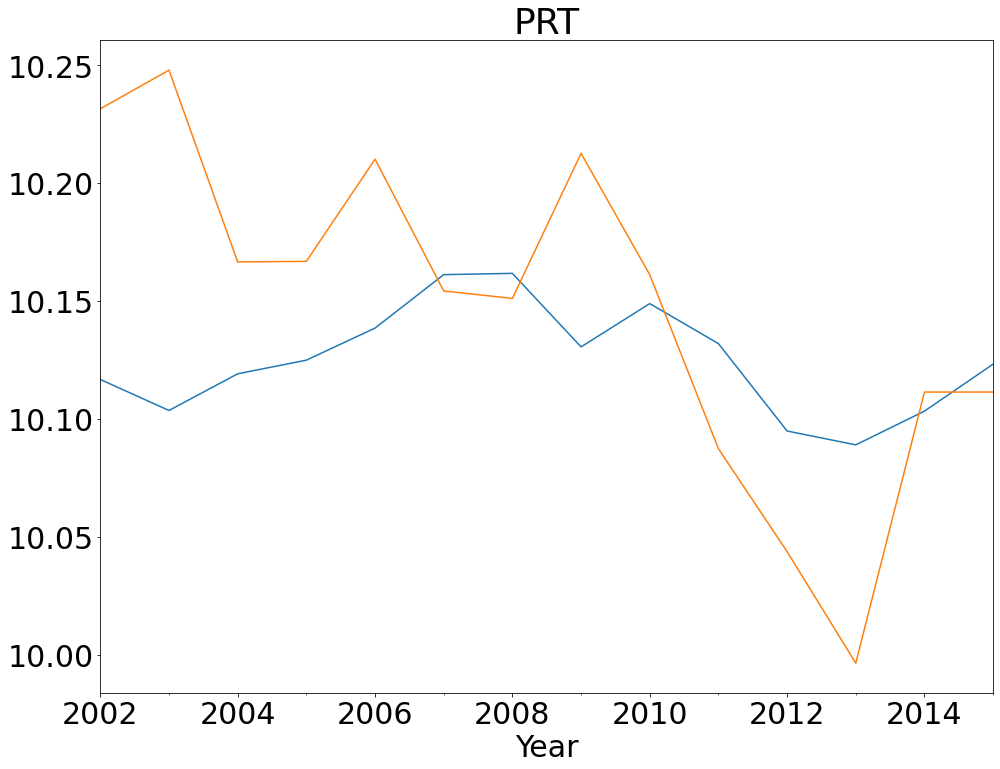

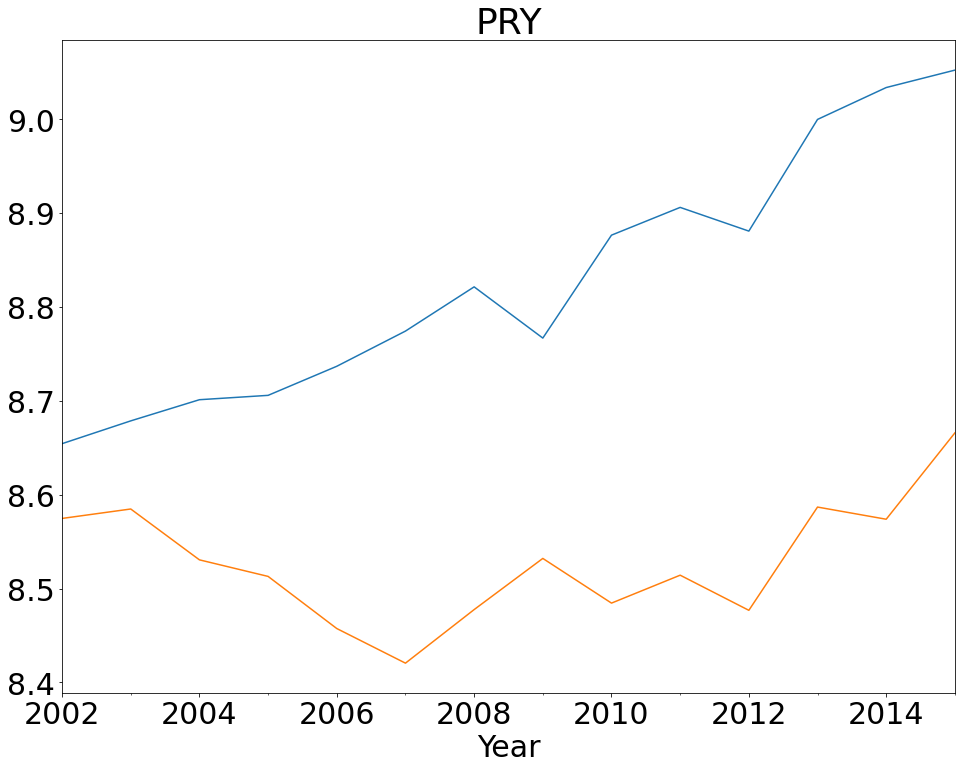

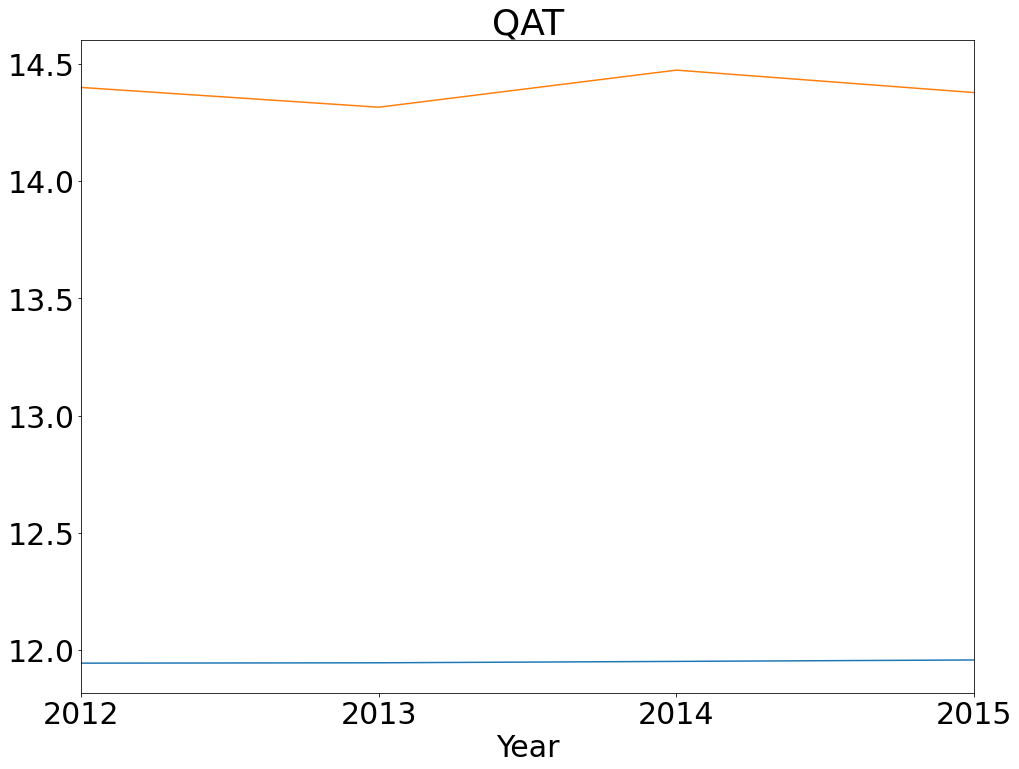

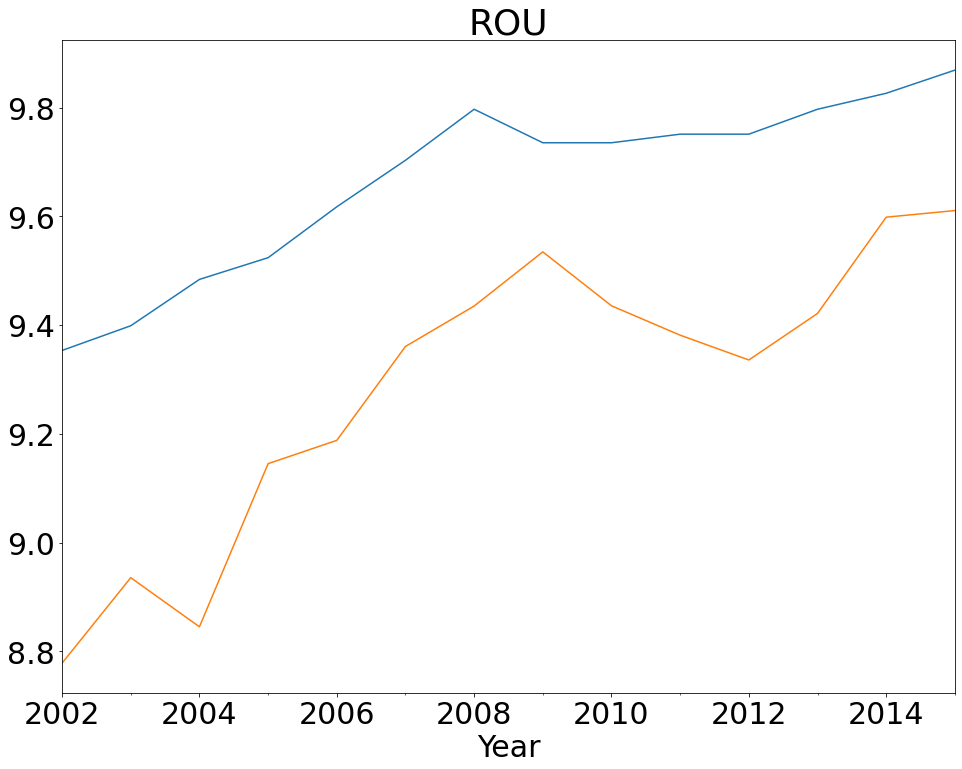

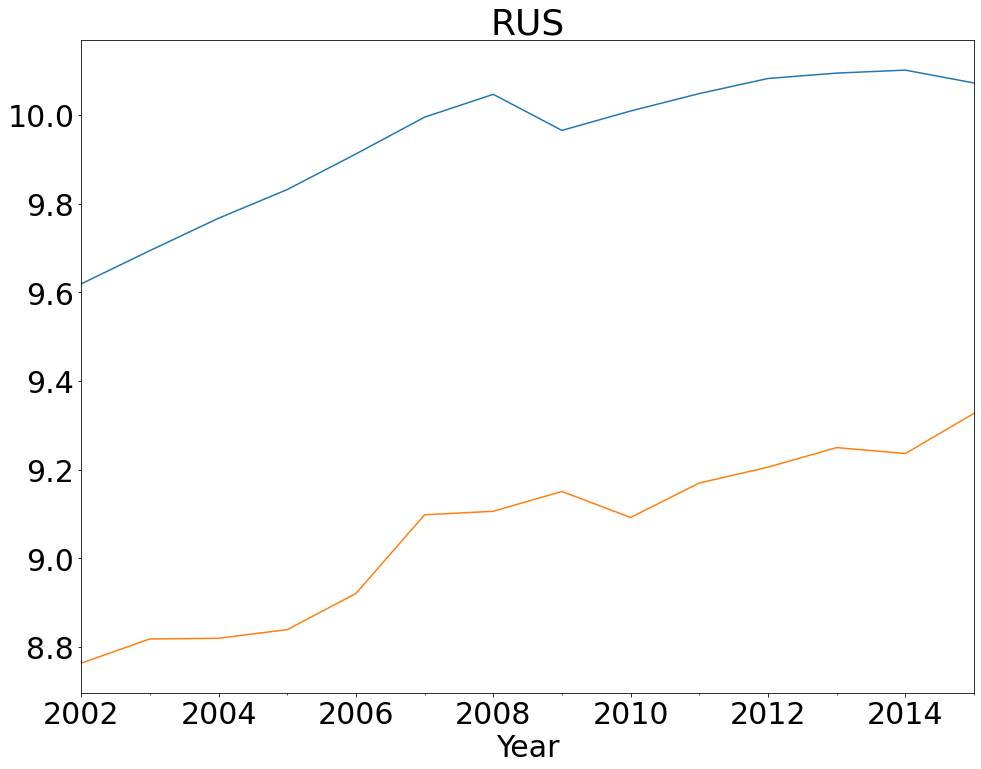

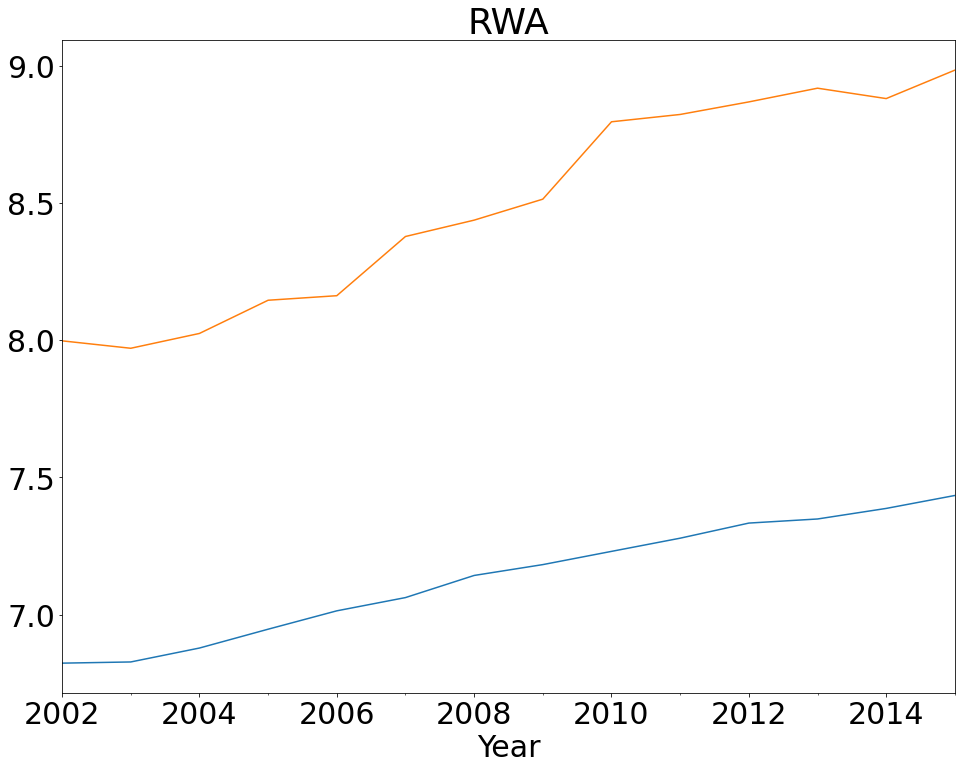

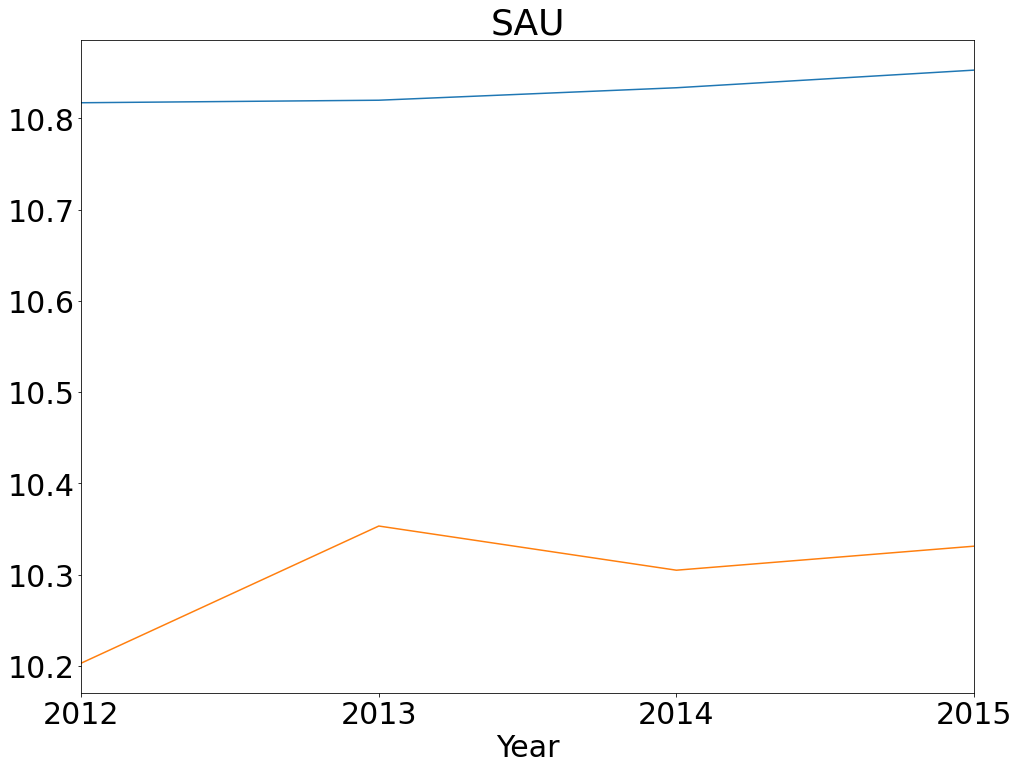

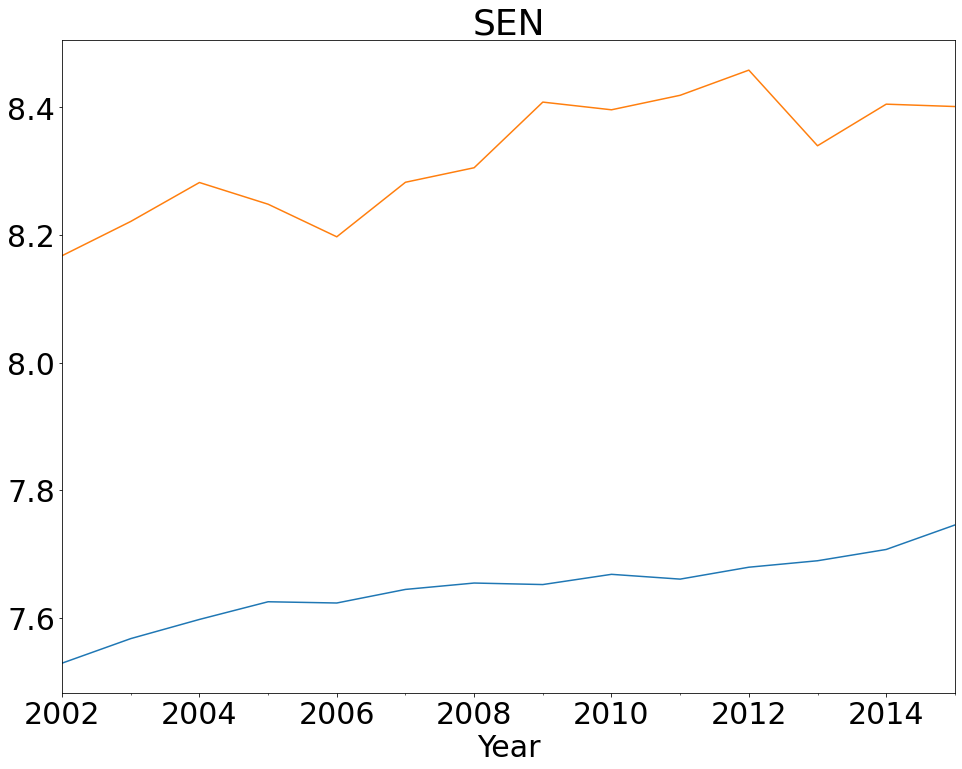

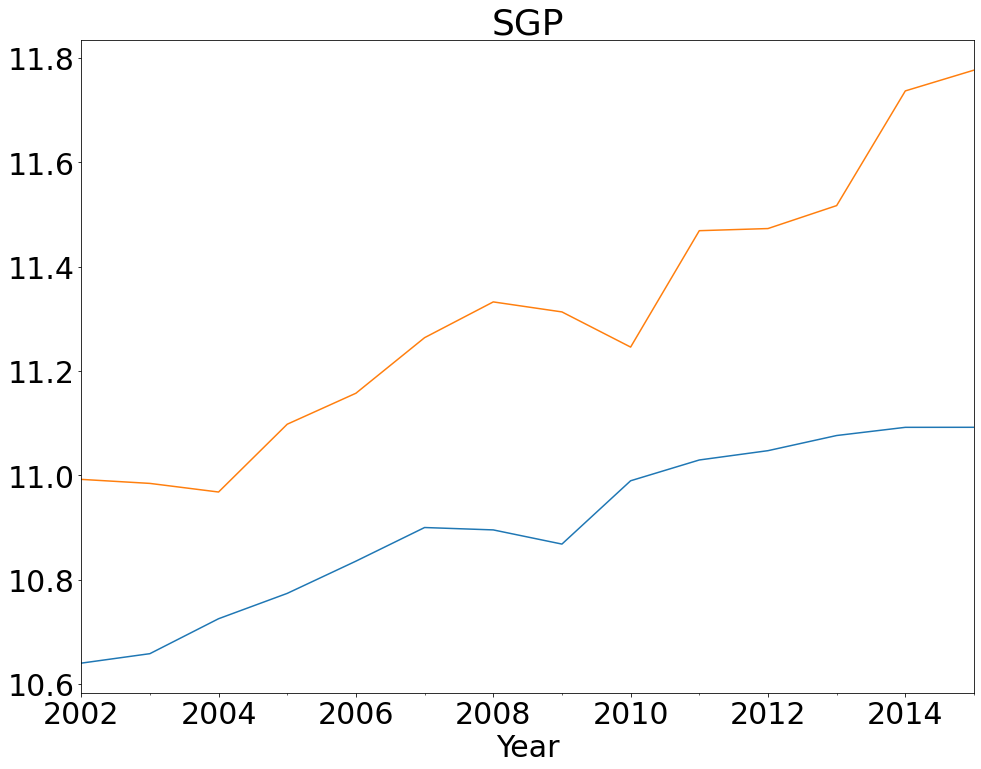

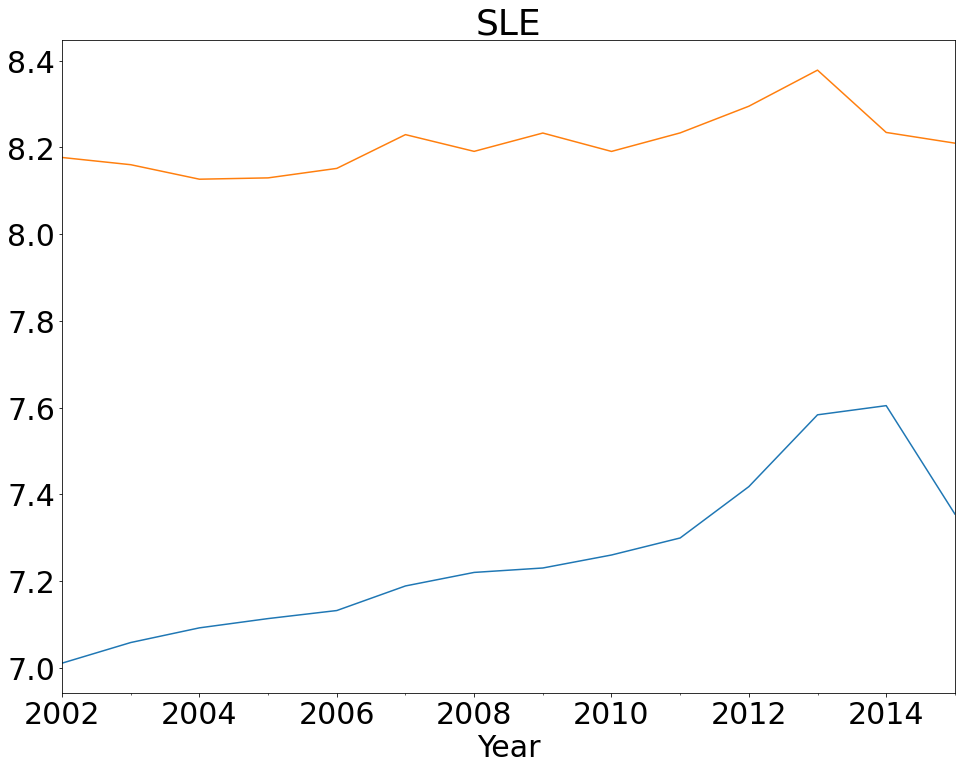

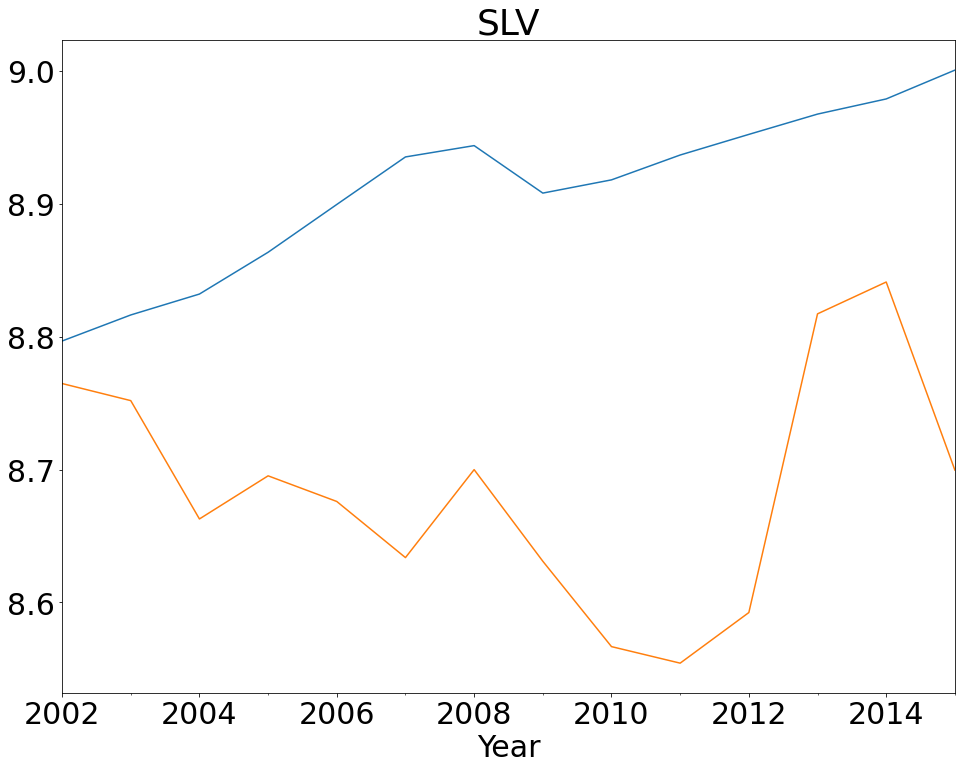

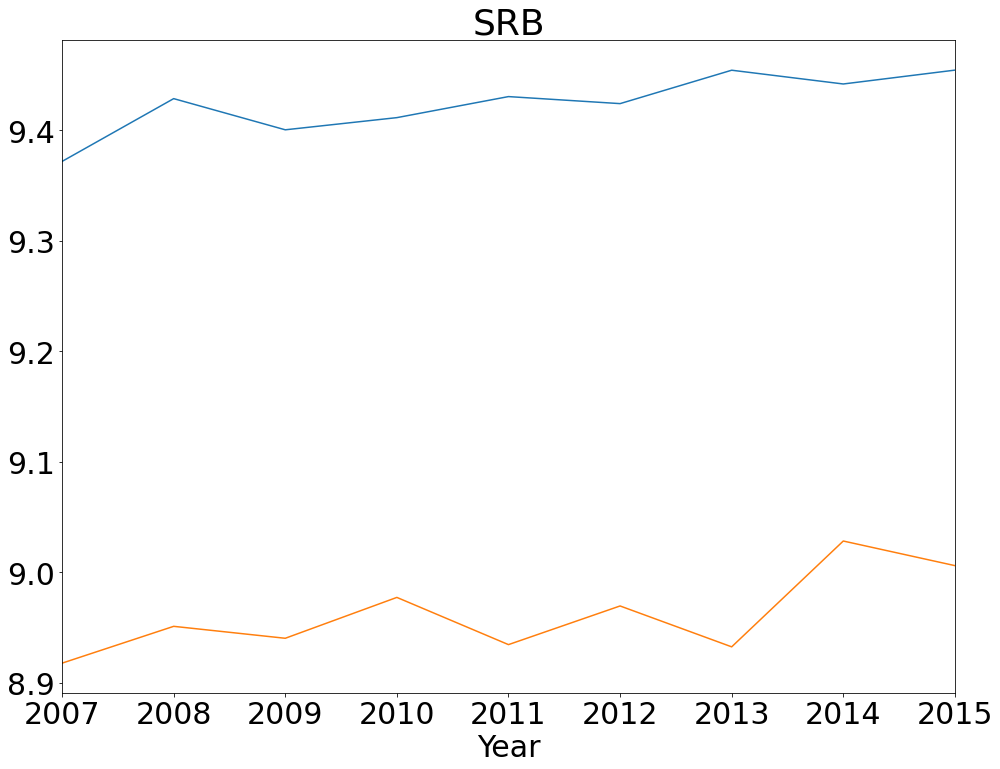

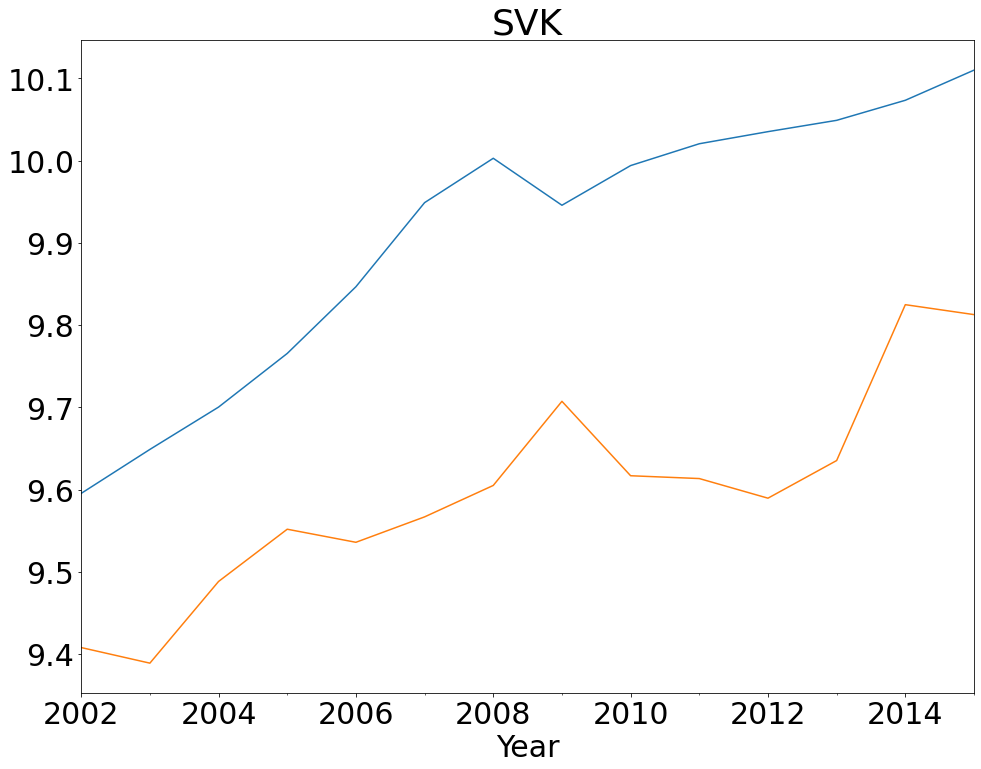

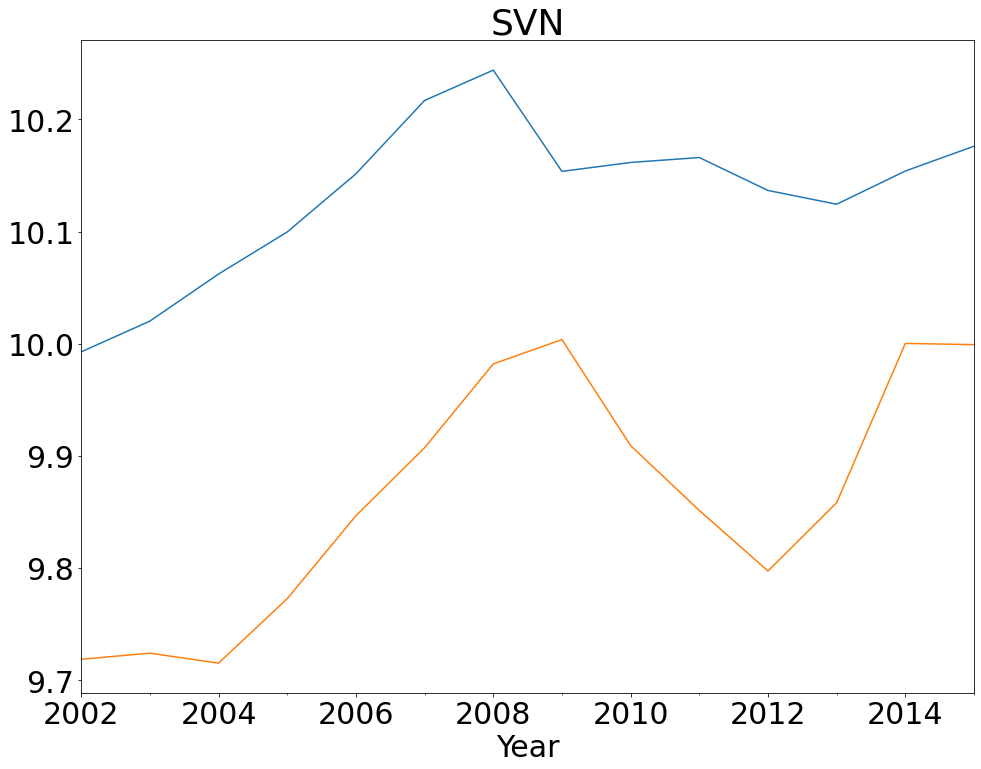

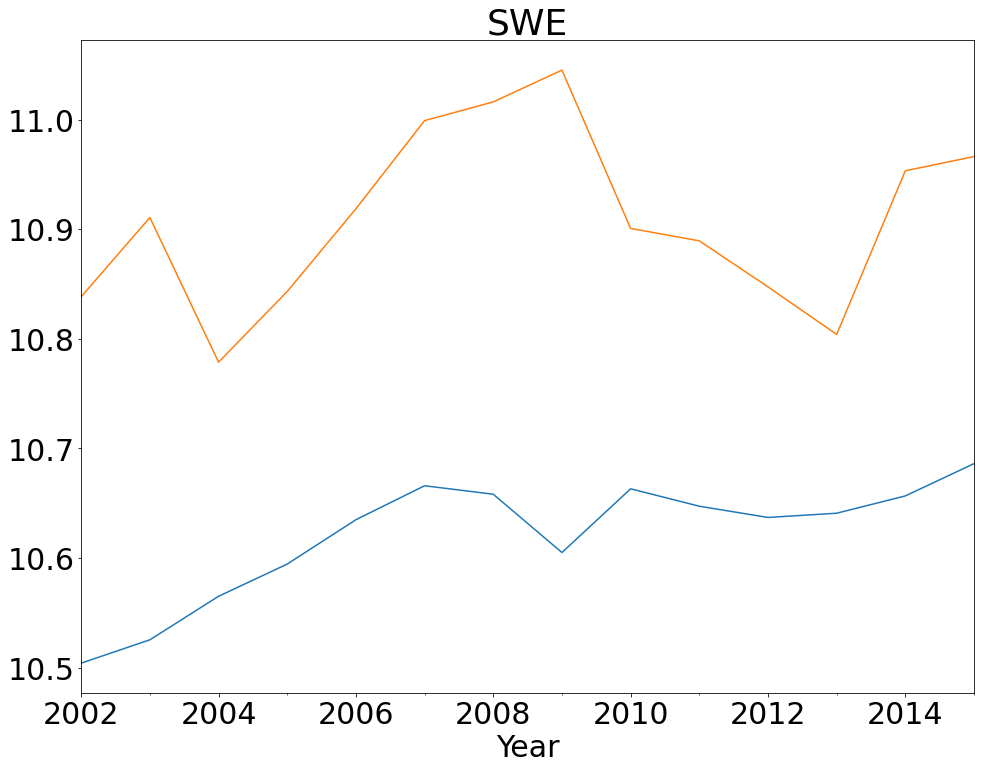

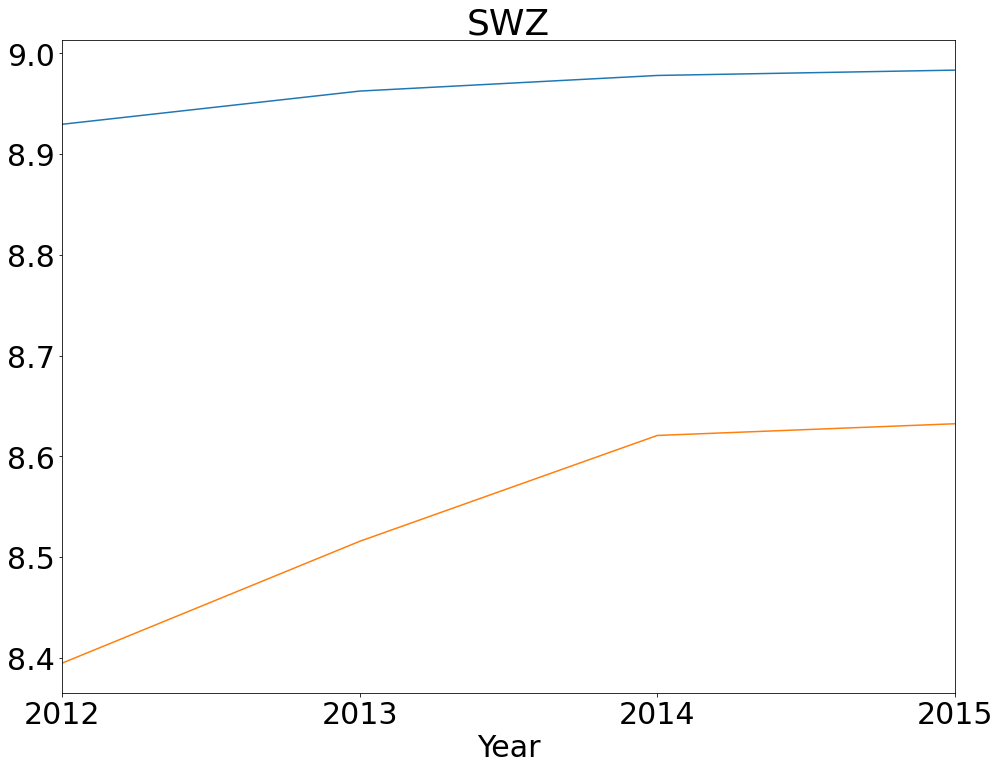

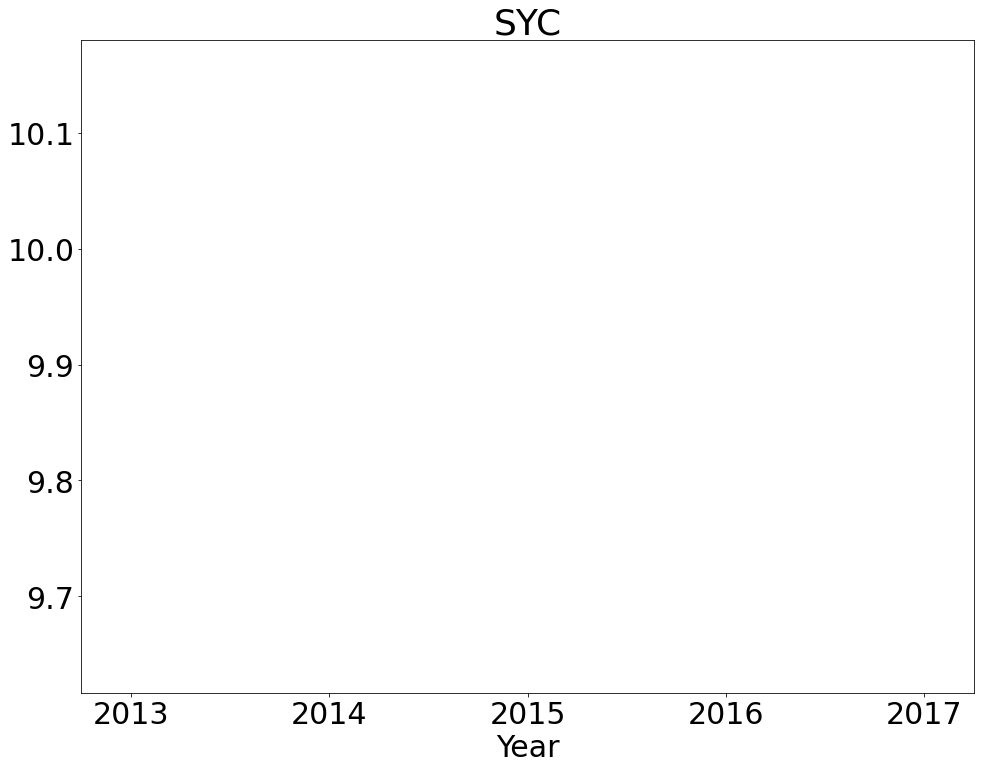

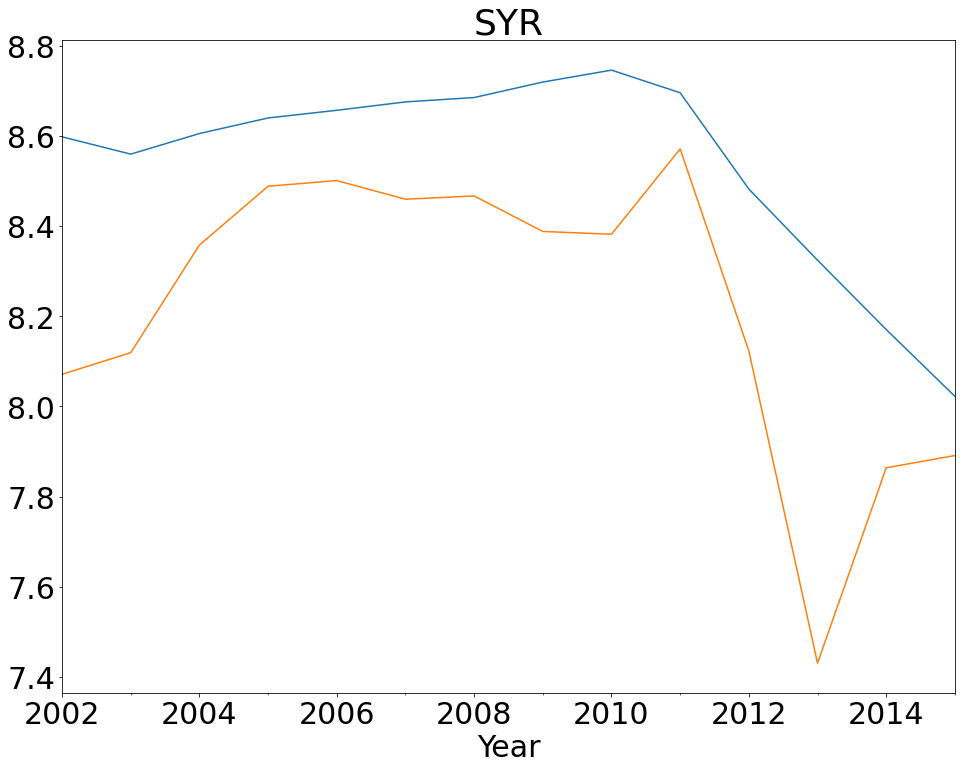

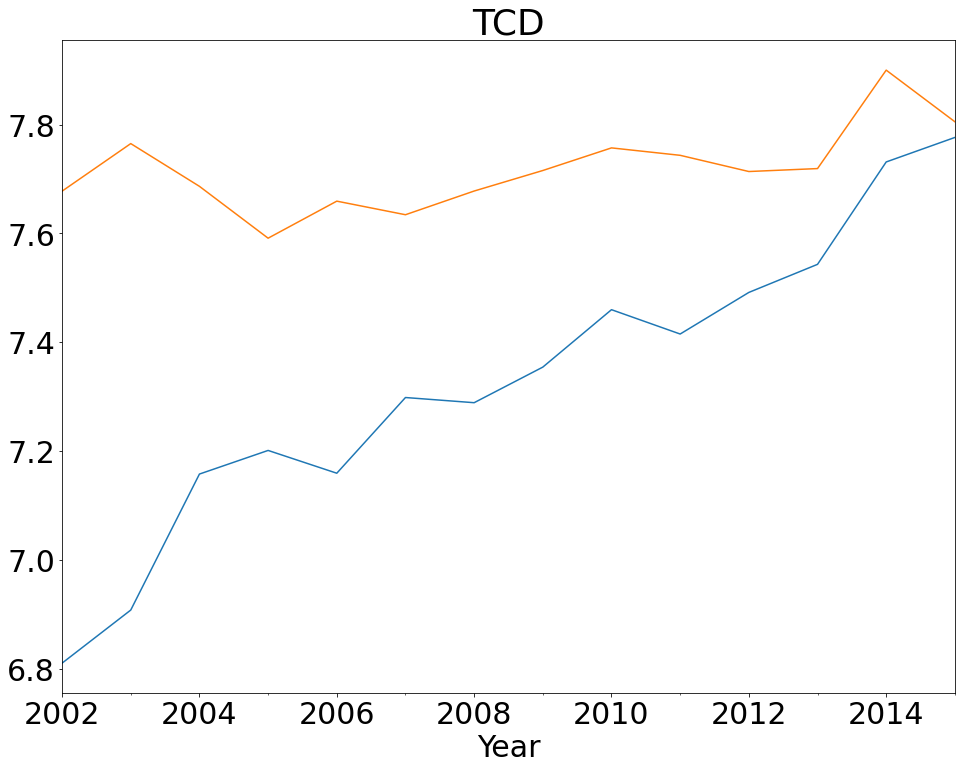

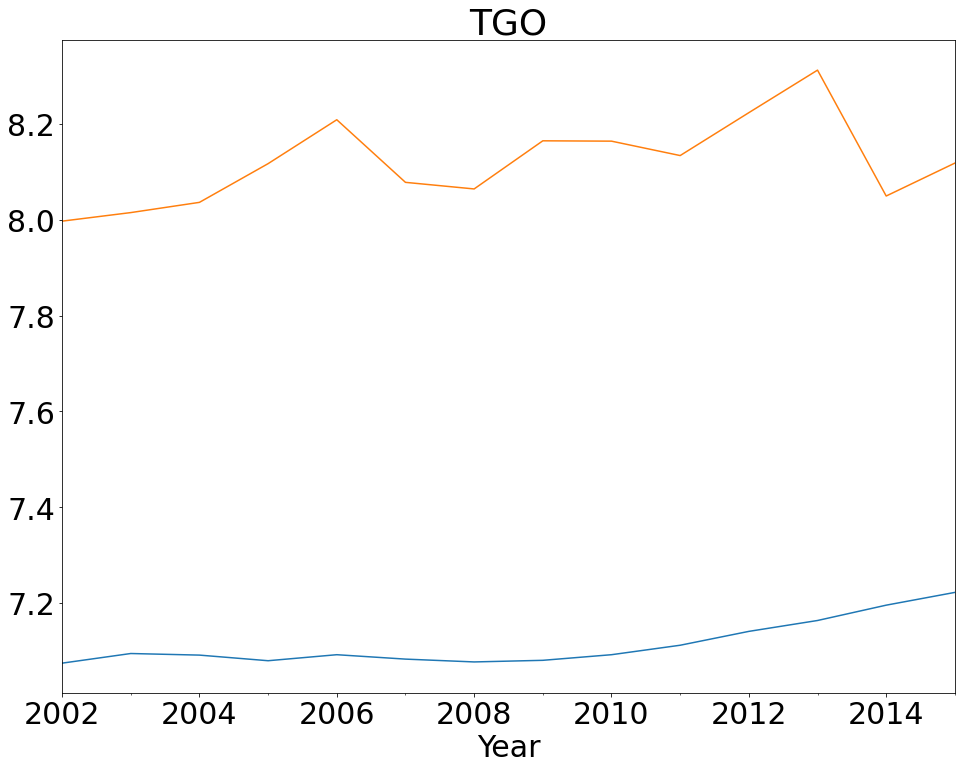

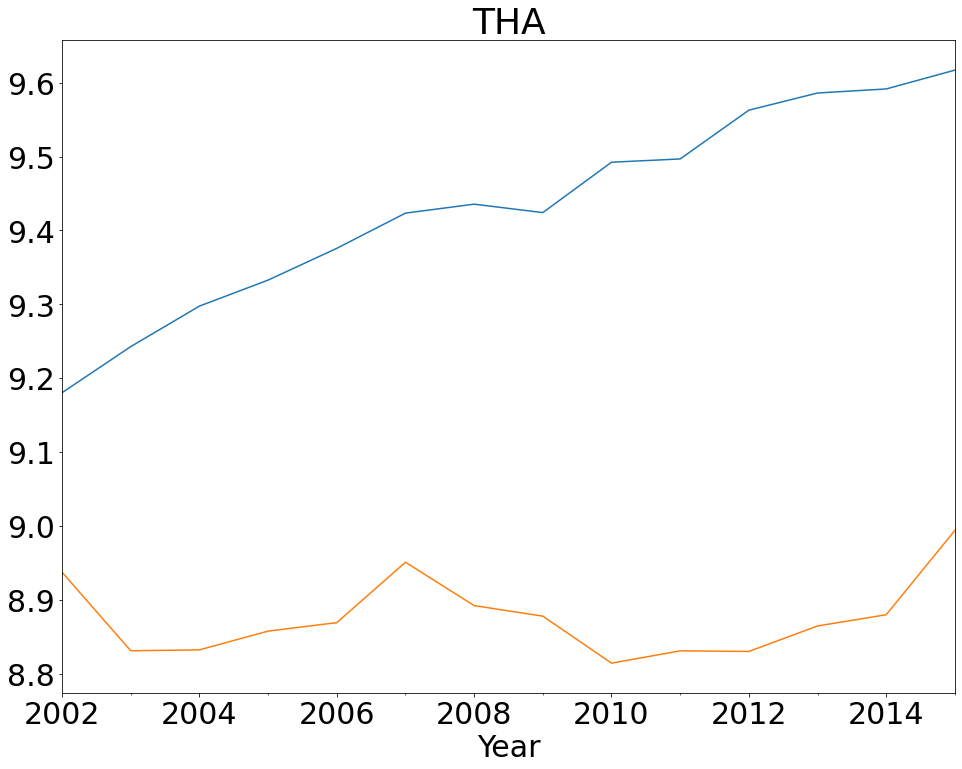

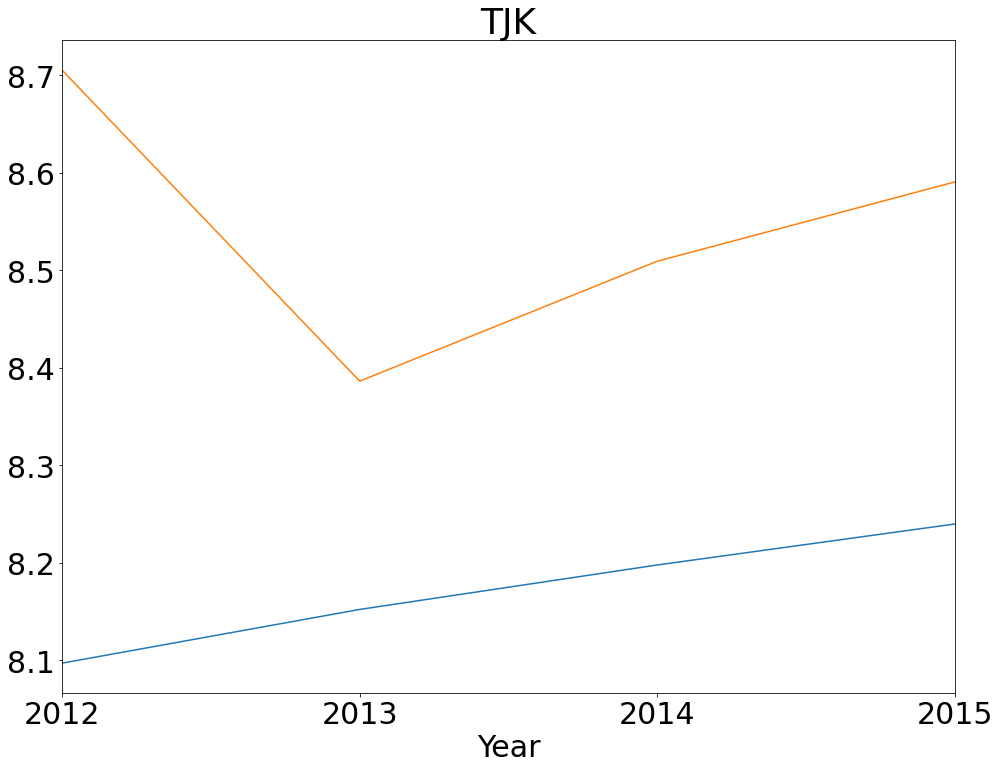

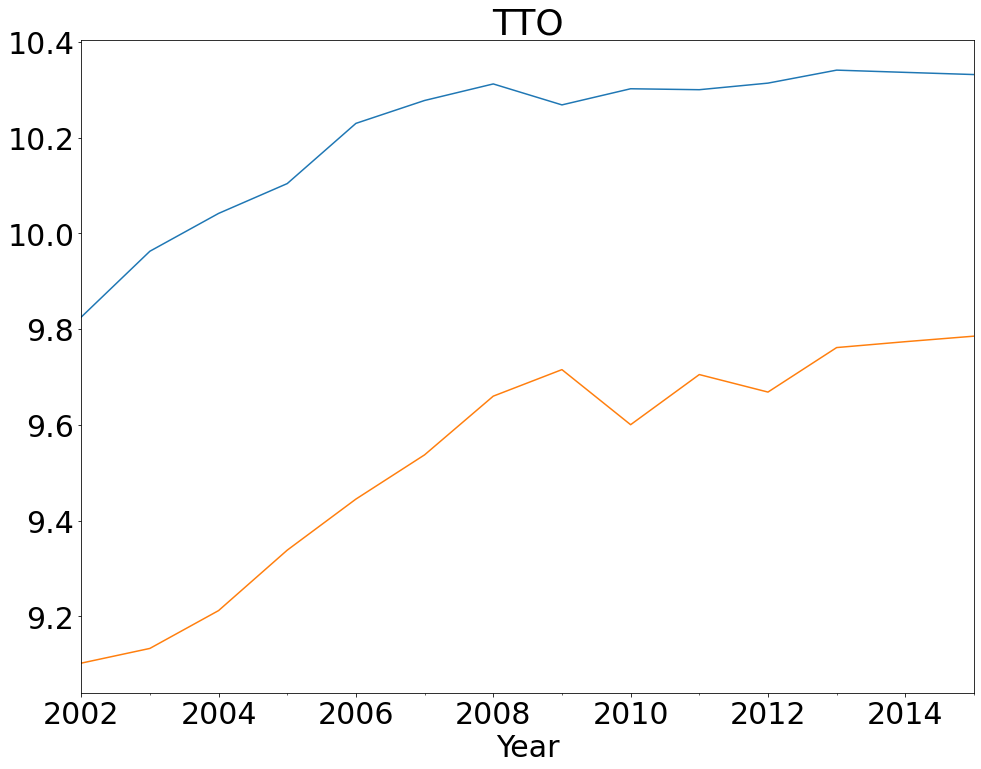

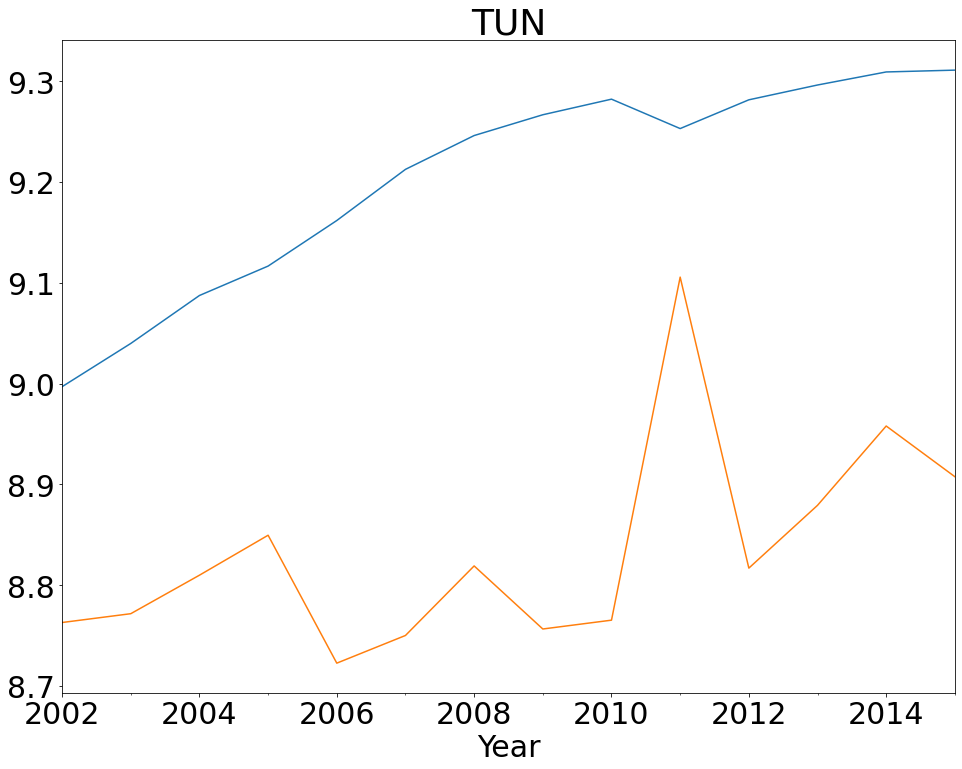

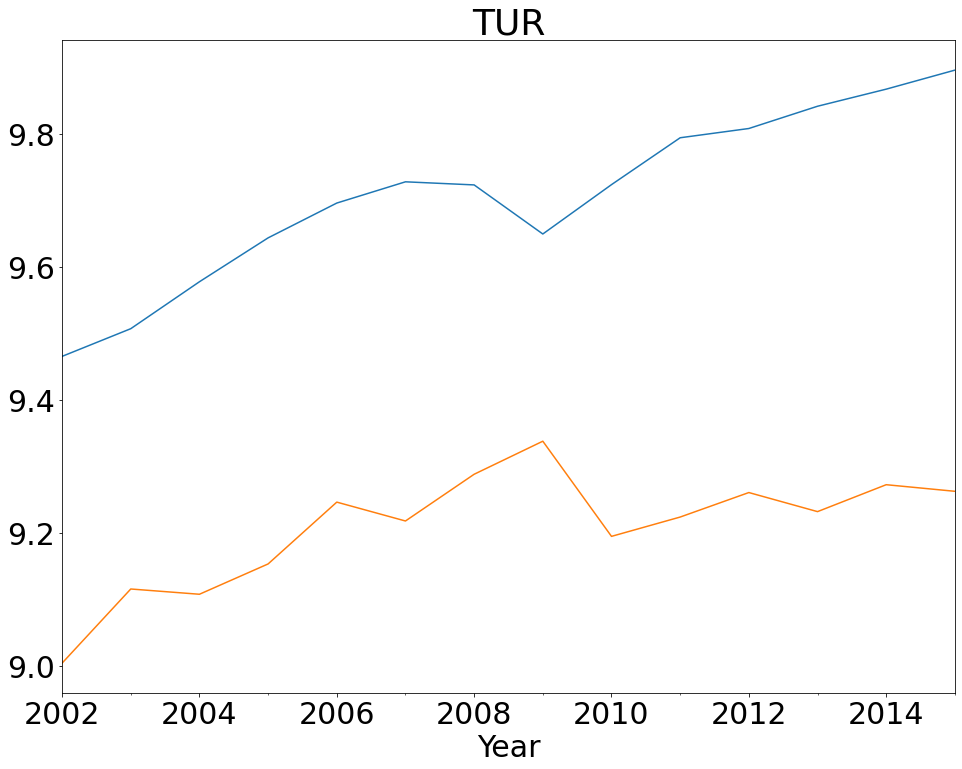

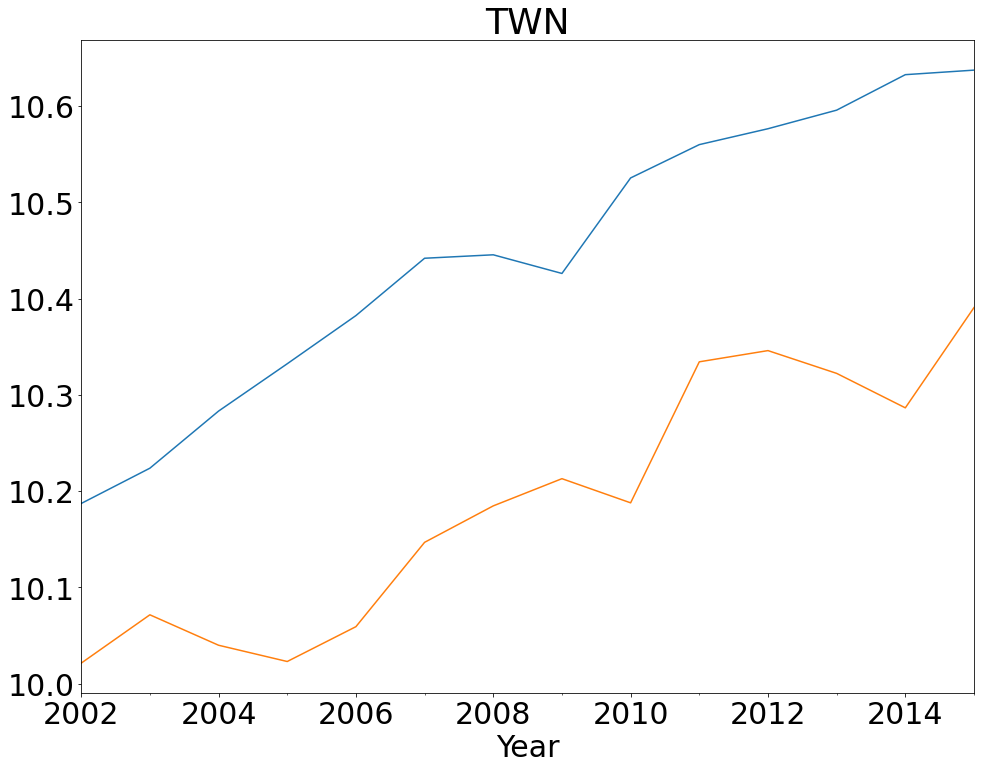

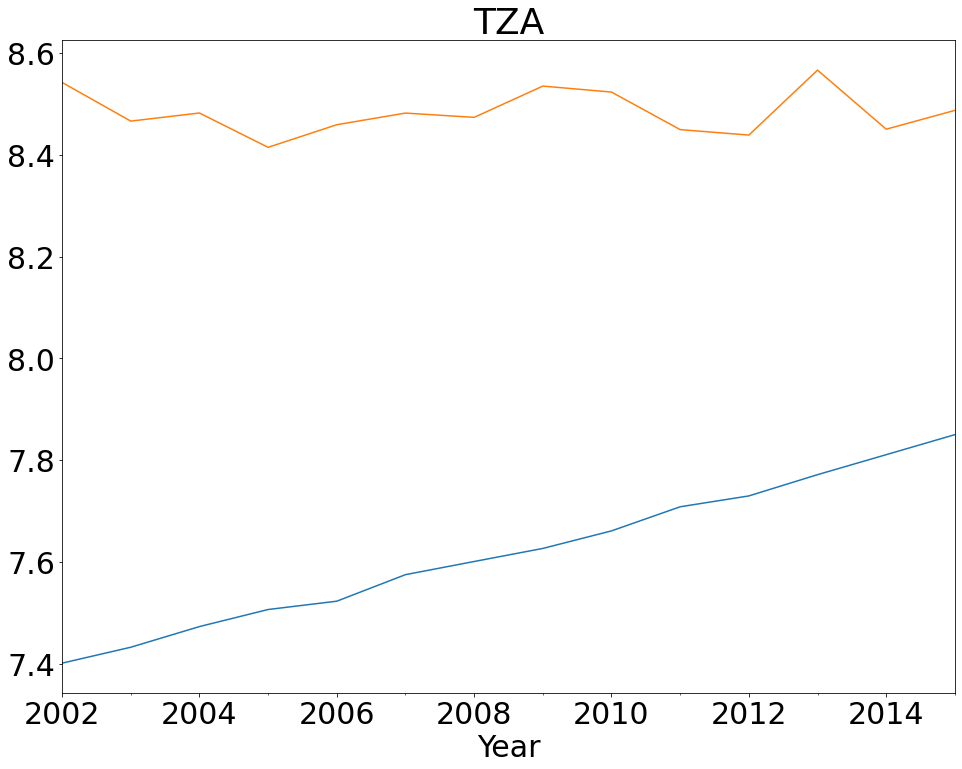

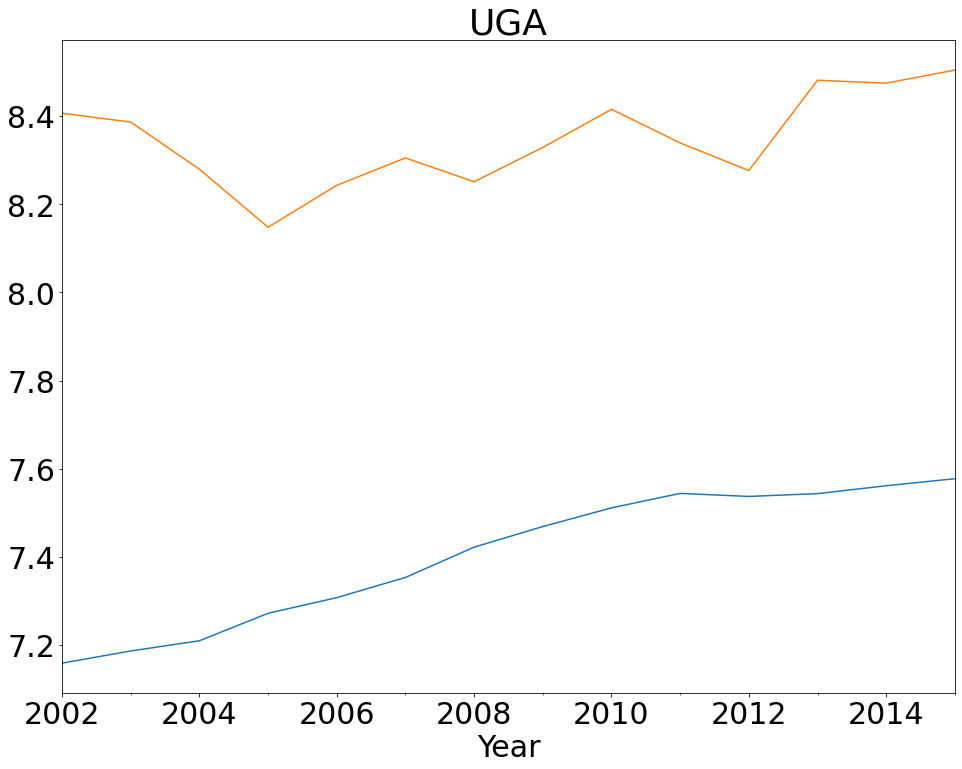

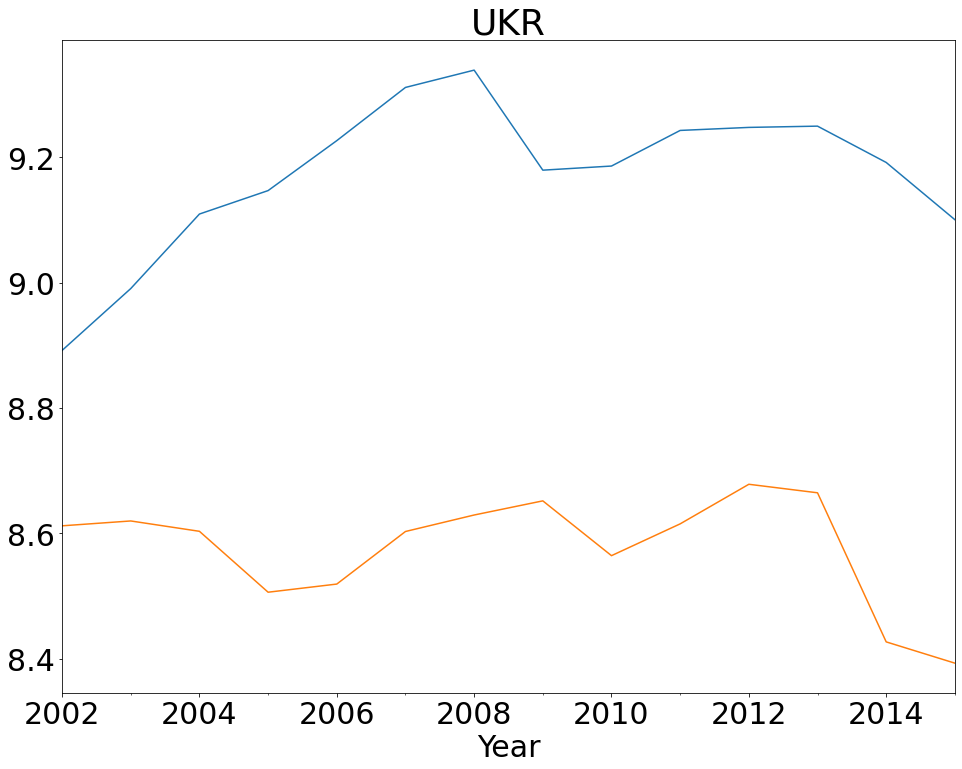

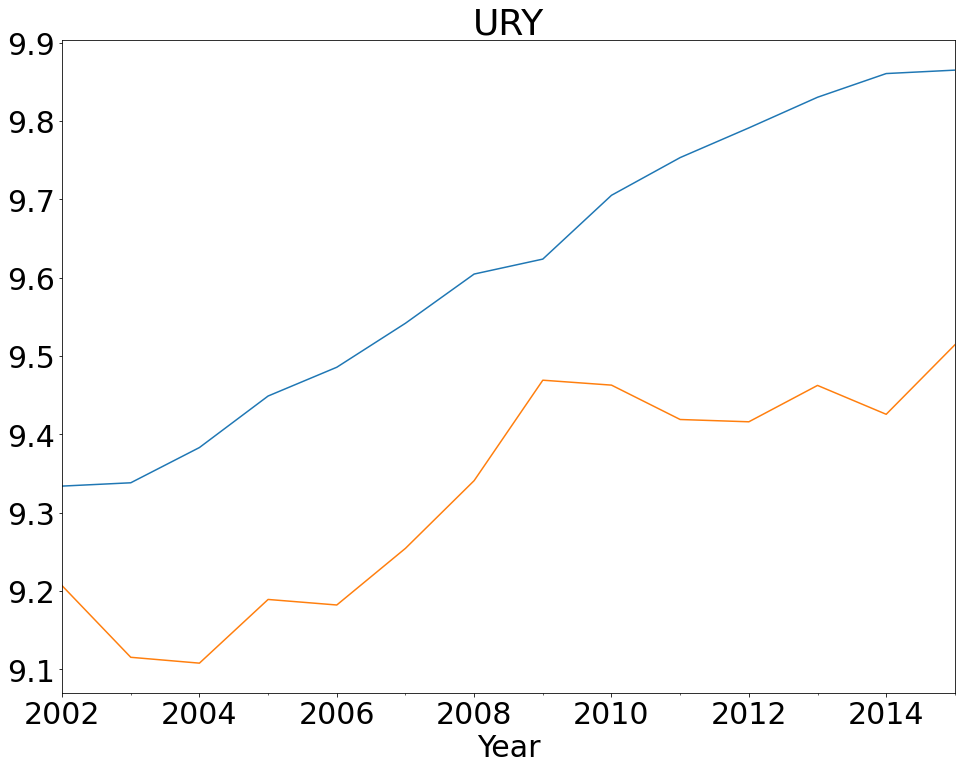

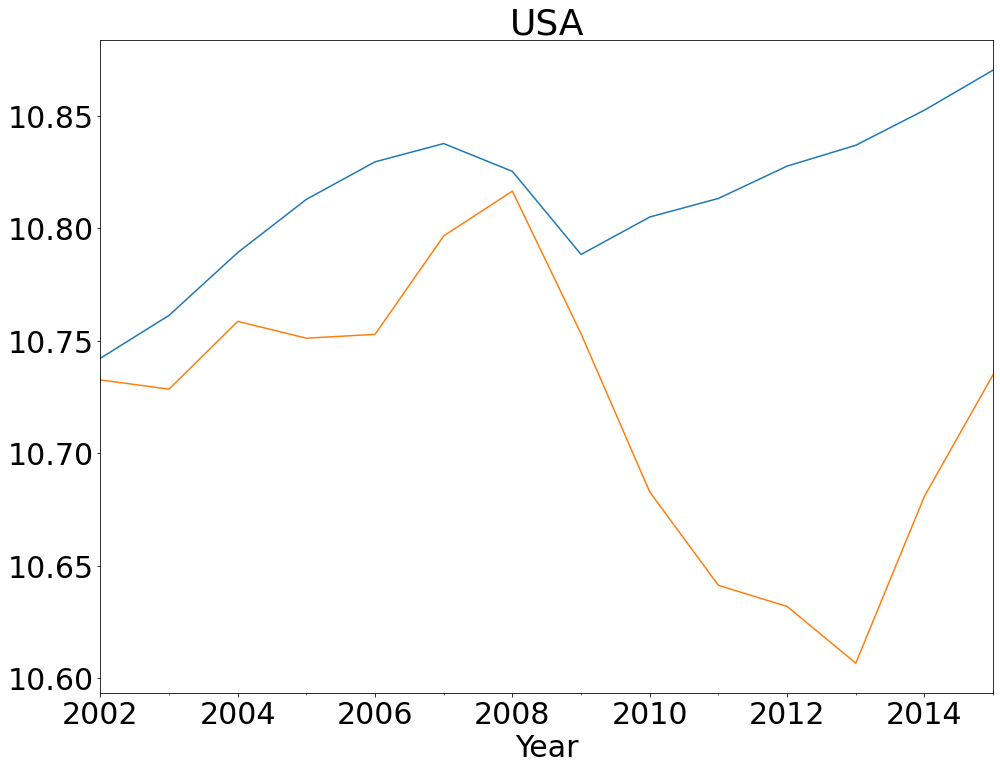

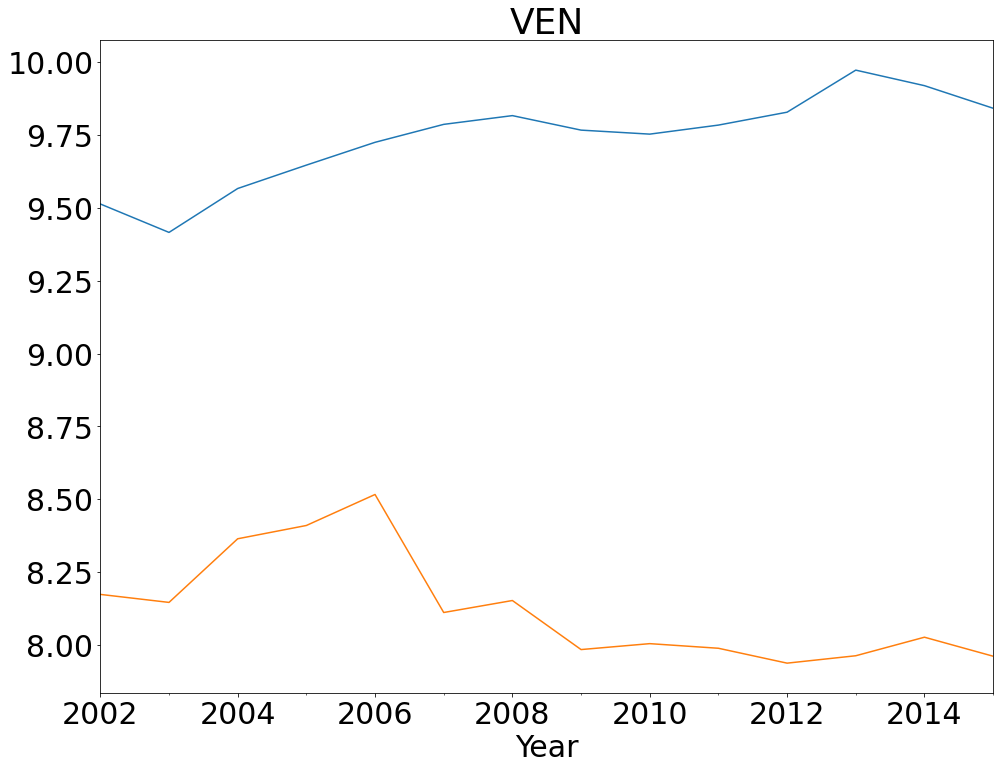

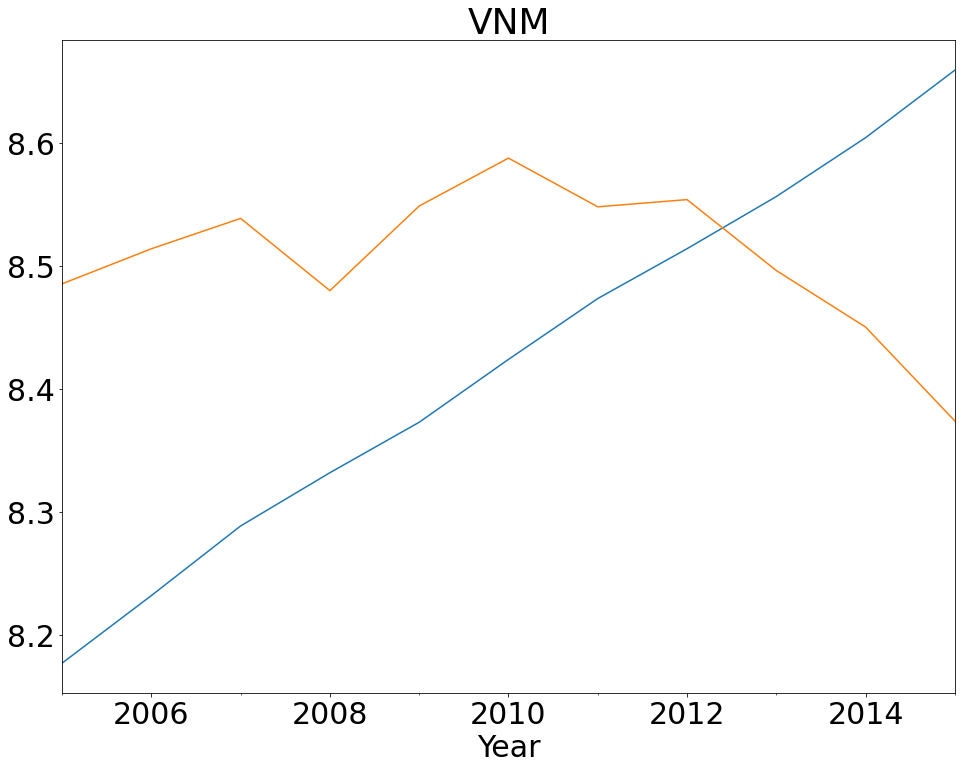

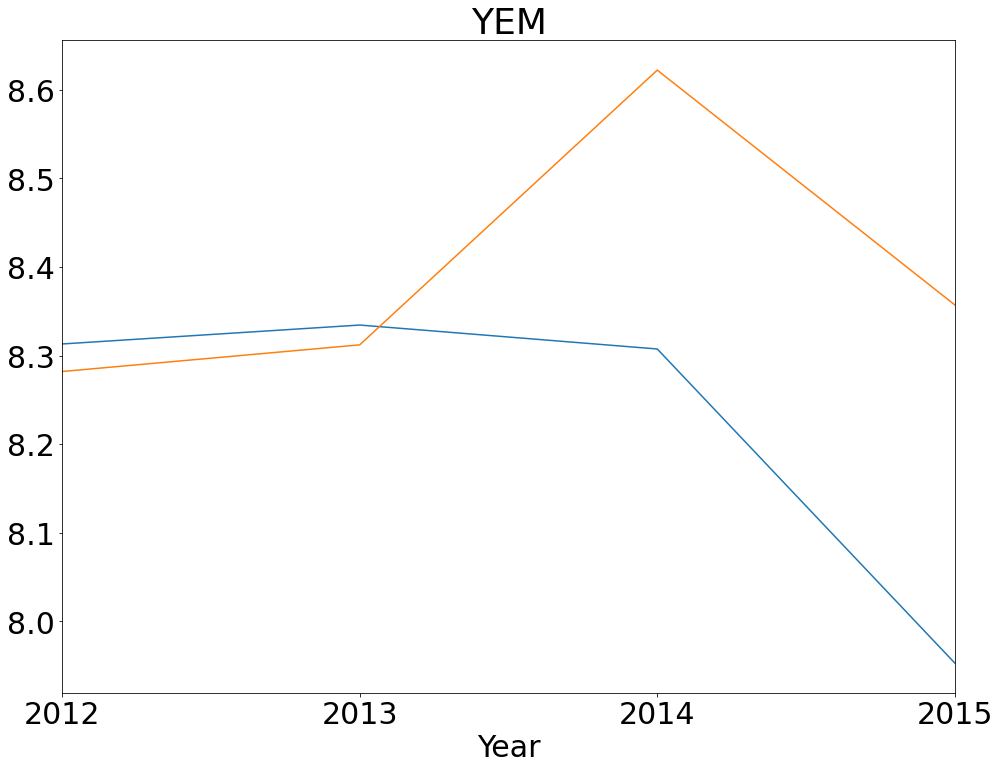

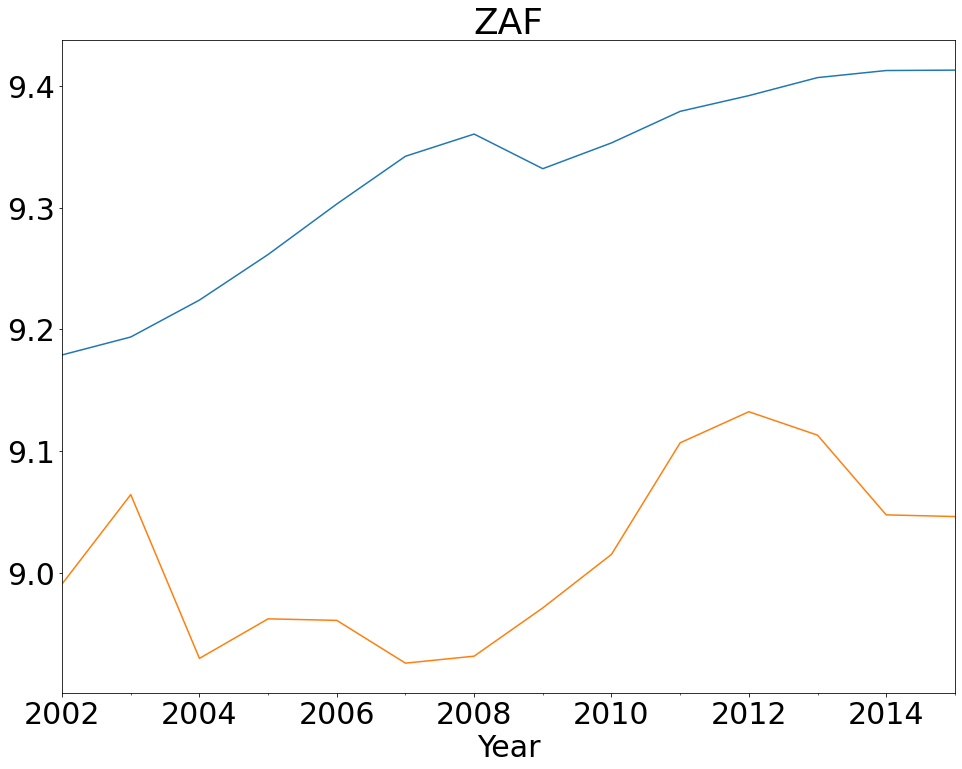

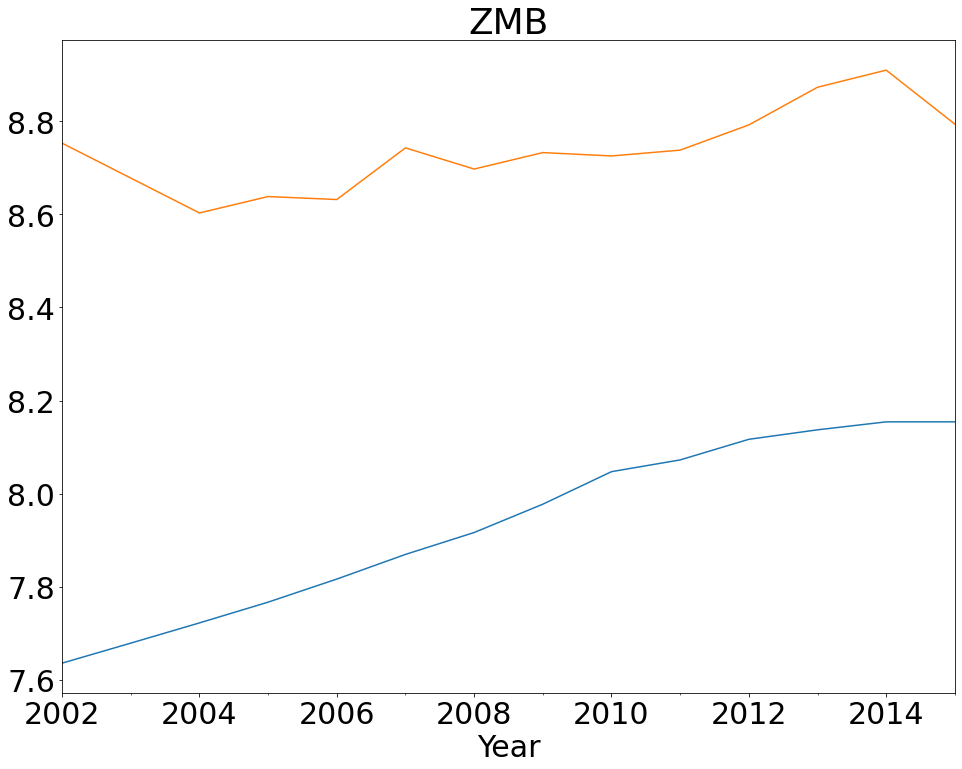

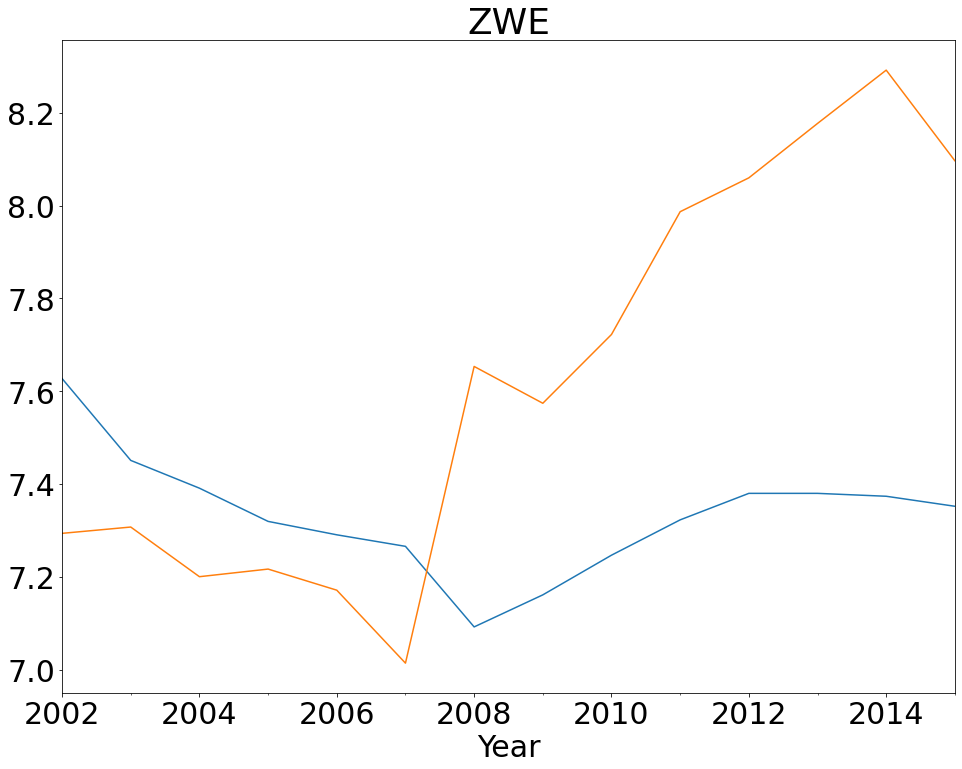

In [50]:
countries = data.groupby("ISO_Code").mean().index
for country in countries:
    fig, ax = plt.subplots(figsize = (16,12))
    reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax, legend = False)    
    ax.set_title(country)